# Analiza zbioru danych "Hotel Reservation"

## Faza 1: dokładne określenie celu eksperymentu

**Cel:**
- Zbudowanie systemu do klasyfikacji czy rezerwacja zostanie odwołana przez klienta hotelu
- Wyjaśnienie przyczyn odwoływań rezerwacji przez klienta hotelu
- Porównanie skuteczności różnych modeli klasyfikacyjnych w analizie danego problemu

**Ewaluacja:**
- Zostanie zastosowana metoda uczenia nadzorowanego

- **Modele:**
    - Naiwny klasyfikator Bayesowski
    - K najbliższych sąsiadów
    - Regresja logistyczna
    - Liniowa analiza dyskryminacyjna
    - Kwadratowa analiza dyskryminacyjna
    - Drzewo decyzyjne
    - Las losowy

- **Metryki:**
    - Precyzja
    - Czułuść
    - F-miara
    - Czas treningu
    - Czas testowania
    - Dokładność
    - ROC-AUC

- **Techniki:**
    - Forward selection
    - Cross validation
    - Grid search

## Faza 2: pozyskanie danych

**Dane:**
- Publiczny, akademicki zbiór danych: „Hotel Reservations Dataset”
- Zbiór danych zawiera informacje o rezerwacjach hotelowych
- Liczba rekordów: 32275
- Liczba kolumn: 19
- Zmienna docelowa: ``booking_status``

**Zmienne:**
- ``Booking_ID``: unikalny identyfikator każdej rezerwacji  
- ``no_of_adults``: liczba dorosłych gości  
- ``no_of_children``: liczba dzieci  
- ``no_of_weekend_nights``: liczba noclegów w weekend (sobota lub niedziela), które gość zarezerwował lub odbył  
- ``no_of_week_nights``: liczba noclegów w dni robocze (poniedziałek–piątek), które gość zarezerwował lub odbył  
- ``type_of_meal_plan``: typ wybranego planu posiłków  
- ``required_car_parking_space``: czy klient wymagał miejsca parkingowego? (0 – nie, 1 – tak)  
- ``room_type_reserved``: typ zarezerwowanego pokoju (wartości zakodowane przez INN Hotels)  
- ``lead_time``: liczba dni między datą rezerwacji a datą przyjazdu  
- ``arrival_year``: rok przyjazdu  
- ``arrival_month``: miesiąc przyjazdu  
- ``arrival_date``: dzień miesiąca przyjazdu  
- ``market_segment_type``: segment rynku, do którego przypisano rezerwację  
- ``repeated_guest``: czy gość był już wcześniej? (0 – nie, 1 – tak)  
- ``no_of_previous_cancellations``: liczba wcześniejszych anulowanych rezerwacji przez klienta  
- ``no_of_previous_bookings_not_canceled``: liczba wcześniejszych rezerwacji, które nie zostały anulowane  
- ``avg_price_per_room``: średnia cena za noc w ramach rezerwacji (w euro); ceny są dynamiczne  
- ``no_of_special_requests``: liczba specjalnych życzeń zgłoszonych przez klienta (np. wysokie piętro, widok z okna itp.)  
- ``booking_status``: status rezerwacji (czy została anulowana, czy nie)  

**Link:** https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

In [159]:
import numpy as np
import pandas as pd

In [160]:
hotels = pd.read_csv('data/Hotel Reservations.csv')

In [161]:
hotels.head(10)

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   
6   INN00007             2               0                     1   
7   INN00008             2               0                     1   
8   INN00009             3               0                     0   
9   INN00010             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   
6                  3       Meal Plan 1                           0   
7                  3       Meal Plan 1                           0   
8                  4       Meal Plan 1                           0   
9                  5       Meal Plan 1                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   
5        Room_Type 1        346          2018              9            13   
6        Room_Type 1         34          2017             10            15   
7        Room_Type 4         83          2018             12            26   
8        Room_Type 1        121          2018              7             6   
9        Room_Type 4         44          2018             10            18   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   
5              Online               0                             0   
6              Online               0                             0   
7              Online               0                             0   
8             Offline               0                             0   
9              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                 

In [162]:
hotels.shape

(36275, 19)

## Faza 3: Wstępna ocena przydatności danych

**Struktura danych jest odpowiednia dla zadania klasyfikacji:**
- 13 zmiennych numerycznych i 5 kategorycznych
- Zmienna docelowa `booking_status` ma dwie klasy: "Canceled" i "Not_Canceled"
- Identyfikator `Booking_ID` jest unikalny dla każdej rezerwacji

**Analiza wykazała wysoką jakość zbioru danych:**
- Brak wartości brakujących we wszystkich 19 kolumnach (36 275 kompletnych rekordów)
- Zidentyfikowano potencjalne wartości odstające (np. 9-10 dzieci w rezerwacji)
- Wykryto niezbalansowanie klasy docelowej: 67% niezanulowanych vs 33% anulowanych rezerwacji

**Zbiór danych wykazuje duży potencjał dla zadania klasyfikacji:**
- Zmienne behawioralne (`lead_time`, `no_of_previous_cancellations`) mogą być kluczowe
- Cechy rezerwacji (`avg_price_per_room`, `no_of_special_requests`) różnicują klientów

**Zidentyfikowano kluczowe wyzwania wymagające uwagi:**
- Niezbalansowanie klas może wpłynąć na skuteczność modeli
- Obecność wartości ekstremalnych w niektórych zmiennych
- Konieczność kodowania zmiennych kategorycznych przed modelowaniem

In [163]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [164]:
hotels.describe(include='all')

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
count       36275  36275.000000    36275.000000          36275.000000   
unique      36275           NaN             NaN                   NaN   
top      INN00001           NaN             NaN                   NaN   
freq            1           NaN             NaN                   NaN   
mean          NaN      1.844962        0.105279              0.810724   
std           NaN      0.518715        0.402648              0.870644   
min           NaN      0.000000        0.000000              0.000000   
25%           NaN      2.000000        0.000000              0.000000   
50%           NaN      2.000000        0.000000              1.000000   
75%           NaN      2.000000        0.000000              2.000000   
max           NaN      4.000000       10.000000              7.000000   

        no_of_week_nights type_of_meal_plan  required_car_parking_space  \
count        36275.000000             36275                36275.000000   
unique                NaN                 4                         NaN   
top                   NaN       Meal Plan 1                         NaN   
freq                  NaN             27835                         NaN   
mean             2.204300               NaN                    0.030986   
std              1.410905               NaN                    0.173281   
min              0.000000               NaN                    0.000000   
25%              1.000000               NaN                    0.000000   
50%              2.000000               NaN                    0.000000   
75%              3.000000               NaN                    0.000000   
max             17.000000               NaN                    1.000000   

       room_type_reserved     lead_time  arrival_year  arrival_month  \
count               36275  36275.000000  36275.000000   36275.000000   
unique                  7           NaN           NaN            NaN   
top           Room_Type 1           NaN           NaN            NaN   
freq                28130           NaN           NaN            NaN   
mean                  NaN     85.232557   2017.820427       7.423653   
std                   NaN     85.930817      0.383836       3.069894   
min                   NaN      0.000000   2017.000000       1.000000   
25%                   NaN     17.000000   2018.000000       5.000000   
50%                   NaN     57.000000   2018.000000       8.000000   
75%                   NaN    126.000000   2018.000000      10.000000   
max                   NaN    443.000000   2018.000000      12.000000   

        arrival_date market_segment_type  repeated_guest  \
count   36275.000000               36275    36275.000000   
unique           NaN                   5             NaN   
top              NaN              Online             NaN   
freq             NaN               23214             NaN   
mean       15.596995                 NaN        0.025637   
std         8.740447                 NaN        0.158053   
min         1.000000                 NaN        0.000000   
25%         8.000000                 NaN        0.000000   
50%        16.000000                 NaN        0.000000   
75%        23.000000                 NaN        0.000000   
max        31.000000                 NaN        1.000000   

        no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
count                   36275.000000                          36275.000000   
unique                           NaN                                   NaN   
top                              NaN                                   NaN   
freq                             NaN                                   NaN   
mean                        0.023349                              0.153411   
std                         0.368331                              1.754171   
min                         0.000000                              0.000000   
25%                

In [165]:
hotels.select_dtypes(["int64"]).agg(['skew', 'kurtosis'])

no_of_adults  no_of_children  no_of_weekend_nights  \
skew         -0.333295        4.710350              0.737616   
kurtosis      0.814822       36.981856              0.298858   

          no_of_week_nights  required_car_parking_space  lead_time  \
skew               1.599350                    5.413643   1.292492   
kurtosis           7.798284                   27.309037   1.179594   

          arrival_year  arrival_month  arrival_date  repeated_guest  \
skew         -1.669695      -0.348229      0.028809        6.002888   
kurtosis      0.787926      -0.933189     -1.157214       34.036545   

          no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
skew                         25.199876                             19.250191   
kurtosis                    732.735676                            457.380085   

          no_of_special_requests  
skew                    1.145081  
kurtosis                0.881437

In [166]:
for col in hotels.columns:
    print(f"Column: {col}")
    print(hotels[col].value_counts())
    print()

Column: Booking_ID
Booking_ID
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: count, Length: 36275, dtype: int64

Column: no_of_adults
no_of_adults
2    26108
1     7695
3     2317
0      139
4       16
Name: count, dtype: int64

Column: no_of_children
no_of_children
0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

Column: no_of_weekend_nights
no_of_weekend_nights
0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

Column: no_of_week_nights
no_of_week_nights
2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

Column: type_of_meal_plan
type_of_meal_plan
Meal Plan 1     27835
Not

In [167]:
hotels.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.style.use('ggplot')

### Analiza ``no_of_adults``:

Dominują rezerwacje dla 2 osób dorosłych (72%), z nielicznymi przypadkami 0 dorosłych (139 rekordów) wymagającymi weryfikacji.

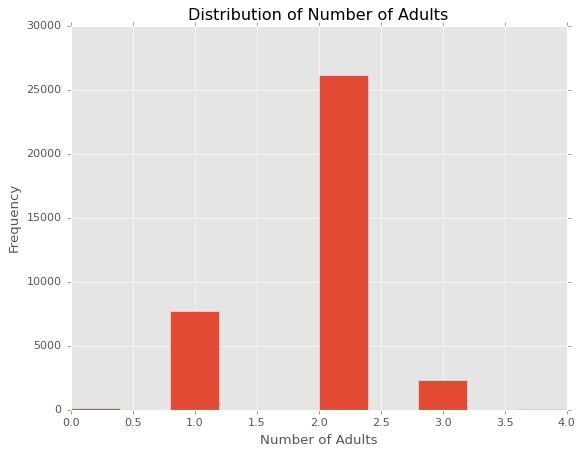

In [169]:
plt.hist(hotels.no_of_adults, bins=10)
plt.title('Distribution of Number of Adults')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.show()

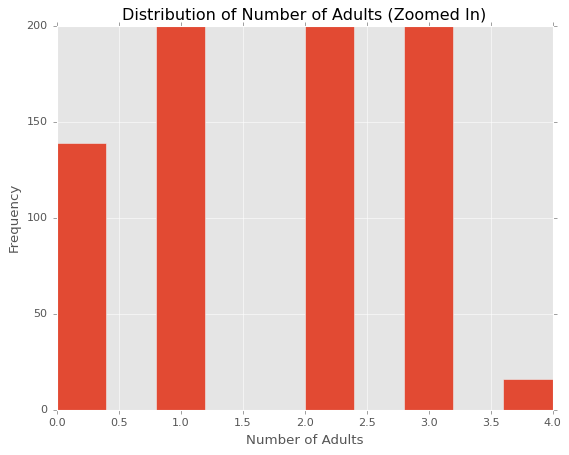

In [170]:
plt.hist(hotels.no_of_adults, bins=10)
plt.title('Distribution of Number of Adults (Zoomed In)')
plt.xlabel('Number of Adults')
plt.ylabel('Frequency')
plt.ylim(0, 200)
plt.show()

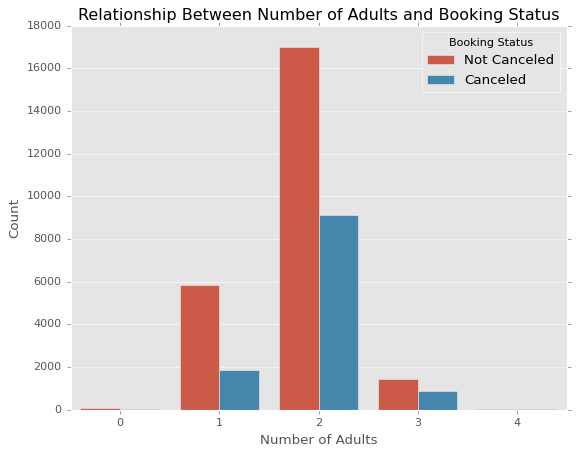

In [171]:
sns.countplot(data=hotels, x='no_of_adults', hue='booking_status')
plt.title('Relationship Between Number of Adults and Booking Status')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``no_of_children``:

Większość rezerwacji bez dzieci (93%), z ekstremalnymi wartościami 9-10 dzieci wymagającymi uwagi jako potencjalne błędy.

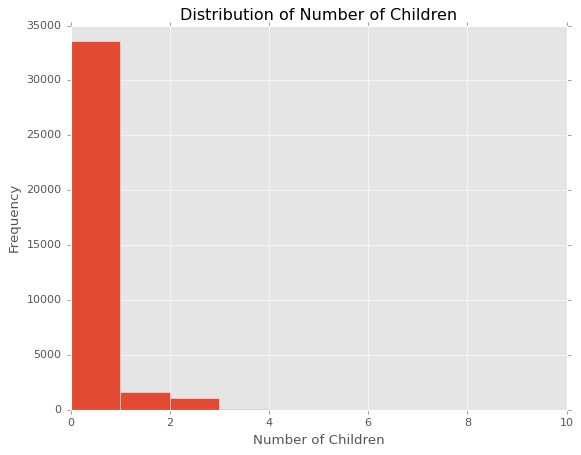

In [172]:
plt.hist(hotels.no_of_children, bins=10)
plt.title('Distribution of Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Frequency')
plt.show()

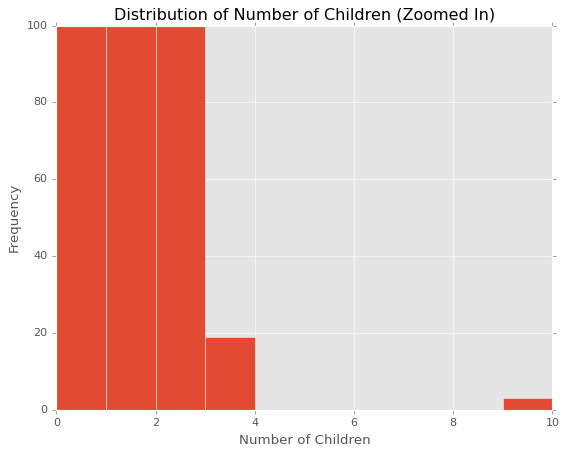

In [173]:
plt.hist(hotels.no_of_children, bins=10)
plt.title('Distribution of Number of Children (Zoomed In)')
plt.xlabel('Number of Children')
plt.ylim(0, 100)
plt.ylabel('Frequency')
plt.show()

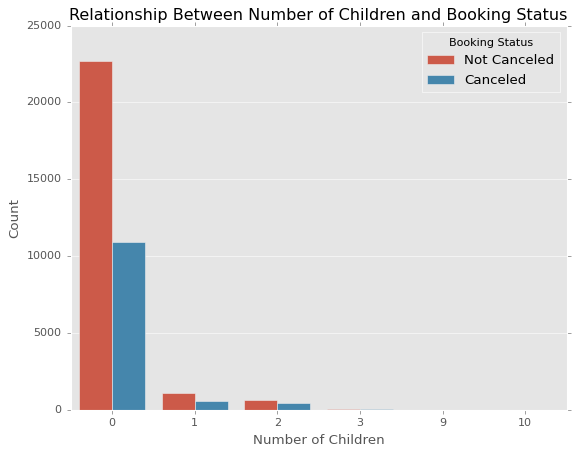

In [174]:
sns.countplot(data=hotels, x='no_of_children', hue='booking_status')
plt.title('Relationship Between Number of Children and Booking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [175]:
hotels.loc[hotels['no_of_adults'] == 0, :]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
32      INN00033             0               2                     0   
287     INN00288             0               2                     2   
653     INN00654             0               2                     1   
937     INN00938             0               2                     0   
954     INN00955             0               2                     1   
...          ...           ...             ...                   ...   
34720   INN34721             0               2                     0   
34730   INN34731             0               2                     1   
34890   INN34891             0               2                     2   
35691   INN35692             0               2                     2   
35797   INN35798             0               2                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
32                     3       Meal Plan 1                           0   
287                    2       Meal Plan 1                           0   
653                    2       Meal Plan 1                           0   
937                    3       Meal Plan 1                           0   
954                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
34720                  3       Meal Plan 1                           0   
34730                  1       Meal Plan 1                           0   
34890                  2       Meal Plan 1                           0   
35691                  1       Meal Plan 1                           0   
35797                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
32           Room_Type 2         56          2018             12   
287          Room_Type 1         68          2018              4   
653          Room_Type 2         78          2018              8   
937          Room_Type 2         40          2018              1   
954          Room_Type 2         92          2018             10   
...                  ...        ...           ...            ...   
34720        Room_Type 2         76          2018              9   
34730        Room_Type 2        178          2018              8   
34890        Room_Type 2         31          2018              9   
35691        Room_Type 2         75          2018              3   
35797        Room_Type 2        120          2018              6   

       arrival_date market_segment_type  repeated_guest  \
32                7              Online               0   
287              24              Online               0   
653              19              Online               0   
937              14              Online               0   
954              29              Online               0   
...             ...                 ...             ...   
34720            21              Online               0   
34730            27              Online               0   
34890            16              Online               0   
35691            19              Online               0   
35797            30              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
32                                0                                     0   
287                               0                                     0   
653                               0                                     0   
937                               0                                     0   
954                               0                                     0   
...                             ...                                   ...   
34720                             0                                     0   
34730                             0                                     0   
34890                            

In [176]:
hotels.loc[(hotels['no_of_adults'] == 0) & (hotels['no_of_children'] == 0), :]

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status]
Index: []

### Analiza ``no_of_weekend_nights``:

Równomierny rozkład między 0-2 nocami weekendowymi, z nielicznymi długimi pobytami weekendowymi.

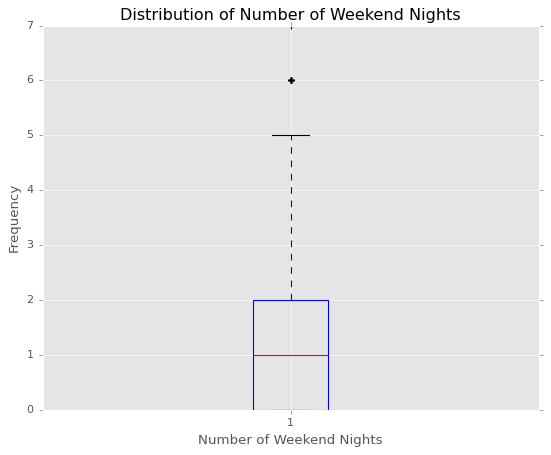

In [177]:
plt.boxplot(hotels.no_of_weekend_nights)
plt.title('Distribution of Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.show()

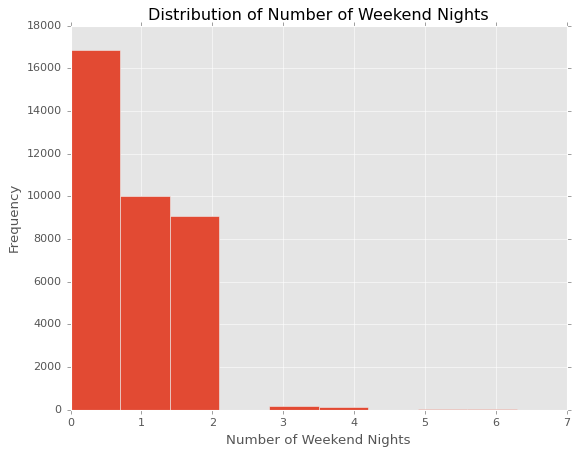

In [178]:
plt.hist(hotels.no_of_weekend_nights, bins=10)
plt.title('Distribution of Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.show()

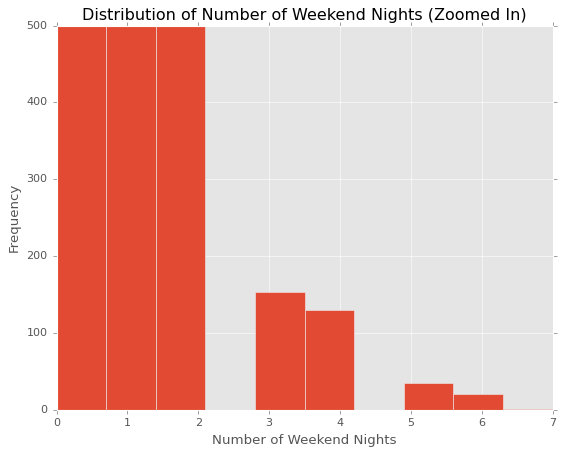

In [179]:
plt.hist(hotels.no_of_weekend_nights, bins=10)
plt.title('Distribution of Number of Weekend Nights (Zoomed In)')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Frequency')
plt.ylim(0, 500)
plt.show()

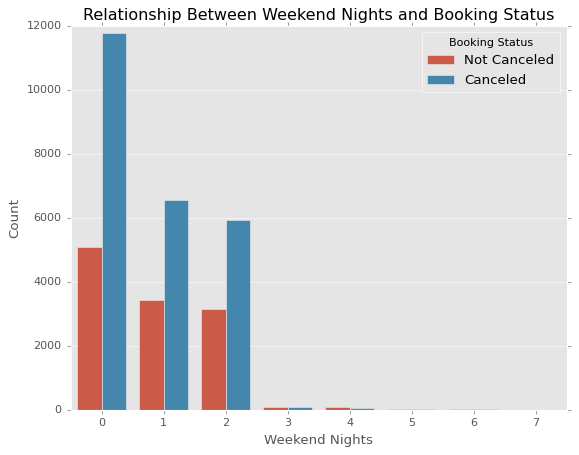

In [180]:
sns.countplot(data=hotels, x='no_of_weekend_nights', hue='booking_status')
plt.title('Relationship Between Weekend Nights and Booking Status')
plt.xlabel('Weekend Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``no_of_week_nights``:

Koncentracja na 1-3 nocach w dni robocze, z pojedynczymi przypadkami bardzo długich pobytów (do 17 nocy).

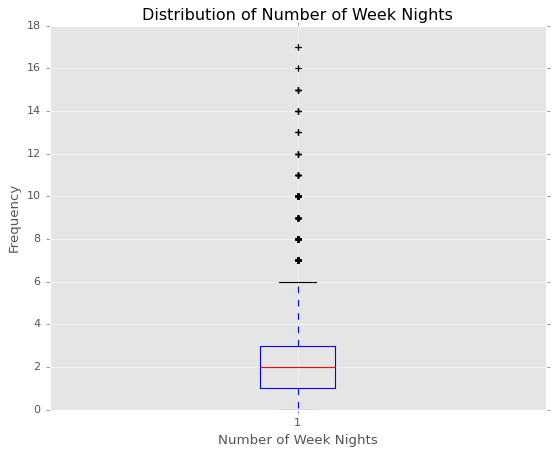

In [181]:
plt.boxplot(hotels.no_of_week_nights)
plt.title('Distribution of Number of Week Nights')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.show()

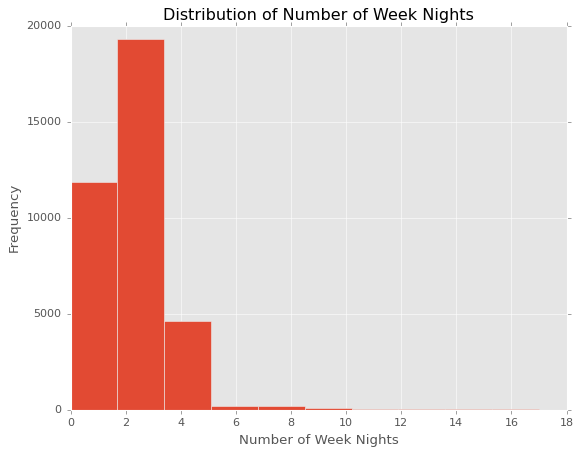

In [182]:
plt.hist(hotels.no_of_week_nights, bins=10)
plt.title('Distribution of Number of Week Nights')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.show()

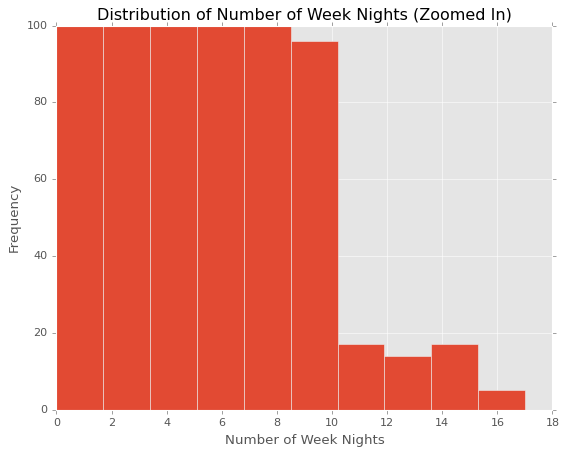

In [183]:
plt.hist(hotels.no_of_week_nights, bins=10)
plt.title('Distribution of Number of Week Nights (Zoomed In)')
plt.xlabel('Number of Week Nights')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

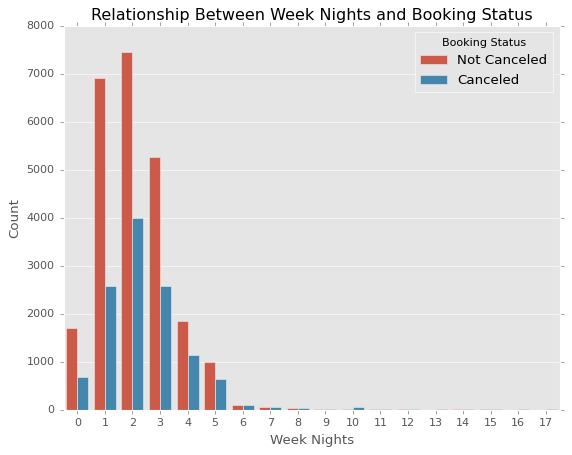

In [184]:
sns.countplot(data=hotels, x='no_of_week_nights', hue='booking_status')
plt.title('Relationship Between Week Nights and Booking Status')
plt.xlabel('Week Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``type_of_meal_plan``:

Zdecydowana dominacja "Meal Plan 1" (77%), z bardzo rzadkim "Meal Plan 3" (5 przypadków).

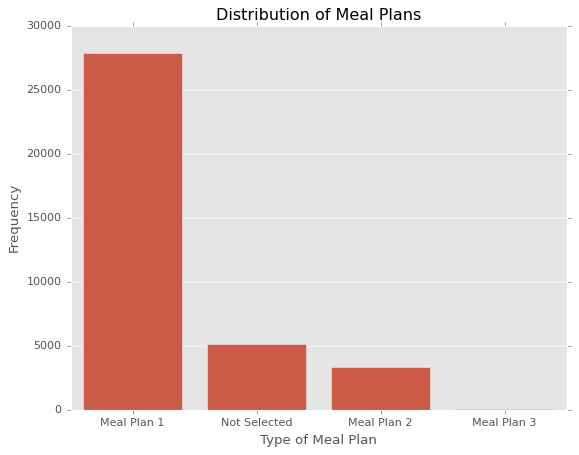

In [185]:
meal_plan_counts = hotels['type_of_meal_plan'].value_counts()
sns.barplot(x=meal_plan_counts.index, y=meal_plan_counts.values)
plt.title('Distribution of Meal Plans')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Frequency')
plt.show()

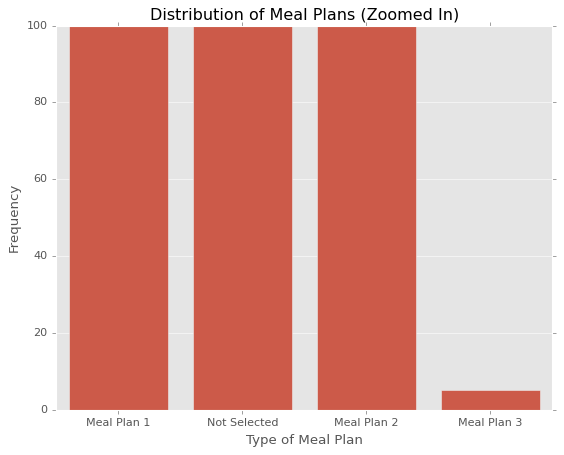

In [186]:
sns.barplot(x=meal_plan_counts.index, y=meal_plan_counts.values)
plt.title('Distribution of Meal Plans (Zoomed In)')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

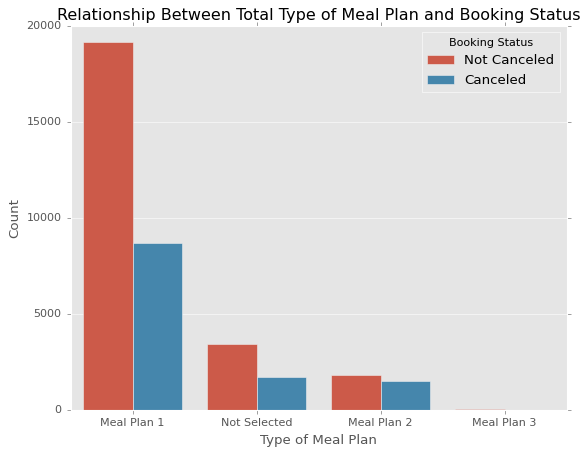

In [187]:
sns.countplot(data=hotels, x='type_of_meal_plan', hue='booking_status')
plt.title('Relationship Between Total Type of Meal Plan and Booking Status')
plt.xlabel('Type of Meal Plan')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``required_car_parking_space``:

Niewielki odsetek gości wymaga parkingu (3%).

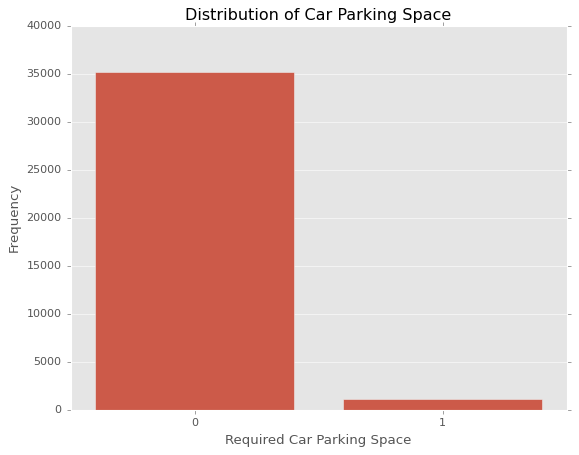

In [188]:
parking_space_counts = hotels['required_car_parking_space'].value_counts()
sns.barplot(x=parking_space_counts.index, y=parking_space_counts.values)
plt.title('Distribution of Car Parking Space')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Frequency')
plt.show()

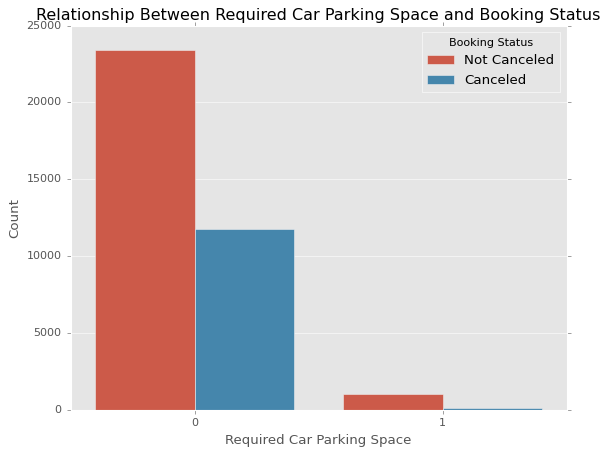

In [189]:
sns.countplot(data=hotels, x='required_car_parking_space', hue='booking_status')
plt.title('Relationship Between Required Car Parking Space and Booking Status')
plt.xlabel('Required Car Parking Space')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``room_type_reserved``:

Silna dominacja "Room_Type 1" (78%), z bardzo rzadkim "Room_Type 3" (7 przypadków).

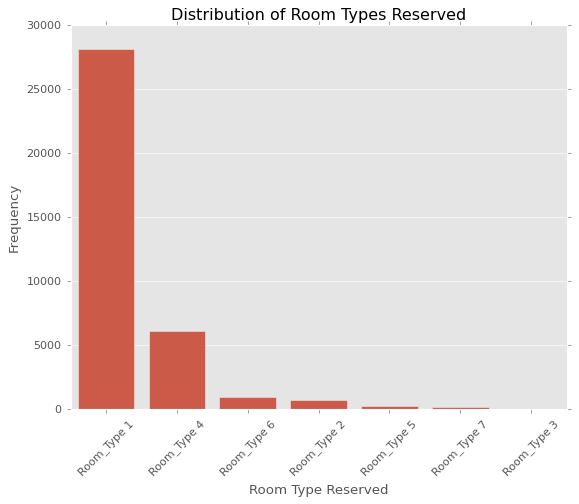

In [190]:
room_type_count = hotels['room_type_reserved'].value_counts()
sns.barplot(x=room_type_count.index, y=room_type_count.values)
plt.title('Distribution of Room Types Reserved')
plt.xlabel('Room Type Reserved')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

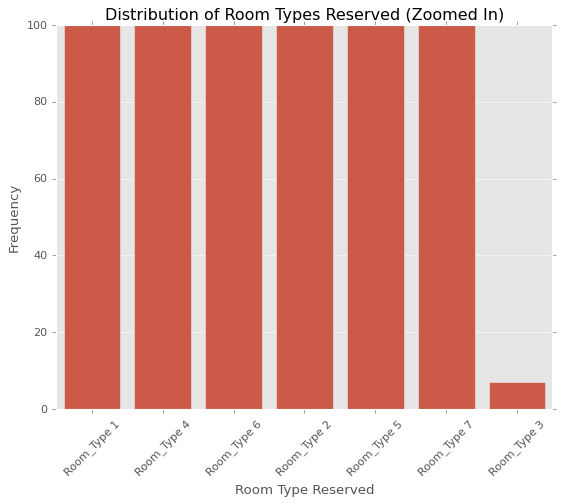

In [191]:
room_type_count = hotels['room_type_reserved'].value_counts()
sns.barplot(x=room_type_count.index, y=room_type_count.values)
plt.title('Distribution of Room Types Reserved (Zoomed In)' )
plt.xlabel('Room Type Reserved')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

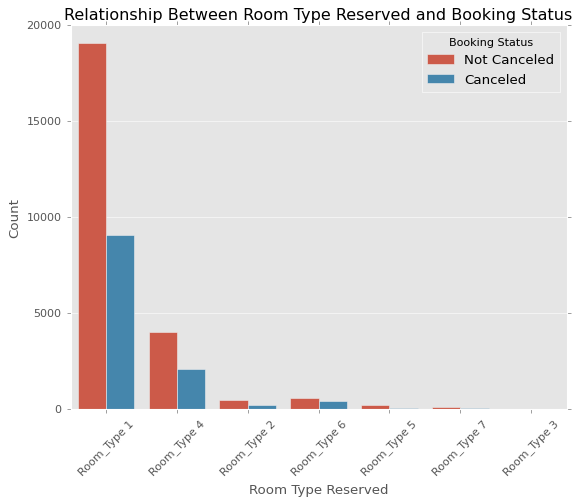

In [192]:
sns.countplot(data=hotels, x='room_type_reserved', hue='booking_status')
plt.title('Relationship Between Room Type Reserved and Booking Status')
plt.xlabel('Room Type Reserved')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``lead_time``:

Szeroki zakres od 0 do 443 dni z koncentracją na krótkich terminach, co wazne widać róznicę w częstości anulowanych rezerwacji w zależności od czasu rezerwacji.

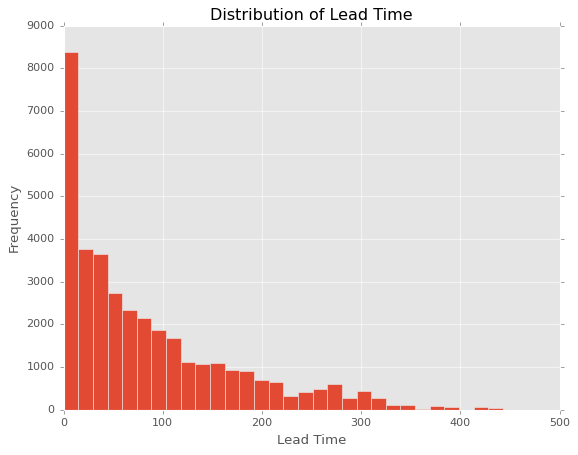

In [193]:
plt.hist(hotels.lead_time, bins=30)
plt.title('Distribution of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

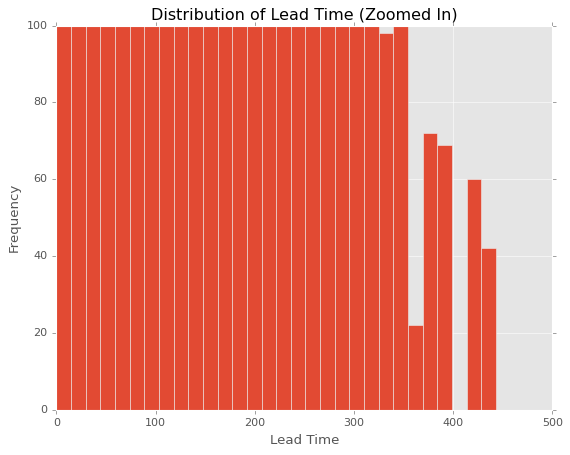

In [194]:
plt.hist(hotels.lead_time, bins=30)
plt.title('Distribution of Lead Time (Zoomed In)')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.ylim(0, 100)
plt.show()

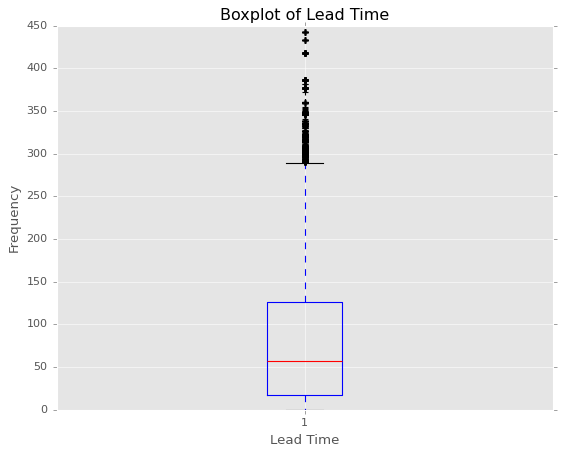

In [195]:
plt.boxplot(hotels.lead_time)
plt.title('Boxplot of Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

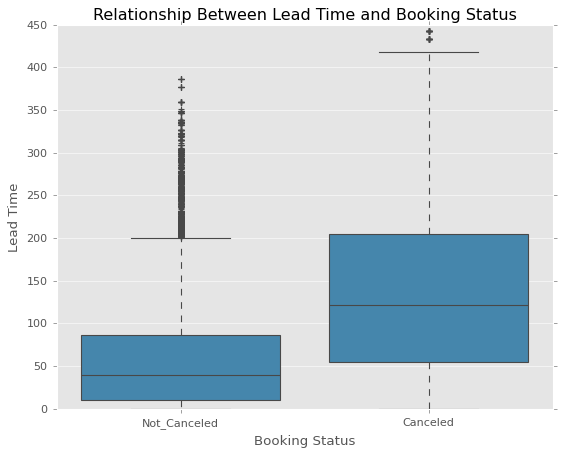

In [196]:
sns.boxplot(data=hotels, x='booking_status', y='lead_time')
plt.title('Relationship Between Lead Time and Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time')
plt.show()

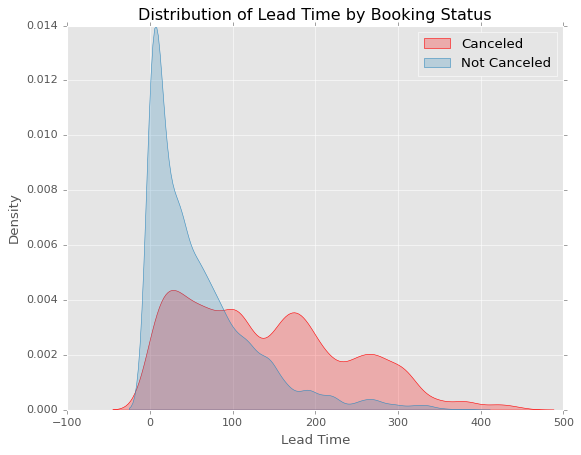

In [197]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='lead_time', label='Canceled', fill=True, color='red')
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='lead_time', label='Not Canceled', fill=True)
plt.title('Distribution of Lead Time by Booking Status')
plt.xlabel('Lead Time')
plt.ylabel('Density')
plt.legend()
plt.show()

In [198]:
hotels.groupby('booking_status')['lead_time'].describe()

count        mean        std  min   25%    50%    75%    max
booking_status                                                                
Canceled        11885.0  139.215482  98.947731  0.0  55.0  122.0  205.0  443.0
Not_Canceled    24390.0   58.927224  64.028714  0.0  10.0   39.0   86.0  386.0

### Analiza ``arrival_year``:

Nierównomierny rozkład z dominacją 2018 roku (82%)

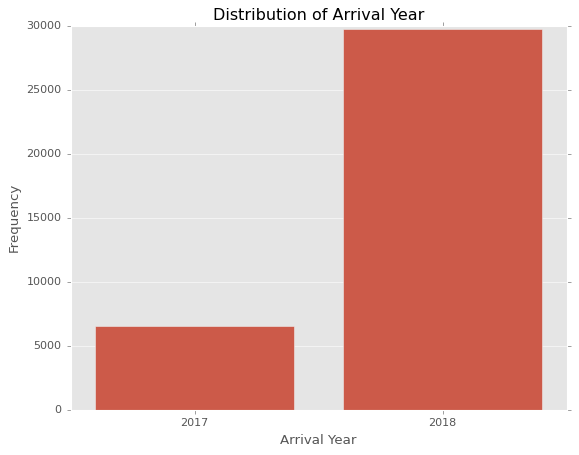

In [199]:
year_count = hotels['arrival_year'].value_counts()
sns.barplot(x=year_count.index, y=year_count.values)
plt.title('Distribution of Arrival Year')
plt.xlabel('Arrival Year')
plt.ylabel('Frequency')
plt.show()

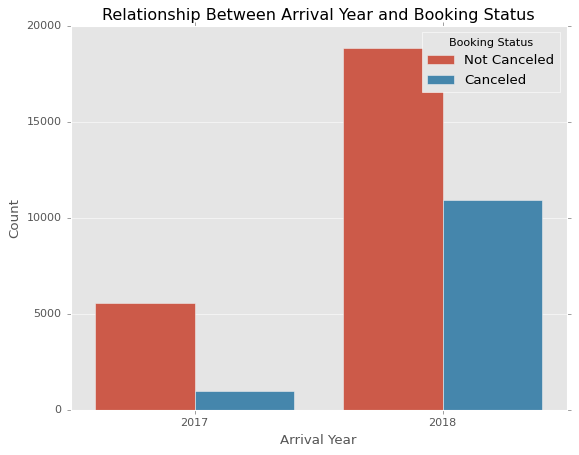

In [200]:
sns.countplot(data=hotels, x='arrival_year', hue='booking_status')
plt.title('Relationship Between Arrival Year and Booking Status')
plt.xlabel('Arrival Year')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``arrival_month``:

Sezonowość z pikiem w październiku i najniższą aktywnością w styczniu, co wazne widać różnice w częstości anulowanych rezerwacji w zależności od miesiąca przyjazdu dla miesięcy w okresie zimowy.

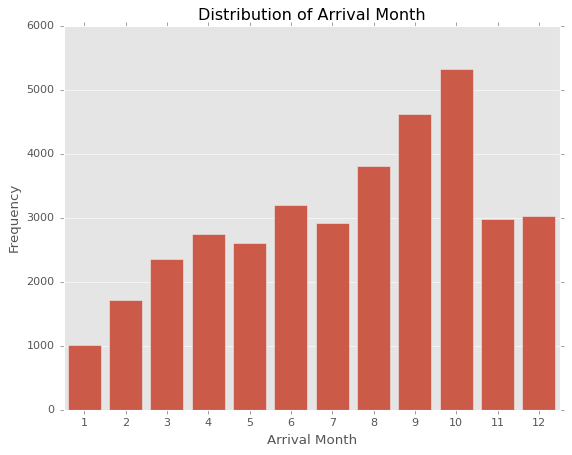

In [201]:
month_count = hotels['arrival_month'].value_counts()
sns.barplot(x=month_count.index, y=month_count.values)
plt.title('Distribution of Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Frequency')
plt.show()

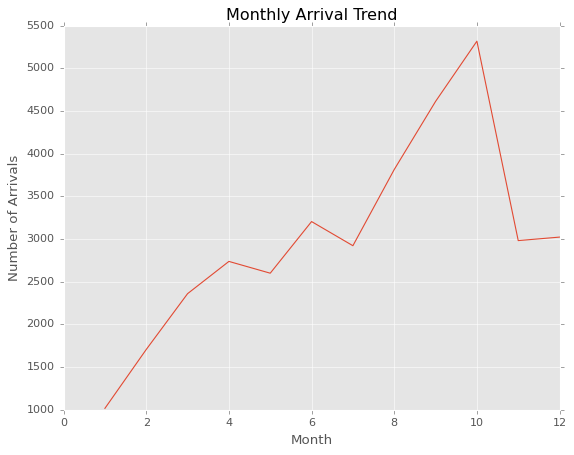

In [202]:
hotels['arrival_month'].value_counts().sort_index().plot(kind='line')
plt.title('Monthly Arrival Trend')
plt.xlabel('Month')
plt.ylabel('Number of Arrivals')
plt.show()

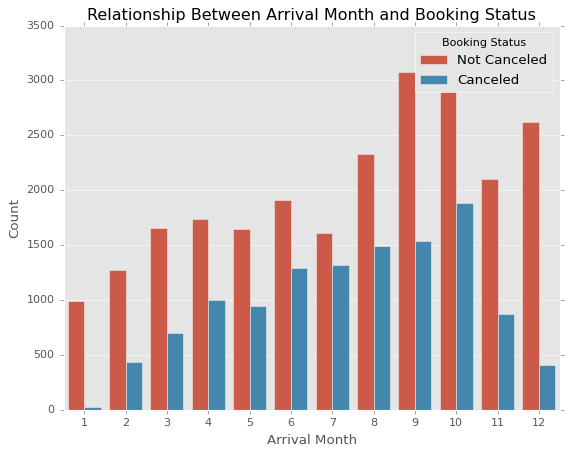

In [203]:
sns.countplot(data=hotels, x='arrival_month', hue='booking_status')
plt.title('Relationship Between Arrival Month and Booking Status')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``arrival_date``:

Względnie równomierny rozkład dni miesiąca z lekką preferencją dla środka miesiąca.

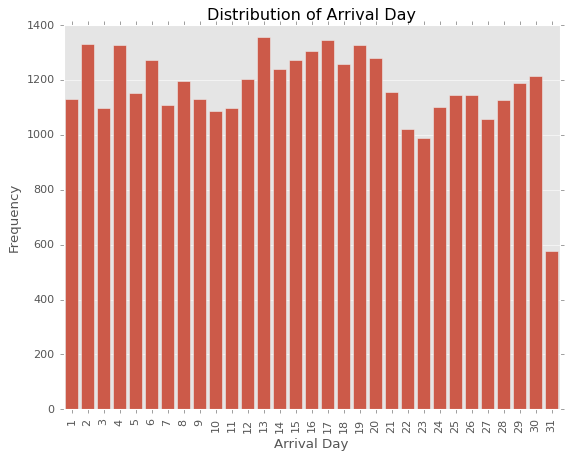

In [204]:
# plt.hist(hotels.arrival_date, bins=30)
day_count = hotels['arrival_date'].value_counts()
sns.barplot(x=day_count.index, y=day_count.values)
plt.title('Distribution of Arrival Day')
plt.xlabel('Arrival Day')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.show()

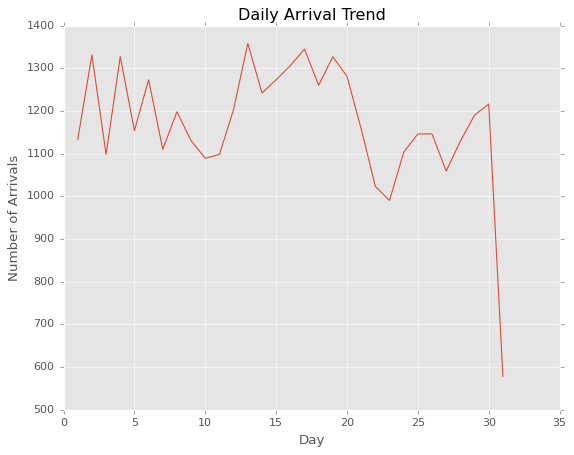

In [205]:
hotels['arrival_date'].value_counts().sort_index().plot(kind='line')
plt.title('Daily Arrival Trend')
plt.xlabel('Day')
plt.ylabel('Number of Arrivals')
plt.show()

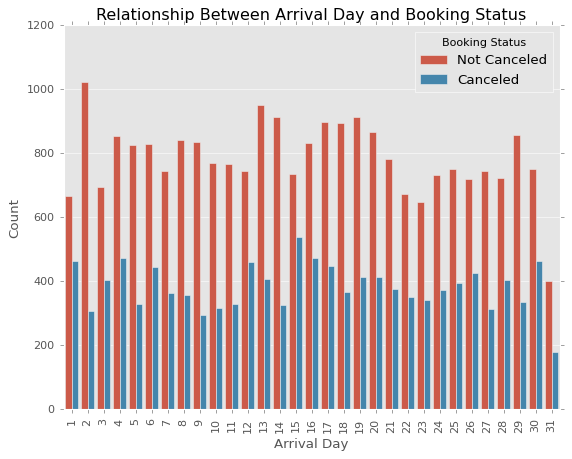

In [206]:
sns.countplot(data=hotels, x='arrival_date', hue='booking_status')
plt.title('Relationship Between Arrival Day and Booking Status')
plt.xlabel('Arrival Day')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=90)
plt.show()

### Analiza ``market_segment_type``:

Dominacja kanałów online (64%) nad offline (29%), z niewielkim udziałem segmentów korporacyjnych.

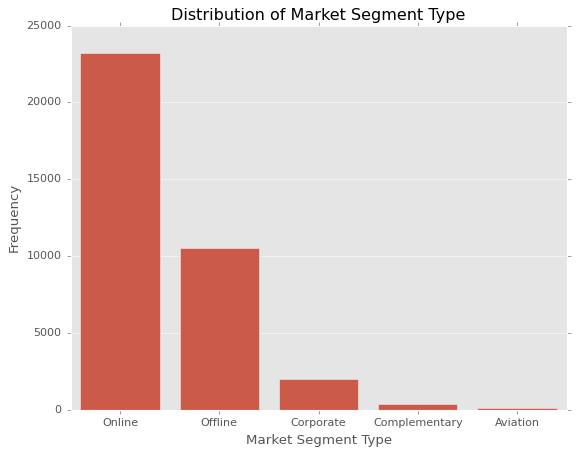

In [207]:
market_segment_count = hotels['market_segment_type'].value_counts()
sns.barplot(x=market_segment_count.index, y=market_segment_count.values)
plt.title('Distribution of Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Frequency')
plt.show()

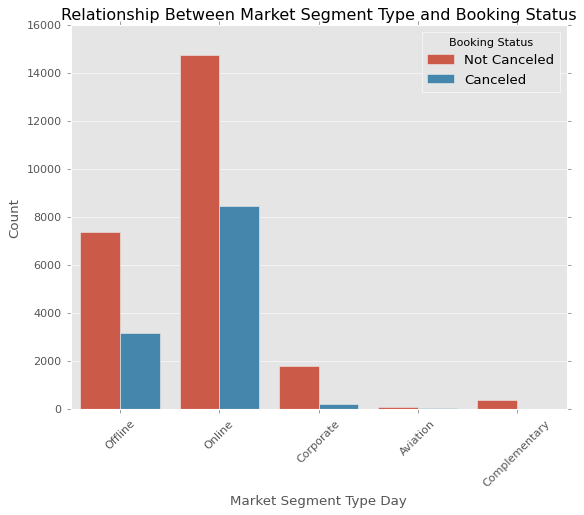

In [208]:
sns.countplot(data=hotels, x='market_segment_type', hue='booking_status')
plt.title('Relationship Between Market Segment Type and Booking Status')
plt.xlabel('Market Segment Type Day')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``repeated_guest``:

Zdecydowana większość to nowi goście (97%), co ogranicza wartość predykcyjną tej zmiennej.

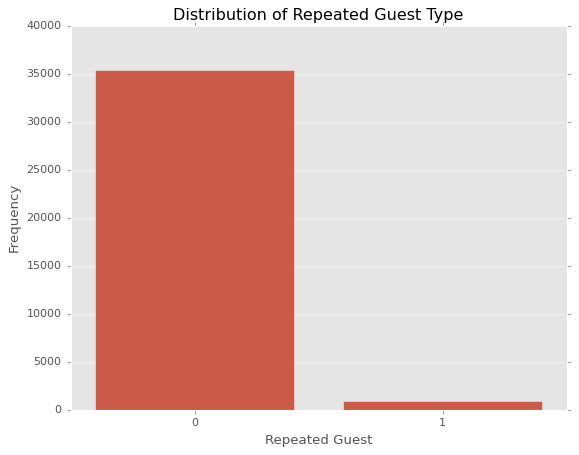

In [209]:
repeated_guest_count = hotels['repeated_guest'].value_counts()
sns.barplot(x=repeated_guest_count.index, y=repeated_guest_count.values)
plt.title('Distribution of Repeated Guest Type')
plt.xlabel('Repeated Guest')
plt.ylabel('Frequency')
plt.show()

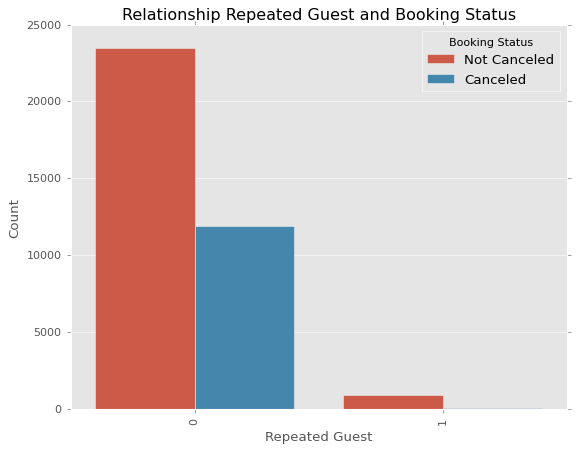

In [210]:
sns.countplot(data=hotels, x='repeated_guest', hue='booking_status')
plt.title('Relationship Repeated Guest and Booking Status')
plt.xlabel('Repeated Guest')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``number_of_previous_cancellations``:

Prawie wszyscy goście bez wcześniejszych anulowań (99%), z pojedynczymi przypadkami wielu anulowań.

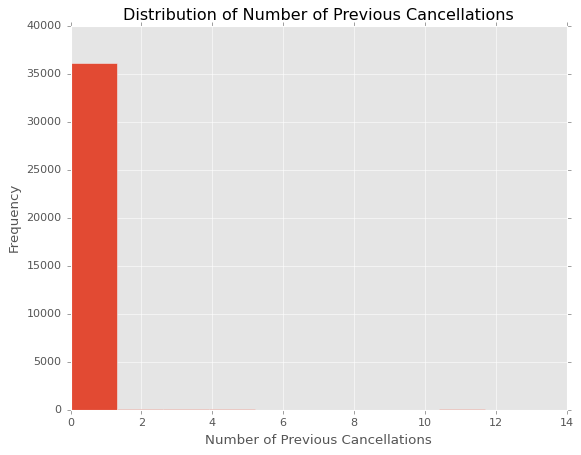

In [211]:
plt.hist(hotels.no_of_previous_cancellations, bins=10)
plt.title('Distribution of Number of Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Frequency')
plt.show()

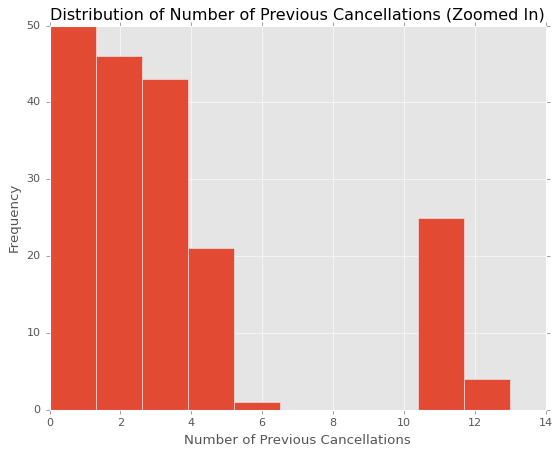

In [212]:
plt.hist(hotels.no_of_previous_cancellations, bins=10)
plt.title('Distribution of Number of Previous Cancellations (Zoomed In)')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Frequency')
plt.ylim(0, 50)
plt.show()

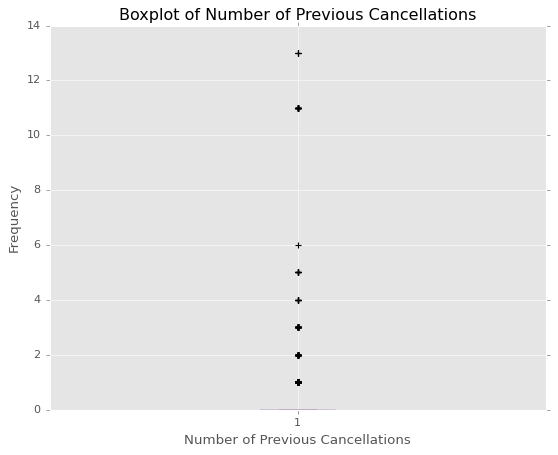

In [213]:
plt.boxplot(hotels.no_of_previous_cancellations)
plt.title('Boxplot of Number of Previous Cancellations')
plt.xlabel('Number of Previous Cancellations')
plt.ylabel('Frequency')
plt.show()

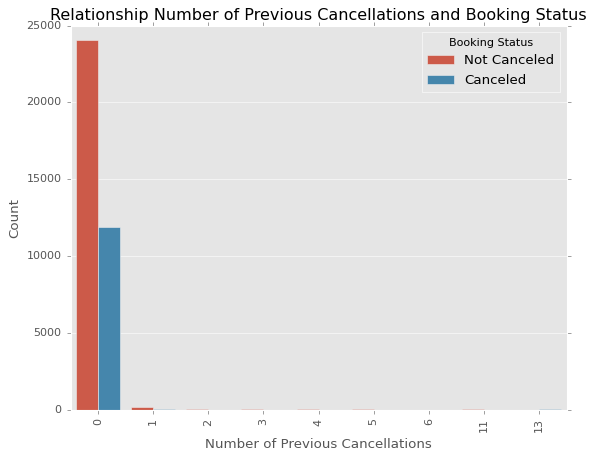

In [214]:
sns.countplot(data=hotels, x='no_of_previous_cancellations', hue='booking_status')
plt.title('Relationship Number of Previous Cancellations and Booking Status')
plt.xlabel('Number of Previous Cancellations')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``no_of_previous_bookings_not_canceled``:

Podobnie jak anulowania, większość bez historii (98%), z szerokim zakresem dla częstych gości.

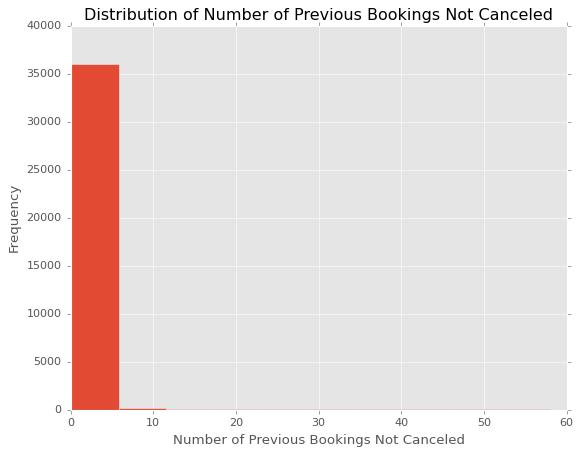

In [215]:
plt.hist(hotels.no_of_previous_bookings_not_canceled, bins=10)
plt.title('Distribution of Number of Previous Bookings Not Canceled')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.show()

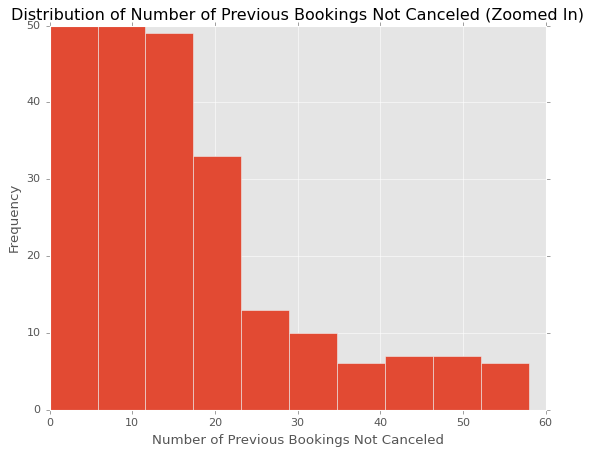

In [216]:
plt.hist(hotels.no_of_previous_bookings_not_canceled, bins=10)
plt.title('Distribution of Number of Previous Bookings Not Canceled (Zoomed In)')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.ylim(0, 50)
plt.show()

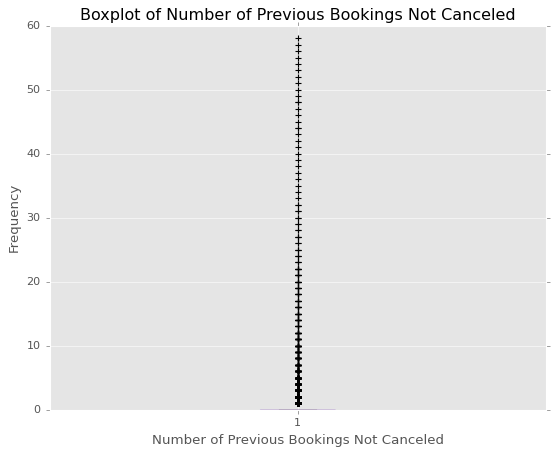

In [217]:
plt.boxplot(hotels.no_of_previous_bookings_not_canceled)
plt.title('Boxplot of Number of Previous Bookings Not Canceled')
plt.xlabel('Number of Previous Bookings Not Canceled')
plt.ylabel('Frequency')
plt.show()

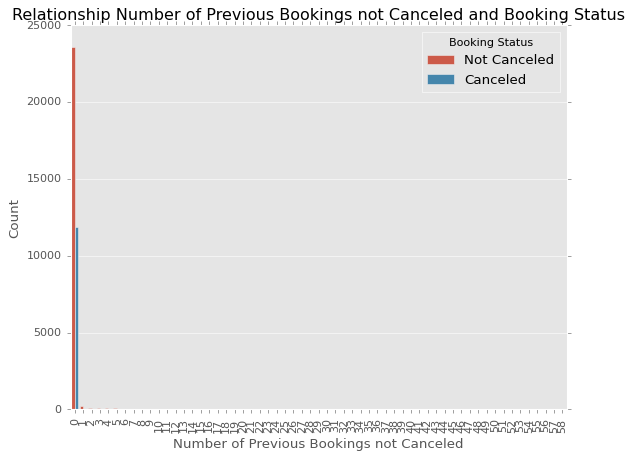

In [218]:
sns.countplot(data=hotels, x='no_of_previous_bookings_not_canceled', hue='booking_status')
plt.title('Relationship Number of Previous Bookings not Canceled and Booking Status')
plt.xlabel('Number of Previous Bookings not Canceled')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``avg_price_per_room``:

Bardzo zróżnicowane ceny (3930 unikalnych wartości) z koncentracją wokół standardowych wartości (65-115 euro), mozna zauwazyc lekkie roznice w dystrybucji dla anulowanego statusu.

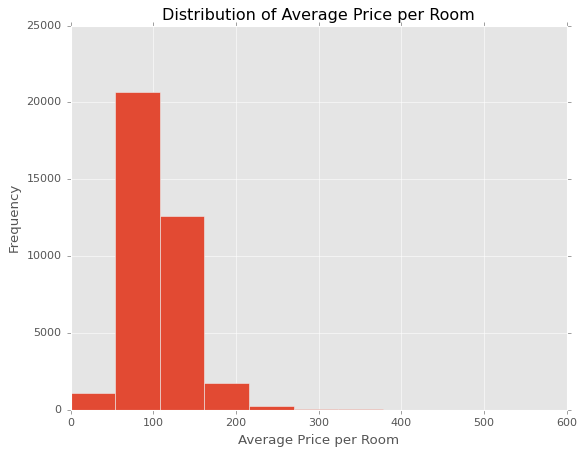

In [219]:
plt.hist(hotels.avg_price_per_room, bins=10)
plt.title('Distribution of Average Price per Room')
plt.xlabel('Average Price per Room')
plt.ylabel('Frequency')
plt.show()

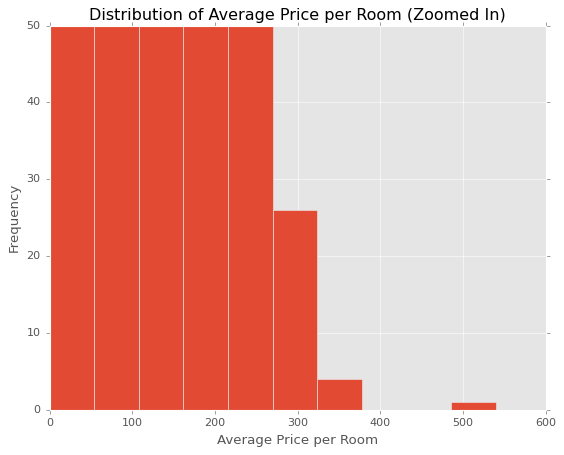

In [220]:
plt.hist(hotels.avg_price_per_room, bins=10)
plt.title('Distribution of Average Price per Room (Zoomed In)')
plt.xlabel('Average Price per Room')
plt.ylabel('Frequency')
plt.ylim(0, 50)
plt.show()

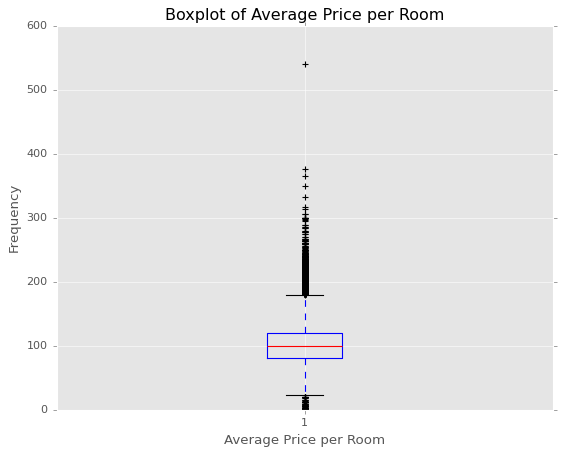

In [221]:
plt.boxplot(hotels.avg_price_per_room)
plt.title('Boxplot of Average Price per Room')
plt.xlabel('Average Price per Room')
plt.ylabel('Frequency')
plt.show()

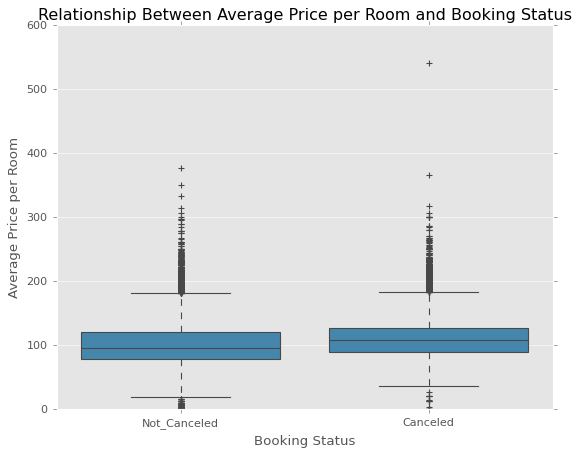

In [222]:
sns.boxplot(data=hotels, x='booking_status', y='avg_price_per_room')
plt.title('Relationship Between Average Price per Room and Booking Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Price per Room')
plt.show()

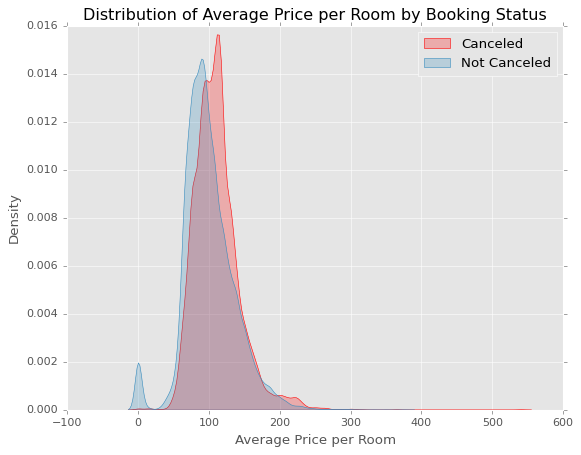

In [223]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='avg_price_per_room', label='Canceled', fill=True, color='red')
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='avg_price_per_room', label='Not Canceled', fill=True)
plt.title('Distribution of Average Price per Room by Booking Status')
plt.xlabel('Average Price per Room')
plt.ylabel('Density')
plt.legend()
plt.show()

In [224]:
hotels[hotels['avg_price_per_room'] < 50].avg_price_per_room.value_counts()

avg_price_per_room
0.00     545
6.00      25
48.00     23
45.00     21
38.67     17
        ... 
32.50      1
45.87      1
44.67      1
41.76      1
42.50      1
Name: count, Length: 95, dtype: int64

In [225]:
len(hotels[hotels['avg_price_per_room'] < 50])

896

In [226]:
hotels.groupby('booking_status')['avg_price_per_room'].describe()

count        mean        std  min    25%    50%     75%  \
booking_status                                                              
Canceled        11885.0  110.589966  32.264394  0.0  89.27  108.0  126.36   
Not_Canceled    24390.0   99.931412  35.872154  0.0  77.86   95.0  119.10   

                  max  
booking_status         
Canceled        540.0  
Not_Canceled    375.5

### Analiza ``no_of_special_requests``:

Większość bez specjalnych życzeń (55%), z malejącą częstością dla większej liczby próśb, aczkowliek widać, ze goście z liczbą życzeń większa niz 0 są mniej skłonni do anulowania rezerwacji.

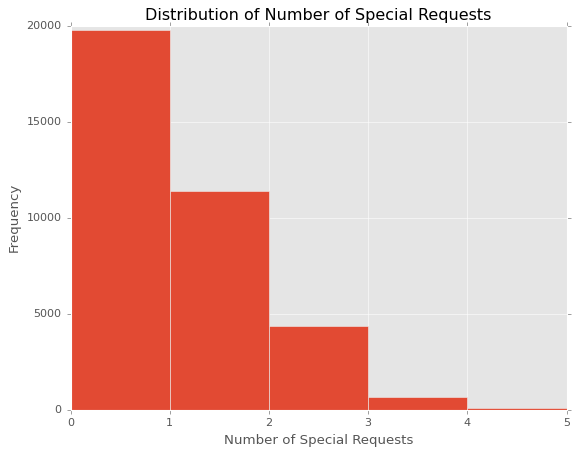

In [227]:
# special_requests_counts = hotels['no_of_special_requests'].value_counts()
# sns.barplot(x=special_requests_counts.index, y=special_requests_counts.values)
plt.hist(hotels.no_of_special_requests, bins=5)
plt.title('Distribution of Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.show()

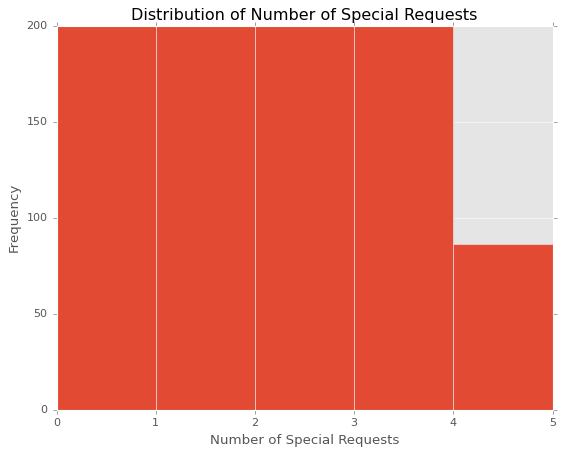

In [228]:
# sns.barplot(x=special_requests_counts.index, y=special_requests_counts.values)
plt.hist(hotels.no_of_special_requests, bins=5)
plt.title('Distribution of Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Frequency')
plt.ylim(0, 200)
plt.show()

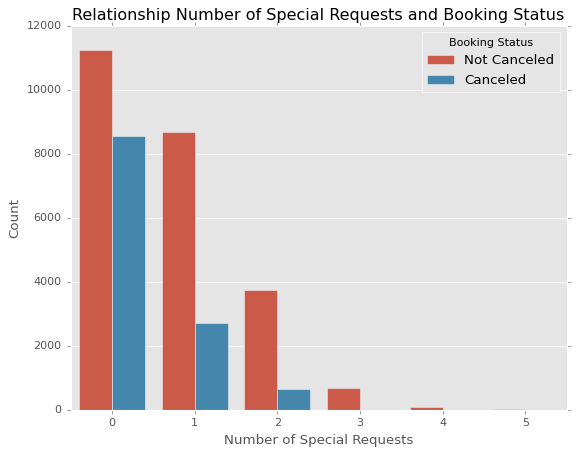

In [229]:
sns.countplot(data=hotels, x='no_of_special_requests', hue='booking_status')
plt.title('Relationship Number of Special Requests and Booking Status')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Analiza ``booking_status``:

Niezbalansowanie klas z 67% niezanulowanych rezerwacji.

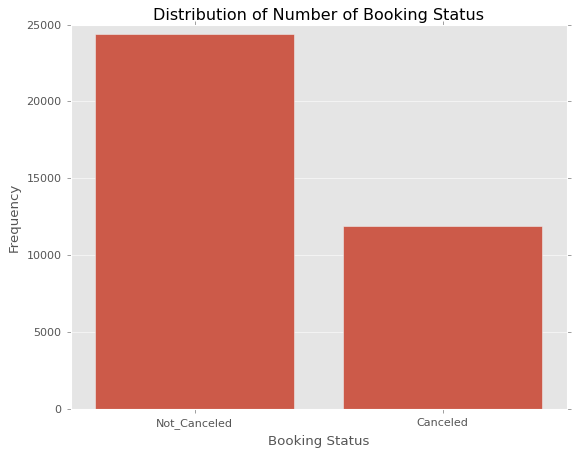

In [230]:
booking_status_counts = hotels['booking_status'].value_counts()
sns.barplot(x=booking_status_counts.index, y=booking_status_counts.values)
plt.xlabel('Booking Status')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Booking Status')
plt.show()

## Faza 4: Przygotowanie danych do modelowania

**Operacje oczyszczania i filtrowania:**
- Usunięto kolumnę identyfikacyjną ``Booking_ID``
- Odfiltrowano rekordy z nieprawdopodobnymi wartościami: ``no_of_adults`` > 0 i ≤ 3
- Ograniczono ``no_of_week_nights`` do maksymalnie 5 nocy w celu eliminacji wartości odstających
- Usunięto zmienne o niskiej wartości predykcyjnej: ``room_type_reserved`` i ``arrival_year``

**Inżynieria cech:**
- Utworzono zmienną ``no_of_guests`` jako sumę dorosłych i dzieci
- Utworzono zmienną ``no_of_nights`` jako sumę noclegów weekendowych i w dni robocze
- Wygenerowano wskaźnik ``guests_per_night`` dla lepszego zrozumienia charakteru pobytu
- Przekształcono ``type_of_meal_plan`` na binarną zmienną meal_type (0: brak, 1: wybrany plan)
- Kategoryzowano ``arrival_month`` na pory roku (``arrival_season``)
- Uproszczono ``market_segment_type`` do trzech głównych kategorii (``market_type``)
- Utworzono binarną zmienną ``previously_canceled`` na podstawie historii rezerwacji
- Przekształcono ``no_of_special_requests`` na binarną zmienną ``has_special_request``

**Transformacje numeryczne:**
- Zastosowano standaryzację (StandardScaler) dla zmiennych lead_time i avg_price_per_room
- Utworzono transformacje logarytmiczne i pierwiastkowe dla zmiennych o wysokiej skośności
- Przygotowano zmienną docelową is_canceled jako binarną reprezentację booking_status

**Selekcja cech:**
- Usunięto oryginalne zmienne po utworzeniu ich przekształconych wersji
- Pozostawiono zestaw 8 zmiennych

**Rezultat:** przygotowano oczyszczony zbiór danych clean_hotels zawierający 7 zmiennych predykcyjnych i jedną zmienną docelową

In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.style.use('ggplot')

In [232]:
hotels = pd.read_csv('data/Hotel Reservations.csv')

In [233]:
hotels.shape

(36275, 19)

In [234]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

### Usunięcie ``Booking_ID``:

In [235]:
hotels = hotels.drop(columns=['Booking_ID'])

### Transformacja ``no_of_adults`` i ``no_of_children``:

In [236]:
hotels = hotels[(hotels['no_of_adults'] > 0) & (hotels['no_of_adults'] <= 3)]

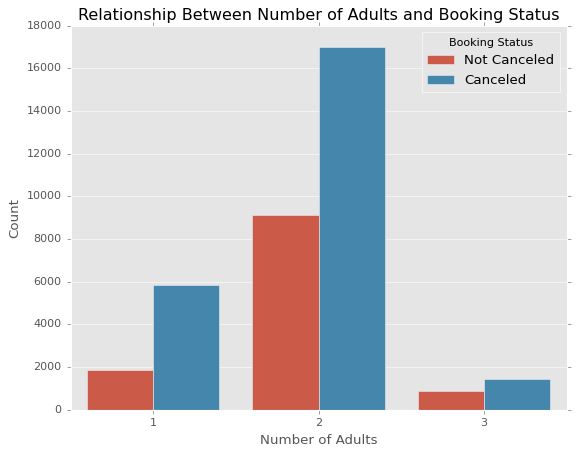

In [237]:
sns.countplot(data=hotels, x='no_of_adults', hue='booking_status')
plt.title('Relationship Between Number of Adults and Booking Status')
plt.xlabel('Number of Adults')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [238]:
hotels = hotels[hotels['no_of_children'] < 3]

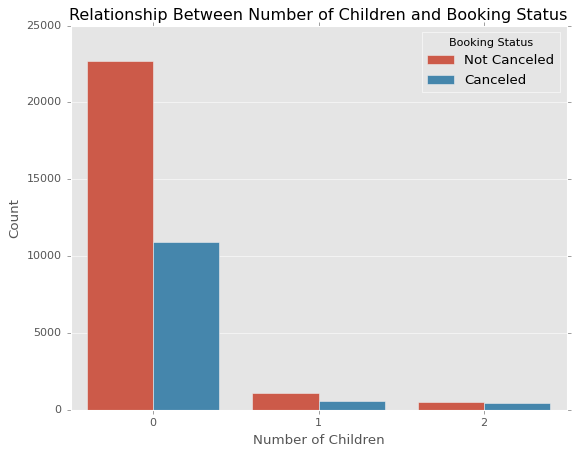

In [239]:
sns.countplot(data=hotels, x='no_of_children', hue='booking_status')
plt.title('Relationship Between Number of Children and Booking Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [240]:
hotels['no_of_guests'] = hotels['no_of_adults'] + hotels['no_of_children']

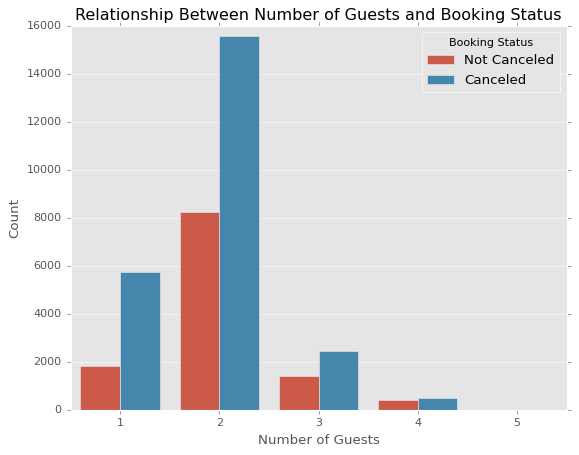

In [241]:
sns.countplot(data=hotels, x='no_of_guests', hue='booking_status')
plt.title('Relationship Between Number of Guests and Booking Status')
plt.xlabel('Number of Guests')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacja ``no_of_weekend_nights`` i ``no_of_week_nights``:

In [242]:
hotels = hotels[hotels['no_of_weekend_nights'] <= 2]

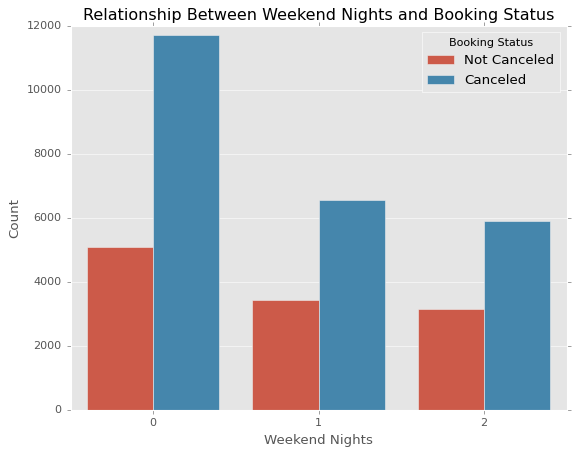

In [243]:
sns.countplot(data=hotels, x='no_of_weekend_nights', hue='booking_status')
plt.title('Relationship Between Weekend Nights and Booking Status')
plt.xlabel('Weekend Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [244]:
hotels = hotels[hotels['no_of_week_nights'] <= 5]

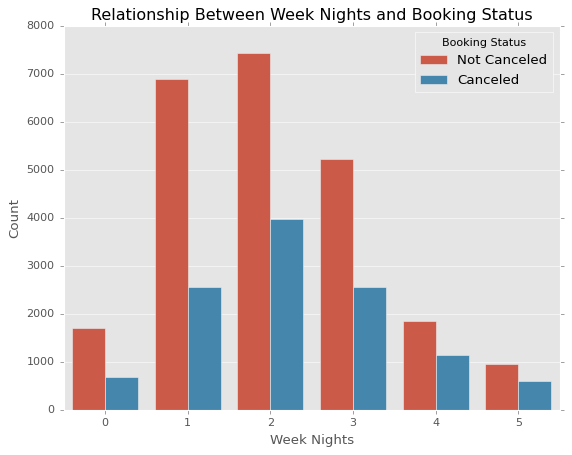

In [245]:
sns.countplot(data=hotels, x='no_of_week_nights', hue='booking_status')
plt.title('Relationship Between Week Nights and Booking Status')
plt.xlabel('Week Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

In [246]:
hotels['no_of_nights'] = hotels['no_of_weekend_nights'] + hotels['no_of_week_nights']

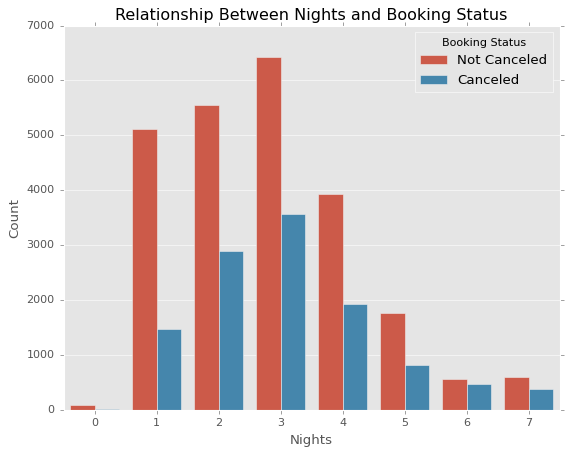

In [247]:
sns.countplot(data=hotels, x='no_of_nights', hue='booking_status')
plt.title('Relationship Between Nights and Booking Status')
plt.xlabel('Nights')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacje ``no_of_guests`` i ``no_of_nights``:

In [248]:
hotels['guests_per_night'] = hotels['no_of_guests'] / hotels['no_of_nights']

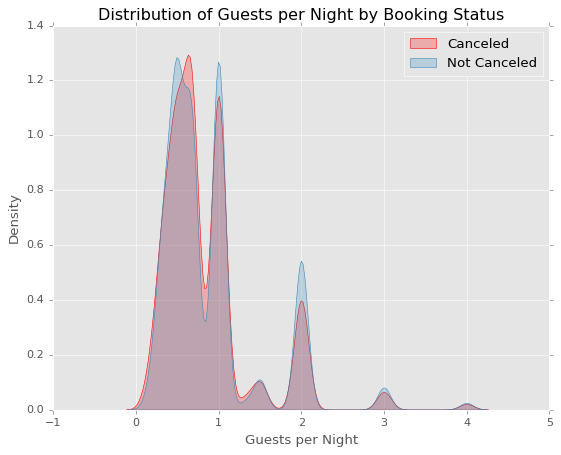

In [249]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='guests_per_night', label='Canceled', fill=True, color='red')
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='guests_per_night', label='Not Canceled', fill=True)
plt.title('Distribution of Guests per Night by Booking Status')
plt.xlabel('Guests per Night')
plt.ylabel('Density')
plt.legend()
plt.show()

### Transformacje ``no_of_week_nights`` i ``no_of_weekend_nights``:

In [250]:
def visit_type(row) -> str:
    if row['no_of_week_nights'] > 0 and row['no_of_weekend_nights'] == 0:
        return 'Week'
    elif row['no_of_weekend_nights'] > 0 and row['no_of_week_nights'] == 0:
        return 'Weekend'
    elif row['no_of_week_nights'] > 0 and row['no_of_weekend_nights'] > 0:
        return 'Both'

hotels['visit_type'] = hotels.apply(visit_type, axis=1)

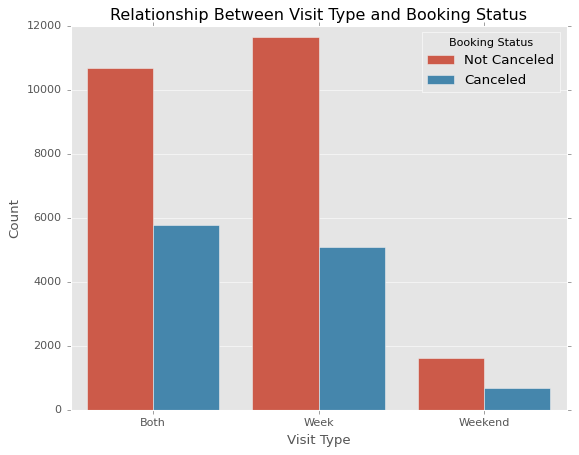

In [251]:
sns.countplot(data=hotels, x='visit_type', hue='booking_status')
plt.title('Relationship Between Visit Type and Booking Status')
plt.xlabel('Visit Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacja ``type_of_meal_plan``:

In [252]:
hotels['meal_type'] = hotels['type_of_meal_plan'].apply(lambda x: 0 if x == 'Not Selected' else 1)

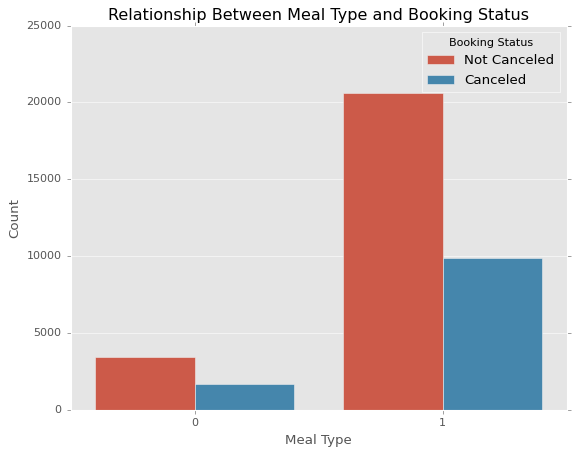

In [253]:
sns.countplot(data=hotels, x='meal_type', hue='booking_status')
plt.title('Relationship Between Meal Type and Booking Status')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Usunięcie ``arrival_year``:

In [254]:
hotels = hotels.drop(columns=['room_type_reserved'])

### Usunięcie ``arrival_year``:

In [255]:
hotels = hotels.drop(columns=['arrival_year'])

### Transformacja ``arrival_month``:

In [256]:
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

hotels['arrival_season'] = hotels['arrival_month'].apply(month_to_season)

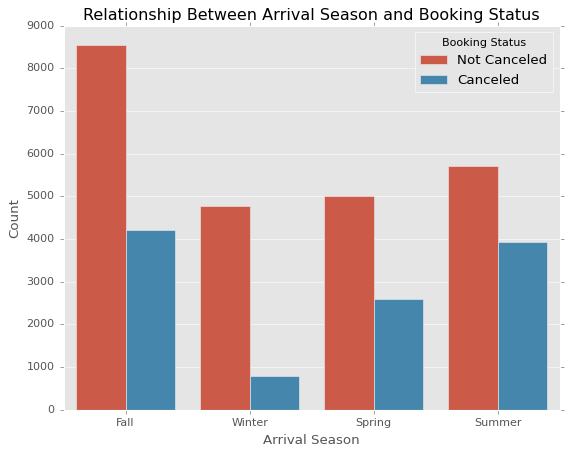

In [257]:
sns.countplot(data=hotels, x='arrival_season', hue='booking_status')
plt.title('Relationship Between Arrival Season and Booking Status')
plt.xlabel('Arrival Season')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacja ``arrival_date``:

In [258]:
def date_to_week(day):
    if 1 <= day <= 7:
        return 'Week 1'
    elif 8 <= day <= 14:
        return 'Week 2'
    elif 15 <= day <= 21:
        return 'Week 3'
    else:
        return 'Week 4'

hotels['arrival_week'] = hotels['arrival_date'].apply(date_to_week)

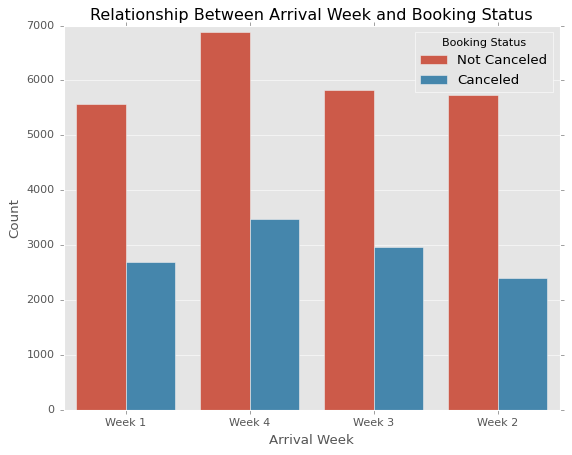

In [259]:
sns.countplot(data=hotels, x='arrival_week', hue='booking_status')
plt.title('Relationship Between Arrival Week and Booking Status')
plt.xlabel('Arrival Week')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacja ``market_segment_type``:

In [260]:
def categorize_market_segment(segment):
    online = ['Online', 'Aviation']
    offline = ['Offline', 'Corporate', 'Direct']
    
    if segment in online:
        return 'Online'
    elif segment in offline:
        return 'Offline'
    else:
        return 'Others'

hotels['market_type'] = hotels['market_segment_type'].apply(categorize_market_segment)

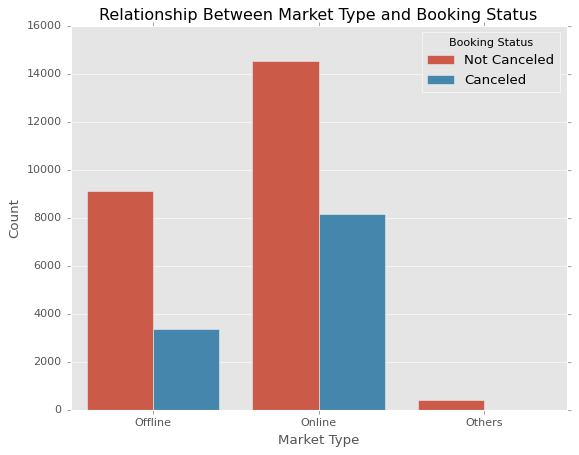

In [261]:
sns.countplot(data=hotels, x='market_type', hue='booking_status')
plt.title('Relationship Between Market Type and Booking Status')
plt.xlabel('Market Type')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacja ``no_of_previous_cancellations`` i ``no_of_previous_bookings_not_canceled``:

In [262]:
hotels['previously_canceled'] = (hotels['no_of_previous_bookings_not_canceled'] - hotels['no_of_previous_cancellations']).apply(lambda x: 1 if x > 0 else 0)

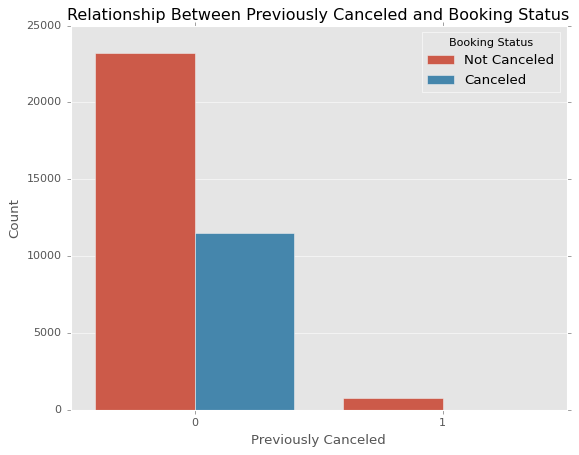

In [263]:
sns.countplot(data=hotels, x='previously_canceled', hue='booking_status')
plt.title('Relationship Between Previously Canceled and Booking Status')
plt.xlabel('Previously Canceled')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacje ``lead_time`` i ``avg_price_per_room``:

In [264]:
hotels = hotels[hotels['lead_time'] <= 350]

In [265]:
hotels = hotels[hotels['avg_price_per_room'] > 25]

In [266]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
hotels[['lead_time_scaled']] = scaler.fit_transform(hotels[['lead_time']])

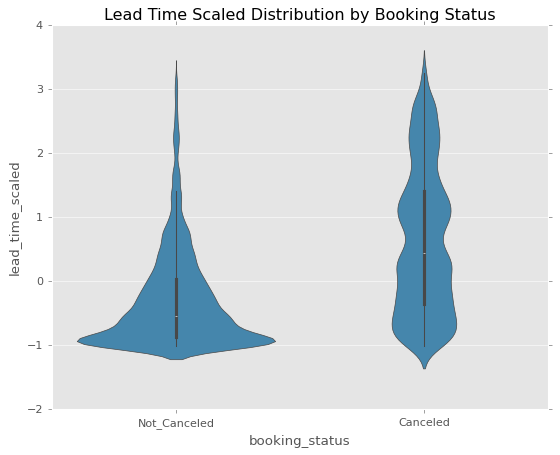

In [267]:
sns.violinplot(data=hotels, x='booking_status', y='lead_time_scaled')
plt.title('Lead Time Scaled Distribution by Booking Status')
plt.show()

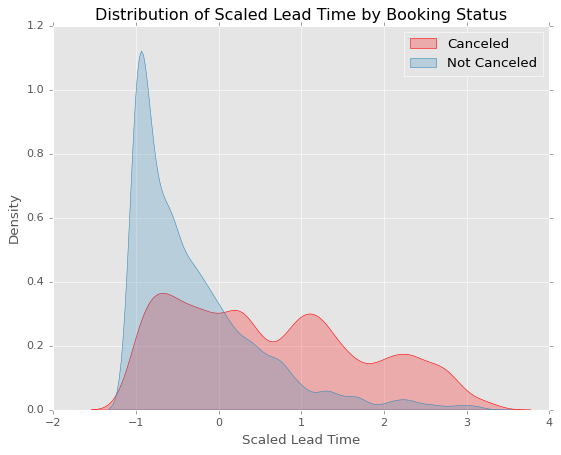

In [268]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='lead_time_scaled', label='Canceled', fill=True, color='red')
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='lead_time_scaled', label='Not Canceled', fill=True)
plt.title('Distribution of Scaled Lead Time by Booking Status')
plt.xlabel('Scaled Lead Time')
plt.ylabel('Density')
plt.legend()
plt.show()

In [269]:
scaler = StandardScaler()
hotels[['avg_price_per_room_scaled']] = scaler.fit_transform(hotels[['avg_price_per_room']])

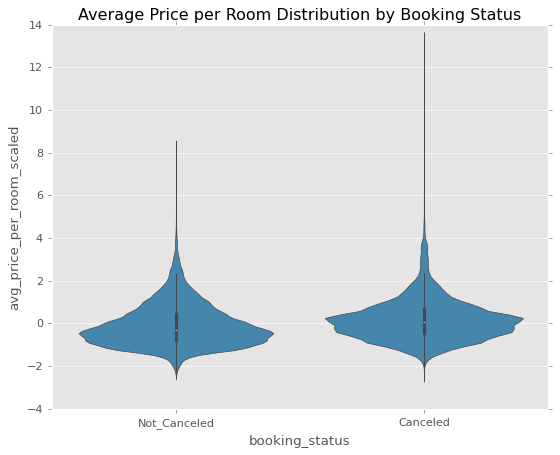

In [270]:
sns.violinplot(data=hotels, x='booking_status', y='avg_price_per_room_scaled')
plt.title('Average Price per Room Distribution by Booking Status')
plt.show()

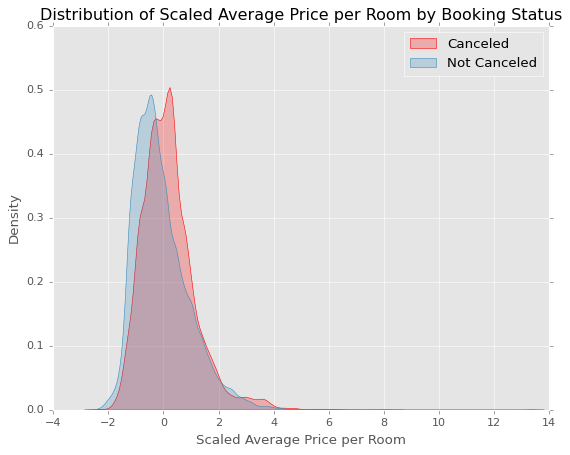

In [271]:
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Canceled'], x='avg_price_per_room_scaled', label='Canceled', fill=True, color='red')
sns.kdeplot(data=hotels[hotels['booking_status'] == 'Not_Canceled'], x='avg_price_per_room_scaled', label='Not Canceled', fill=True)
plt.title('Distribution of Scaled Average Price per Room by Booking Status')
plt.xlabel('Scaled Average Price per Room')
plt.ylabel('Density')
plt.legend()
plt.show()

### Transformacja ``no_of_special_requests``:

In [272]:
hotels['has_special_request'] = (hotels['no_of_special_requests'] > 0).astype(int)

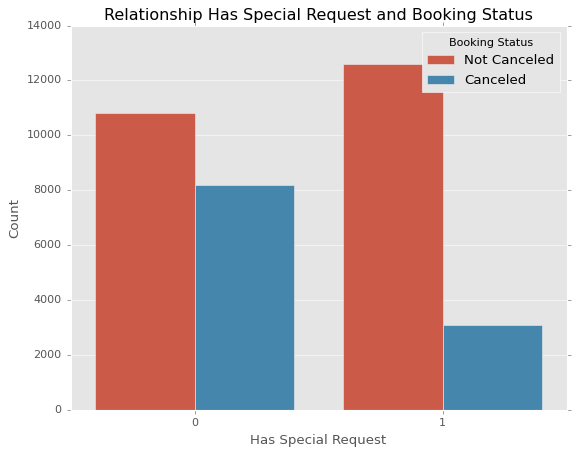

In [273]:
sns.countplot(data=hotels, x='has_special_request', hue='booking_status')
plt.title('Relationship Has Special Request and Booking Status')
plt.xlabel('Has Special Request')
plt.ylabel('Count')
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.show()

### Transformacja ``booking_status``:

In [274]:
hotels['is_canceled'] = (hotels['booking_status'] == 'Canceled').astype(int)

### Usunięcie nieużywanych zmiennych:

In [275]:
hotels.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'no_of_guests',
       'no_of_nights', 'guests_per_night', 'visit_type', 'meal_type',
       'arrival_season', 'arrival_week', 'market_type', 'previously_canceled',
       'lead_time_scaled', 'avg_price_per_room_scaled', 'has_special_request',
       'is_canceled'],
      dtype='object')

In [276]:
clean_hotels = hotels.drop(columns=['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'lead_time', 'arrival_month', 'arrival_date', 'market_segment_type',
       'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests', 'booking_status', 'no_of_guests', 'no_of_nights'
       ]
)

In [277]:
clean_hotels.head(10)

guests_per_night visit_type  meal_type arrival_season arrival_week  \
0          0.666667       Both          1           Fall       Week 1   
1          0.400000       Both          0           Fall       Week 1   
2          0.333333       Both          1         Winter       Week 4   
3          1.000000       Week          1         Spring       Week 3   
4          1.000000       Both          0         Spring       Week 2   
5          1.000000       Week          1           Fall       Week 2   
6          0.500000       Both          1           Fall       Week 3   
7          0.500000       Both          1         Winter       Week 4   
8          0.750000       Week          1         Summer       Week 1   
9          0.400000       Week          1           Fall       Week 3   

  market_type  previously_canceled  lead_time_scaled  \
0     Offline                    0          1.712938   
1      Online                    0         -0.960308   
2      Online                    0         -1.009135   
3      Online                    0          1.554252   
4      Online                    0         -0.435424   
5      Online                    0          3.202143   
6      Online                    0         -0.606317   
7      Online                    0         -0.008193   
8     Offline                    0          0.455658   
9      Online                    0         -0.484251   

   avg_price_per_room_scaled  has_special_request  is_canceled  
0                  -1.237557                    0            0  
1                   0.042275                    1            0  
2                  -1.391087                    0            1  
3                  -0.162842                    0            1  
4                  -0.331726                    0            1  
5                   0.297750                    1            1  
6                   0.068990                    1            0  
7                   0.009420                    1            0  
8                  -0.258031                    1            0  
9                   0.863972                    1            0

### Stworzenie dummy variables:

In [278]:
# visit_type_dummies = pd.get_dummies(clean_hotels['visit_type'], prefix='visit', drop_first=True)
arrival_season_dummies = pd.get_dummies(clean_hotels['arrival_season'], prefix='season', drop_first=True)
# arrival_week_dummies = pd.get_dummies(clean_hotels['arrival_week'], prefix='week', drop_first=True)
# market_type_dummies = pd.get_dummies(clean_hotels['market_type'], prefix='market', drop_first=True)

clean_hotels = clean_hotels.drop(['visit_type', 'arrival_season', 'arrival_week', 'market_type'], axis=1)
clean_hotels = clean_hotels.drop(['meal_type', 'previously_canceled'], axis=1)


clean_hotels = pd.concat([
    clean_hotels,
    # visit_type_dummies,
    arrival_season_dummies,
    # arrival_week_dummies,
    # market_type_dummies
], axis=1)

In [279]:
clean_hotels.columns

Index(['guests_per_night', 'lead_time_scaled', 'avg_price_per_room_scaled',
       'has_special_request', 'is_canceled', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')

### Wybranie finalnych cech:

In [280]:
clean_hotels = clean_hotels[['guests_per_night', 'lead_time_scaled', 'avg_price_per_room_scaled', 'has_special_request', 'season_Spring', 'season_Summer', 'season_Winter', 'is_canceled']]

In [281]:
final_hotels = clean_hotels

In [282]:
final_hotels.head(10)

guests_per_night  lead_time_scaled  avg_price_per_room_scaled  \
0          0.666667          1.712938                  -1.237557   
1          0.400000         -0.960308                   0.042275   
2          0.333333         -1.009135                  -1.391087   
3          1.000000          1.554252                  -0.162842   
4          1.000000         -0.435424                  -0.331726   
5          1.000000          3.202143                   0.297750   
6          0.500000         -0.606317                   0.068990   
7          0.500000         -0.008193                   0.009420   
8          0.750000          0.455658                  -0.258031   
9          0.400000         -0.484251                   0.863972   

   has_special_request  season_Spring  season_Summer  season_Winter  \
0                    0          False          False          False   
1                    1          False          False          False   
2                    0          False          False           True   
3                    0           True          False          False   
4                    0           True          False          False   
5                    1          False          False          False   
6                    1          False          False          False   
7                    1          False          False           True   
8                    1          False           True          False   
9                    1          False          False          False   

   is_canceled  
0            0  
1            0  
2            1  
3            1  
4            1  
5            1  
6            0  
7            0  
8            0  
9            0

In [283]:
final_hotels.to_csv('data/Hotel Reservations clean.csv')

## Faza 5: Modelowanie

**Przygotowanie danych:**
- Podział zbioru danych na zestaw treningowy (80%) i testowy (20%) z train_test_split
- Zdefiniowanie zmiennych predykcyjnych (X) i zmiennej docelowej (y = ``is_canceled``)
- Zastosowanie strategii random_state=42 dla reprodukowalności wyników

**Modele klasyfikacyjne:**
- Naiwny klasyfikator Bayesowski (``GaussianNB``) - bez hiperparametrów
- K najbliższych sąsiadów (``KNeighborsClassifier``) - optymalizacja ``n_neighbors`` 
- Regresja logistyczna (``LogisticRegression``) - optymalizacja ``C`` i ``max_iter``
- Liniowa analiza dyskryminacyjna (``LinearDiscriminantAnalysis``) - bez hiperparametrów
- Kwadratowa analiza dyskryminacyjna (``QuadraticDiscriminantAnalysis``) - bez hiperparametrów
- Drzewo decyzyjne (``DecisionTreeClassifier``) - optymalizacja ``max_depth``, ``min_samples_split``, ``min_samples_leaf``
- Las losowy (``RandomForestClassifier``) - optymalizacja ``n_estimators``, ``max_depth``, ``min_samples_split``, min_samples_leaf
- Support Vector Classification (``SVC``) - optymalizacja ``C``, ``kernel`` i ``degree``

**Techniki optymalizacji:**
- Grid Search z 5-krotną walidacją krzyżową (cv=5)
- Optymalizacja względem metryki F1-score (scoring='f1')
- Selekcja cech (Forward Selection)

**Metryki ewaluacji:**
- Dokładność (accuracy) - ogólna poprawność klasyfikacji
- Precyzja (precision) - jakość pozytywnych predykcji
- Czułość (recall) - pokrycie rzeczywistych pozytywnych przypadków
- F1-score - harmoniczna średnia precyzji i czułości
- ROC-AUC - zdolność rozróżniania klas
- Czas treningu i czas predykcji - efektywność obliczeniowa

**Automatyzacja procesu:**
- Systematyczne testowanie wszystkich modeli na wszystkich kombinacjach cech
- Automatyczne zapisywanie wyników do pliku CSV
- Szczegółowe logowanie postępu i wyników dla każdego modelu
- Obsługa błędów i kontynuacja procesu w przypadku niepowodzeń

### Przygotowanie funkcji pomocniczych:

In [291]:
from typing import List

def powerset(columns: List[str]) -> List[List[str]]:
    powerset = []
    length = len(columns)
    
    for i in range(1, 1 << length):
        subset = [columns[j] for j in range(length) if (i & (1 << j))]
        powerset.append(subset)
    
    return powerset

In [292]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

models_and_params = {
    "GaussianNB": {
        "model": GaussianNB(),
        "params": {},
    },
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9, 12],
        },
    },
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.001, 0.01, 0.1, 1, 10, 100],
            "max_iter": [100, 200, 500, 1000]
        },
    },
    "LinearDiscriminantAnalysis": {
        "model": LinearDiscriminantAnalysis(),
        "params": {},   
    },
    "QuadraticDiscriminantAnalysis": {
        "model": QuadraticDiscriminantAnalysis(),
        "params": {},
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200, 300],
            "max_depth": [None, 10, 20, 30],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
        },
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["rbf", "poly", "sigmoid"],
            "degree": [2, 3, 4],
        }
    }
}

In [293]:
from typing import Dict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tqdm import tqdm
import pandas as pd
import numpy as np
import time

def evaluate_model(grid_search, X_test: pd.DataFrame, y_test: pd.DataFrame) -> Dict:
    print(f"\nEvaluating model: {grid_search.best_estimator_.__class__.__name__}")
    
    fit_times = grid_search.cv_results_['mean_fit_time']
    mean_fit_time = np.mean(fit_times)
    
    start_time = time.time()
    y_pred = grid_search.predict(X_test)
    predict_time = time.time() - start_time
    
    y_pred_proba = grid_search.predict_proba(X_test)[:, 1] if hasattr(grid_search, "predict_proba") else None

    metrics = {
        'accuracy': np.round(
            accuracy_score(y_test, y_pred), 4
        ),
        'precision': np.round(
            precision_score(y_test, y_pred, zero_division=0), 4
        ),
        'recall': np.round(
            recall_score(y_test, y_pred, zero_division=0), 3
        ),
        'f1': np.round(
            f1_score(y_test, y_pred, zero_division=0), 3
        ),
        'roc_auc': np.round(
            roc_auc_score(y_test, y_pred_proba), 3
        ) if y_pred_proba is not None else None,
        'mean_fit_time': np.round(
            mean_fit_time, 3
        ),
        'predict_time': np.round(
            predict_time, 3
        ),
    }
    
    print("Metrics obtained:")
    for metric, value in metrics.items():
        print(f"- {metric}: {value}")
    
    return metrics

In [294]:
from sklearn.model_selection import GridSearchCV

def evaluate_models(models_and_params: Dict, X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> List:
    print(f"\nStarting evaluation of {len(models_and_params)} models")
    print(f"Training data shape: {X_train.shape}")
    print(f"Testing data shape: {X_test.shape}")
    
    results = []
    for name, info in models_and_params.items():
        print(f"\n{'='*50}")
        print(f"Training model: {name}")
        print(f"Parameter grid: {info['params']}")
        
        model = info["model"]
        params = info["params"]
        
        try:
            start_time = time.time()
            
            grid_search = GridSearchCV(
                estimator=model, 
                param_grid=params,
                cv=5,
                scoring='f1',
                n_jobs=-1,
                verbose=1,
                return_train_score=True
            )
            
            grid_search.fit(X_train, y_train)
            
            metrics = evaluate_model(grid_search, X_test, y_test)
            training_time = time.time() - start_time
            
            print(f"Best parameters found: {grid_search.best_params_}")
            print(f"Training time: {training_time:.2f} seconds")
            
            result = {
                'model': name,
                'columns': X_train.columns.tolist(),
                'best_params': str(grid_search.best_params_),
                'training_time': training_time,
                **metrics
            }
            results.append(result)
            
            
        except Exception as e:
            print(f"Error training {name}: {str(e)}")
    
    return results

In [295]:
def evaluate(models_and_params: Dict, columns: List[str], X_train: pd.DataFrame, y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    results = []
    total_combinations = len(list(powerset(columns)))
    
    print(f"Starting evaluation with {len(columns)} features")
    print(f"Total feature combinations to evaluate: {total_combinations}")
    
    for i, cols in enumerate(tqdm(powerset(columns)), 1):
        print(f"\nEvaluating combination {i}/{total_combinations}")
        print(f"Selected features: {cols}")
        
        X_train_sub = X_train[list(cols)]
        X_test_sub = X_test[list(cols)]
        
        results.append(evaluate_models(models_and_params, X_train_sub, y_train, X_test_sub, y_test))
        
        print(f"Completed combination {i}/{total_combinations}")
    
    print("\nCreating results DataFrame...")
    results_df = [pd.DataFrame(result) for result in results]
    df_results = pd.concat(results_df, ignore_index=True).reset_index(drop=True)
    
    print("Saving results to CSV...")
    df_results.to_csv('data/Hotel Reservations results.csv')
    
    print("Evaluation complete!")
    
    return df_results

### Przygotowanie danych:

In [296]:
hotels = pd.read_csv('data/Hotel Reservations clean.csv', index_col=[0])
hotels.head(10)

guests_per_night  lead_time_scaled  avg_price_per_room_scaled  \
0          0.666667          1.712938                  -1.237557   
1          0.400000         -0.960308                   0.042275   
2          0.333333         -1.009135                  -1.391087   
3          1.000000          1.554252                  -0.162842   
4          1.000000         -0.435424                  -0.331726   
5          1.000000          3.202143                   0.297750   
6          0.500000         -0.606317                   0.068990   
7          0.500000         -0.008193                   0.009420   
8          0.750000          0.455658                  -0.258031   
9          0.400000         -0.484251                   0.863972   

   has_special_request  season_Spring  season_Summer  season_Winter  \
0                    0          False          False          False   
1                    1          False          False          False   
2                    0          False          False           True   
3                    0           True          False          False   
4                    0           True          False          False   
5                    1          False          False          False   
6                    1          False          False          False   
7                    1          False          False           True   
8                    1          False           True          False   
9                    1          False          False          False   

   is_canceled  
0            0  
1            0  
2            1  
3            1  
4            1  
5            1  
6            0  
7            0  
8            0  
9            0

In [297]:
from sklearn.model_selection import train_test_split

X = hotels.drop(columns=['is_canceled'])
y = hotels['is_canceled']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [298]:
columns = [
    'guests_per_night', 
    'has_special_request',
    'lead_time_scaled',
    'avg_price_per_room_scaled',
    'season_Spring', 'season_Summer', 'season_Winter', 
]

### Modelowanie:

In [ ]:
df_results = evaluate(models_and_params, columns, X_train, y_train, X_test, y_test)

Starting evaluation with 7 features
Total feature combinations to evaluate: 127


  0%|          | 0/127 [00:00<?, ?it/s]


Evaluating combination 1/127
Selected features: ['guests_per_night']

Starting evaluation of 8 models
Training data shape: (27724, 1)
Testing data shape: (6931, 1)

Training model: GaussianNB
Parameter grid: {}
Fitting 5 folds for each of 1 candidates, totalling 5 fits

Evaluating model: GaussianNB
Metrics obtained:
- accuracy: 0.6849
- precision: 0.0
- recall: 0.0
- f1: 0.0
- roc_auc: 0.503
- mean_fit_time: 0.01
- predict_time: 0.003
Best parameters found: {}
Training time: 4.12 seconds

Training model: KNeighborsClassifier
Parameter grid: {'n_neighbors': [3, 5, 7, 9, 12]}
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Evaluating model: KNeighborsClassifier
Metrics obtained:
- accuracy: 0.6158
- precision: 0.3475
- recall: 0.25
- f1: 0.291
- roc_auc: 0.524
- mean_fit_time: 0.023
- predict_time: 0.365
Best parameters found: {'n_neighbors': 5}
Training time: 15.82 seconds

Training model: LogisticRegression
Parameter grid: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter':

## Faza 6: Ewaluacja

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(df: pd.DataFrame, model: str):
    filtered_df = df[df['model'] == model]
    filtered_df['index'] = filtered_df.index.astype(str)
    
    fig, axes = plt.subplots(4, 2, figsize=(28, 28))
    fig.suptitle(f'Model Evaluation Results: {model}', fontsize=24, y=0.99)
    axes = axes.ravel()
    
    # Performance metrics
    metrics = [
        'accuracy', 'precision', 'recall', 'f1', 'roc_auc',
        'training_time', 'mean_fit_time', 'predict_time'
    ]
    colors = {
        'accuracy': '#2ecc71',
        'precision': '#3498db',
        'recall': '#e74c3c',
        'f1': '#9b59b6',
        'roc_auc': '#f1c40f',
        'training_time': '#1abc9c',
        'mean_fit_time': '#e67e22',
        'predict_time': '#34495e'
    }
    
    
    for i, metric in enumerate(metrics):
        filtered_df.plot(
            kind='bar',
            y=metric,
            ax=axes[i],
            # width=0.8,
            color=colors[metric]
        )
        axes[i].set_title(f'{metric.replace("_", " ").title()} for {model}')
        axes[i].set_xlabel('Feature Combination')
        axes[i].set_ylabel(metric.replace('_', ' ').title())
        axes[i].tick_params(axis='x', rotation=45)
        
        for j, v in enumerate(filtered_df[metric]):
            axes[i].text(
                j, 
                v, 
                f'{v:.3f}', 
                ha='center', 
                va='bottom'
            )
    
    plt.tight_layout()
    plt.show()

In [90]:
from typing import List, Dict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_models(df: pd.DataFrame, metrics: List[str]=['precision', 'recall'], threshold: float=0.7):
    filtered_df = df.copy()
    for metric in metrics:
        filtered_df = filtered_df[filtered_df[metric] >= threshold]
    filtered_df = filtered_df.sort_values('f1', ascending=False)
    
    performance_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    
    for metric in performance_metrics:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=filtered_df, x='model', y=metric)
        plt.title(f'Distribution of {metric.title()}')
        plt.xticks(rotation=45)
        plt.xlabel('Model')
        plt.ylabel(metric.replace('_', ' ').title())
        plt.tight_layout()
        plt.show()
    
    models_features = {}
    
    for _, row in filtered_df.iterrows():
        model = row['model']
        features = eval(row['columns'])
        
        if model not in models_features:
            models_features[model] = {}
            
        for feature in features:
            if feature not in models_features[model]:
                models_features[model][feature] = 0
            models_features[model][feature] += 1
    
    feature_importance_df = pd.DataFrame(models_features).fillna(0)
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(feature_importance_df, 
                annot=True, 
                cmap='YlOrRd',
                fmt='.0f',
                cbar_kws={'label': 'Feature Usage Count'})
    plt.title('Feature Usage Frequency by Model')
    plt.tight_layout()
    plt.show()
    
    summary = []
    for model in filtered_df['model'].unique():
        model_data = filtered_df[filtered_df['model'] == model].sort_values('f1', ascending=False).iloc[0]
        summary.append({
            'Model': model,
            'Features': model_data['columns'],
            'Accuracy': f"{model_data['accuracy']}",
            'Precision': f"{model_data['precision']}",
            'Recall': f"{model_data['recall']}",
            'F1': f"{model_data['f1']}",
            'ROC AUC': f"{model_data['roc_auc']}"
        })
    
    return pd.DataFrame(summary)

In [91]:
import pandas as pd
df_results = pd.read_csv('data/Hotel Reservations results.csv', index_col=[0])

In [92]:
df_results.head(10)

model                  columns  \
0                     GaussianNB     ['guests_per_night']   
1           KNeighborsClassifier     ['guests_per_night']   
2             LogisticRegression     ['guests_per_night']   
3     LinearDiscriminantAnalysis     ['guests_per_night']   
4  QuadraticDiscriminantAnalysis     ['guests_per_night']   
5         DecisionTreeClassifier     ['guests_per_night']   
6         RandomForestClassifier     ['guests_per_night']   
7                     GaussianNB  ['has_special_request']   
8           KNeighborsClassifier  ['has_special_request']   
9             LogisticRegression  ['has_special_request']   

                                         best_params  training_time  accuracy  \
0                                                 {}       6.173116    0.6849   
1                                 {'n_neighbors': 5}      14.710339    0.6158   
2                      {'C': 0.001, 'max_iter': 100}       0.964820    0.6849   
3                                                 {}       0.102691    0.6849   
4                                                 {}       0.101105    0.6849   
5  {'max_depth': None, 'min_samples_leaf': 1, 'mi...       0.914768    0.6891   
6  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...     141.548188    0.6891   
7                                                 {}       0.129676    0.6849   
8                                 {'n_neighbors': 3}      12.990064    0.6849   
9                      {'C': 0.001, 'max_iter': 100}       0.520299    0.6849   

   precision  recall     f1  roc_auc  mean_fit_time  predict_time  
0     0.0000   0.000  0.000    0.503          0.012         0.006  
1     0.3475   0.250  0.291    0.524          0.016         0.529  
2     0.0000   0.000  0.000    0.505          0.025         0.002  
3     0.0000   0.000  0.000    0.505          0.013         0.001  
4     0.0000   0.000  0.000    0.503          0.008         0.002  
5     0.7377   0.021  0.040    0.539          0.011         0.001  
6     0.7377   0.021  0.040    0.540          1.598         0.026  
7     0.0000   0.000  0.000    0.640          0.010         0.002  
8     0.0000   0.000  0.000    0.360          0.020         0.458  
9     0.0000   0.000  0.000    0.640          0.010         0.001

/var/folders/zd/7ryz379j2dz9shhk8m8k4zx40000gn/T/ipykernel_6289/2597561162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index'] = filtered_df.index.astype(str)


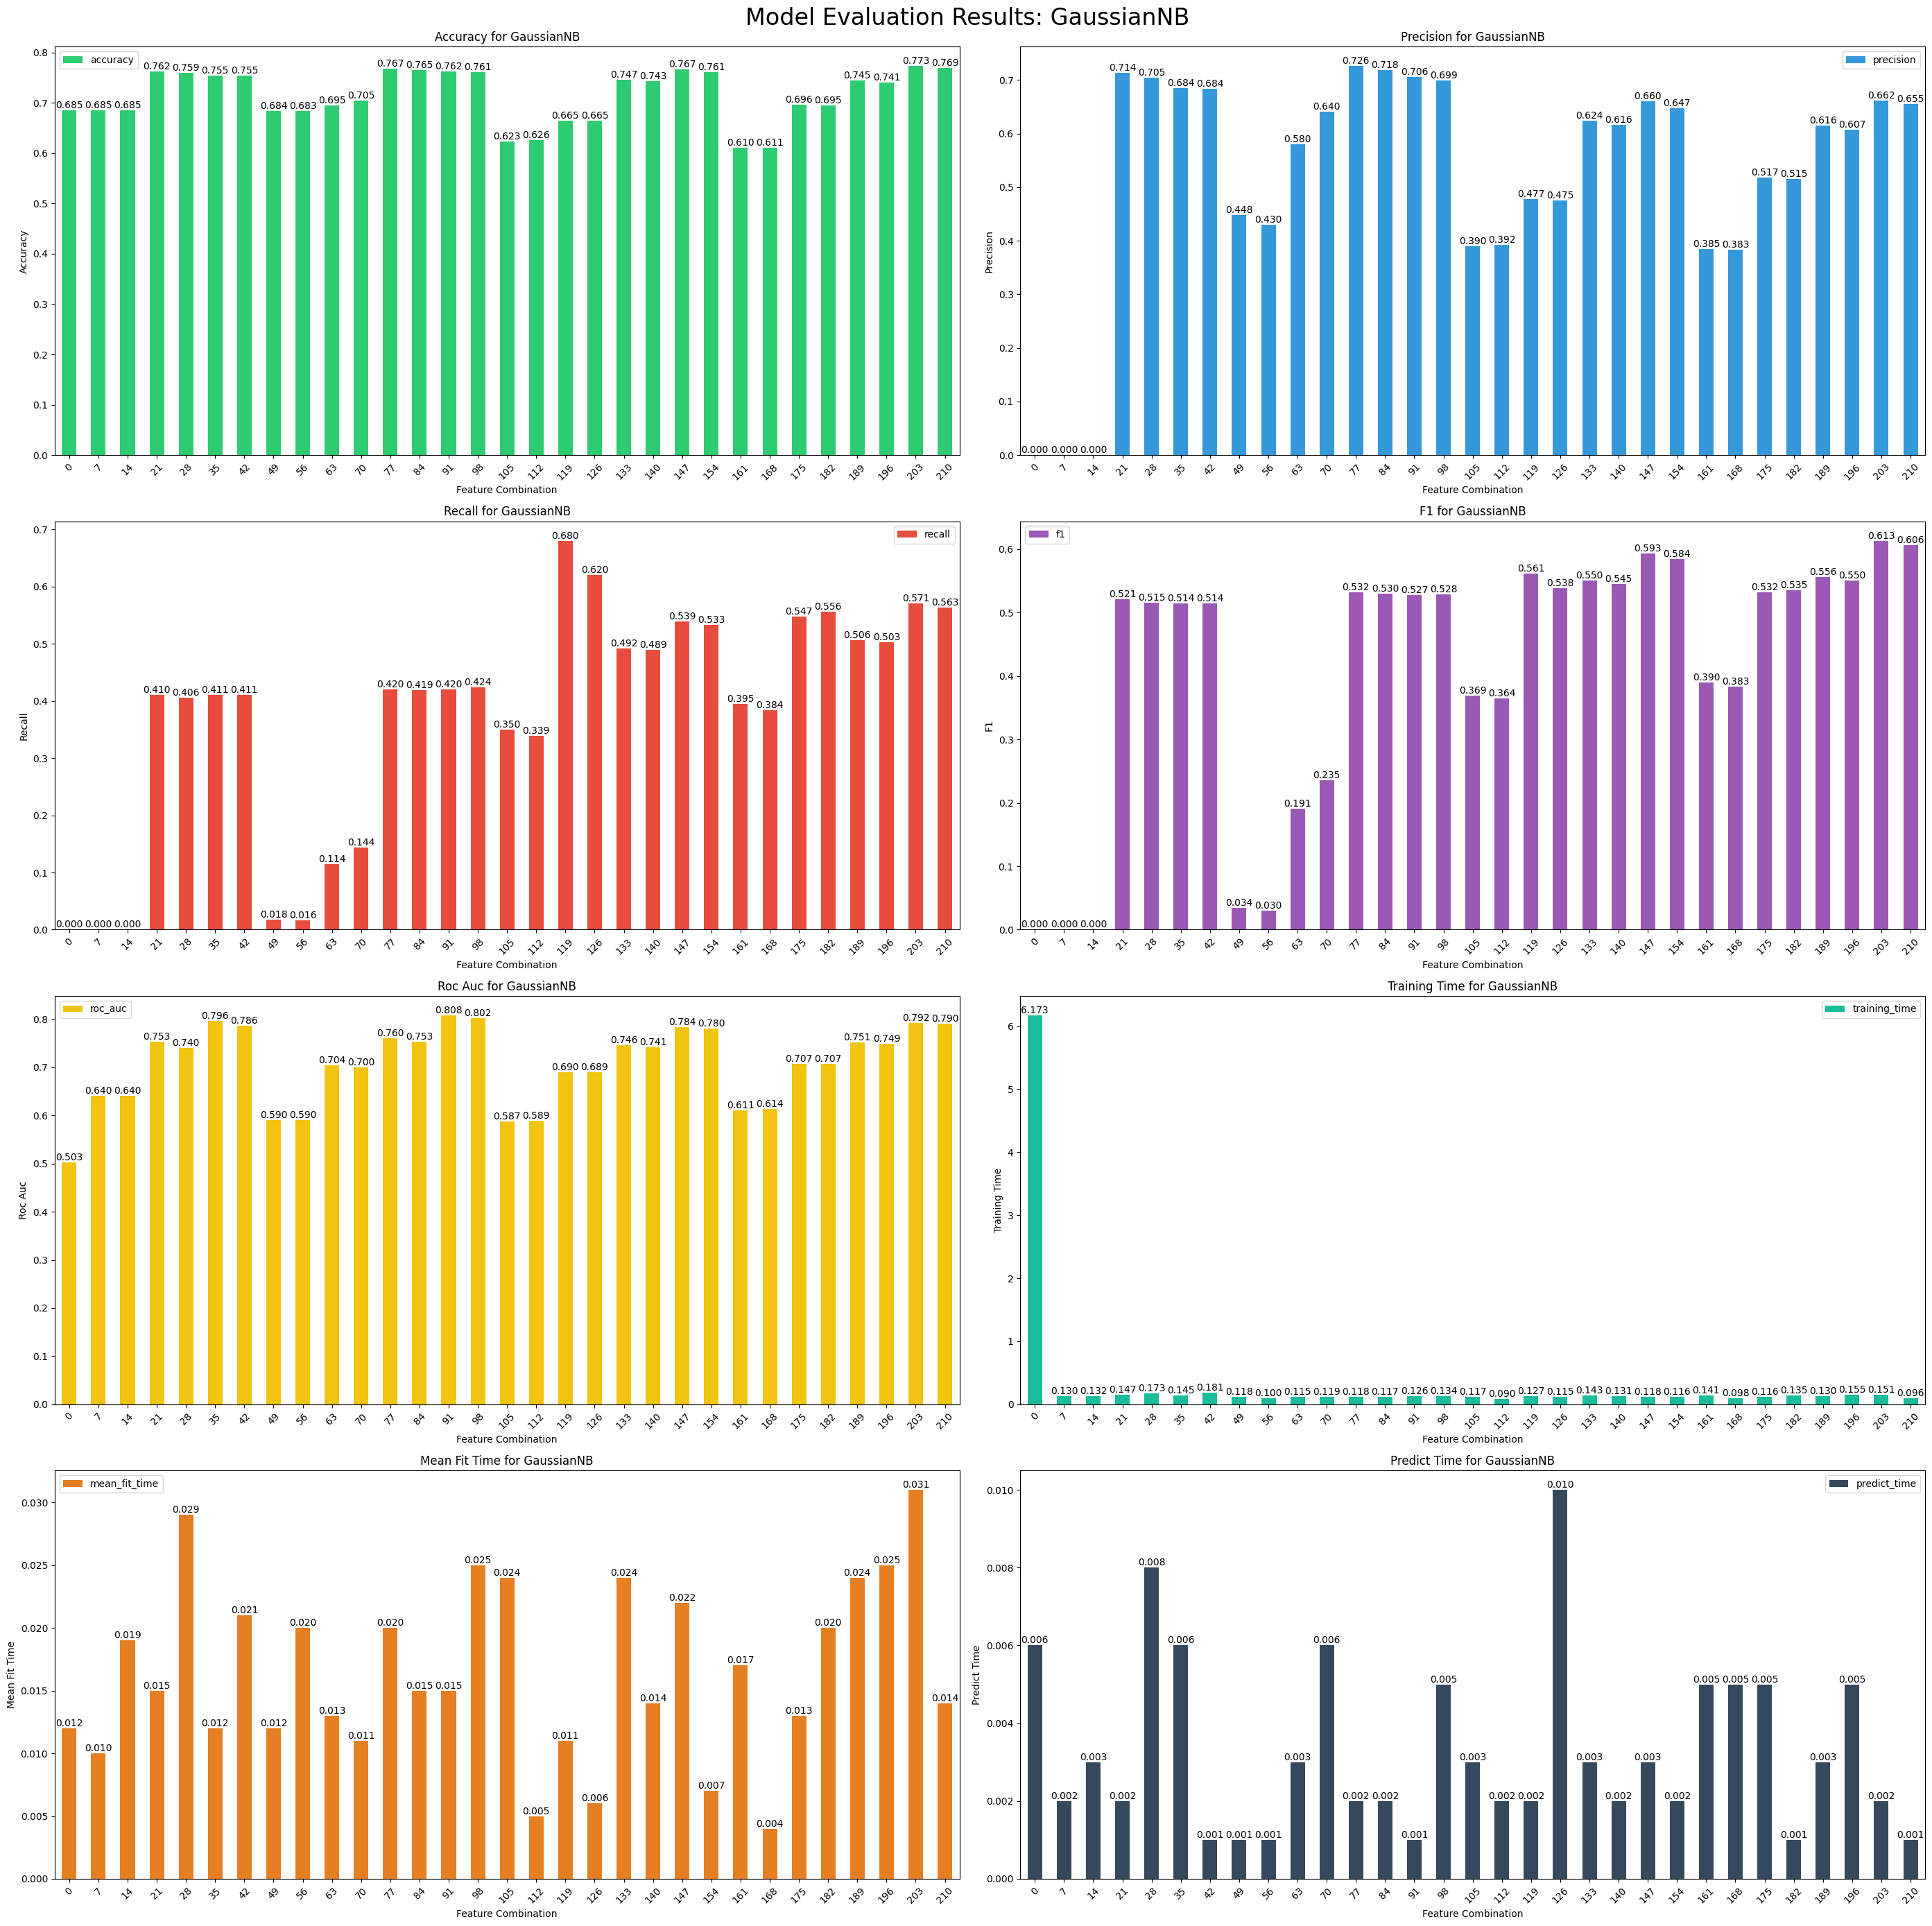

/var/folders/zd/7ryz379j2dz9shhk8m8k4zx40000gn/T/ipykernel_6289/2597561162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index'] = filtered_df.index.astype(str)


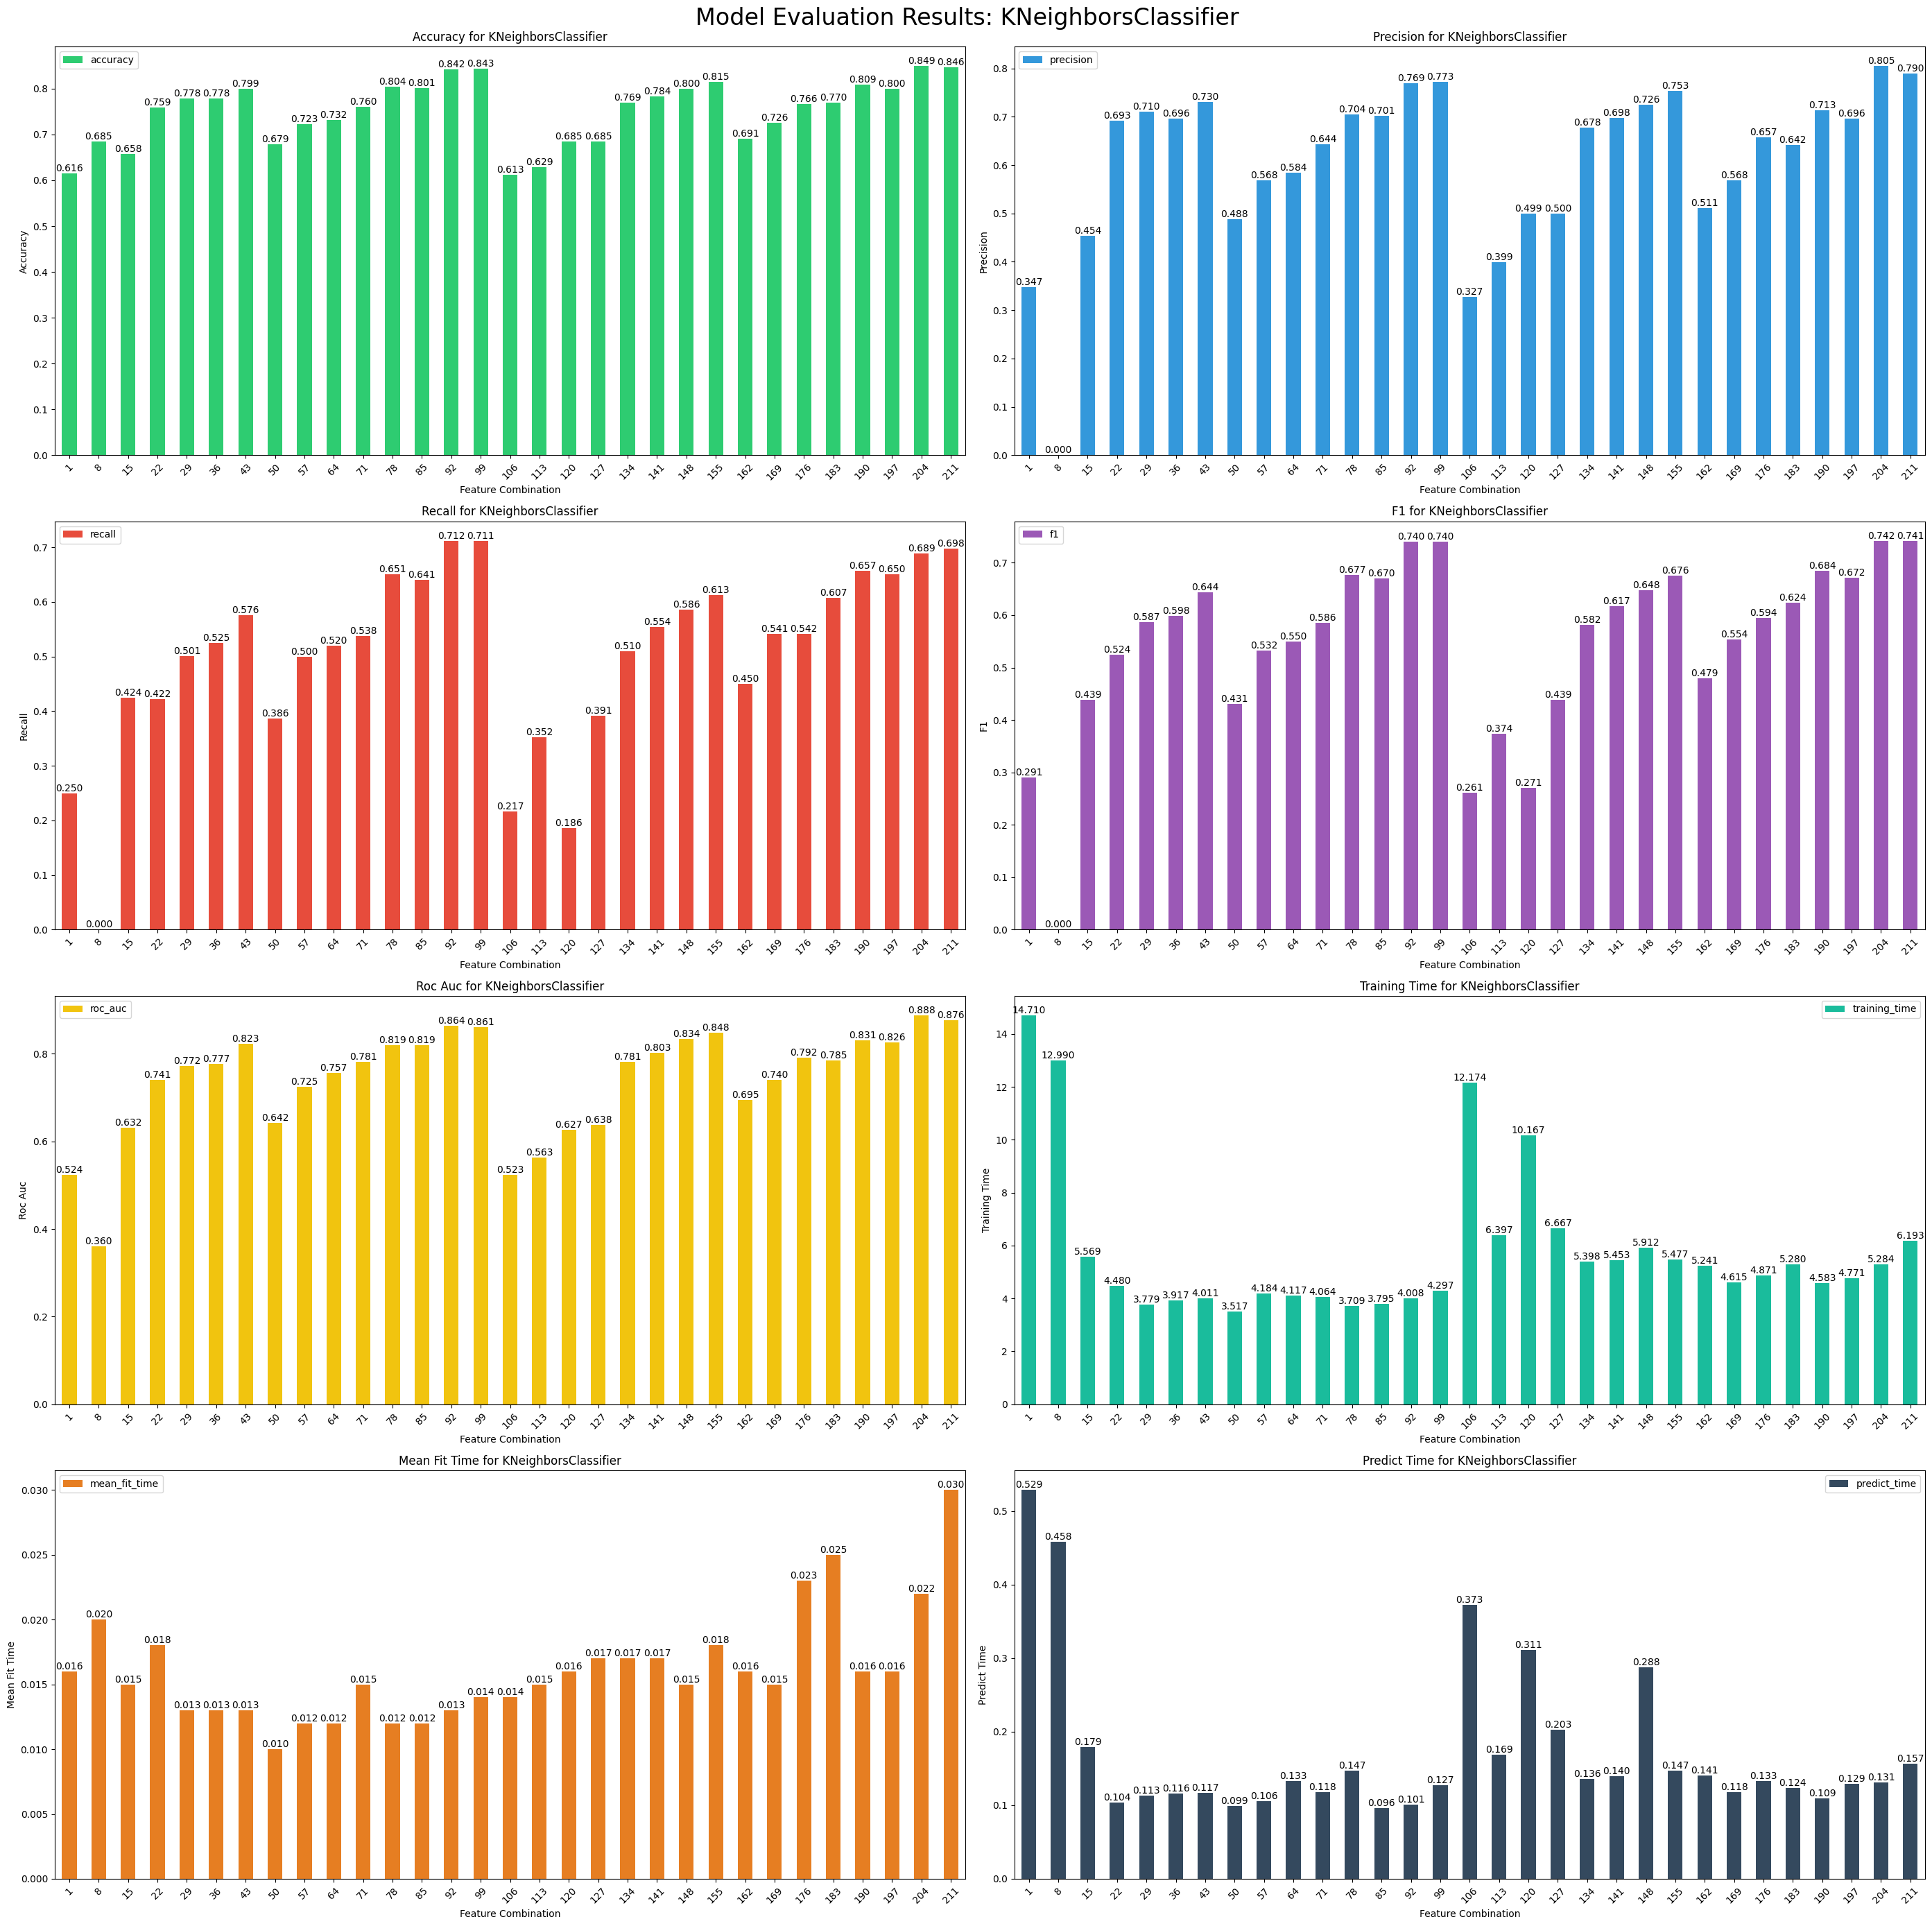

/var/folders/zd/7ryz379j2dz9shhk8m8k4zx40000gn/T/ipykernel_6289/2597561162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index'] = filtered_df.index.astype(str)


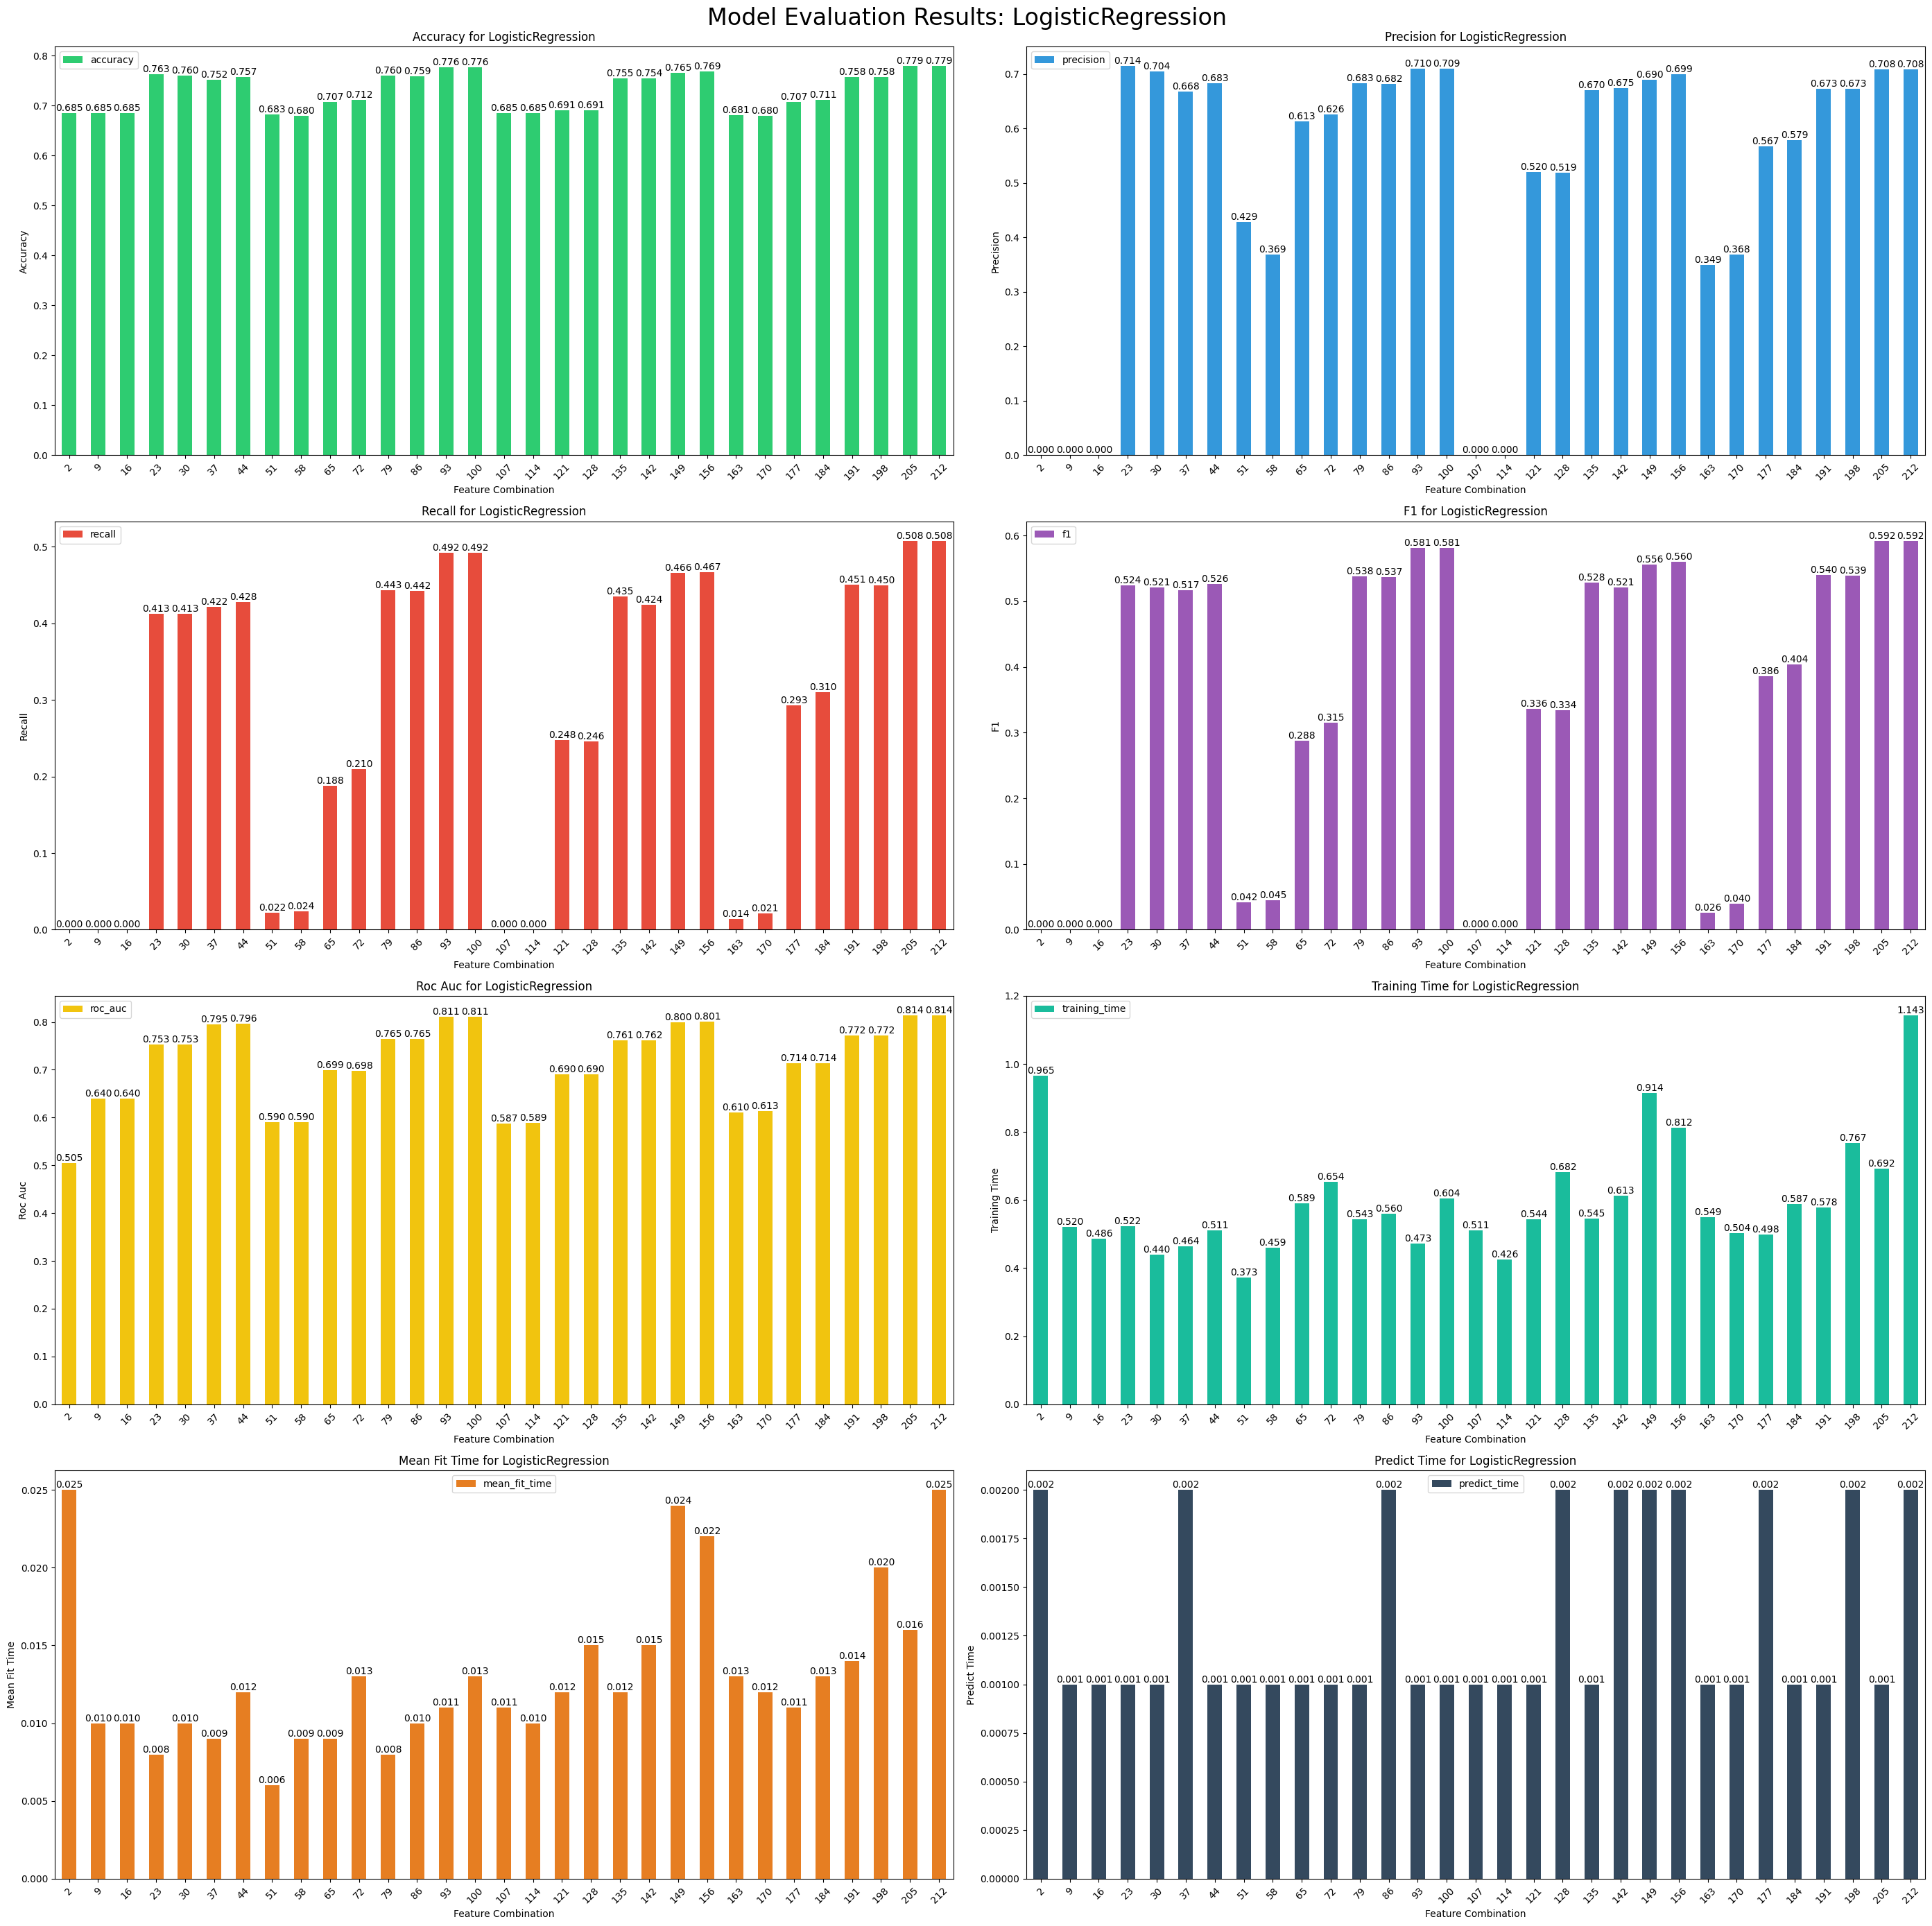

/var/folders/zd/7ryz379j2dz9shhk8m8k4zx40000gn/T/ipykernel_6289/2597561162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index'] = filtered_df.index.astype(str)


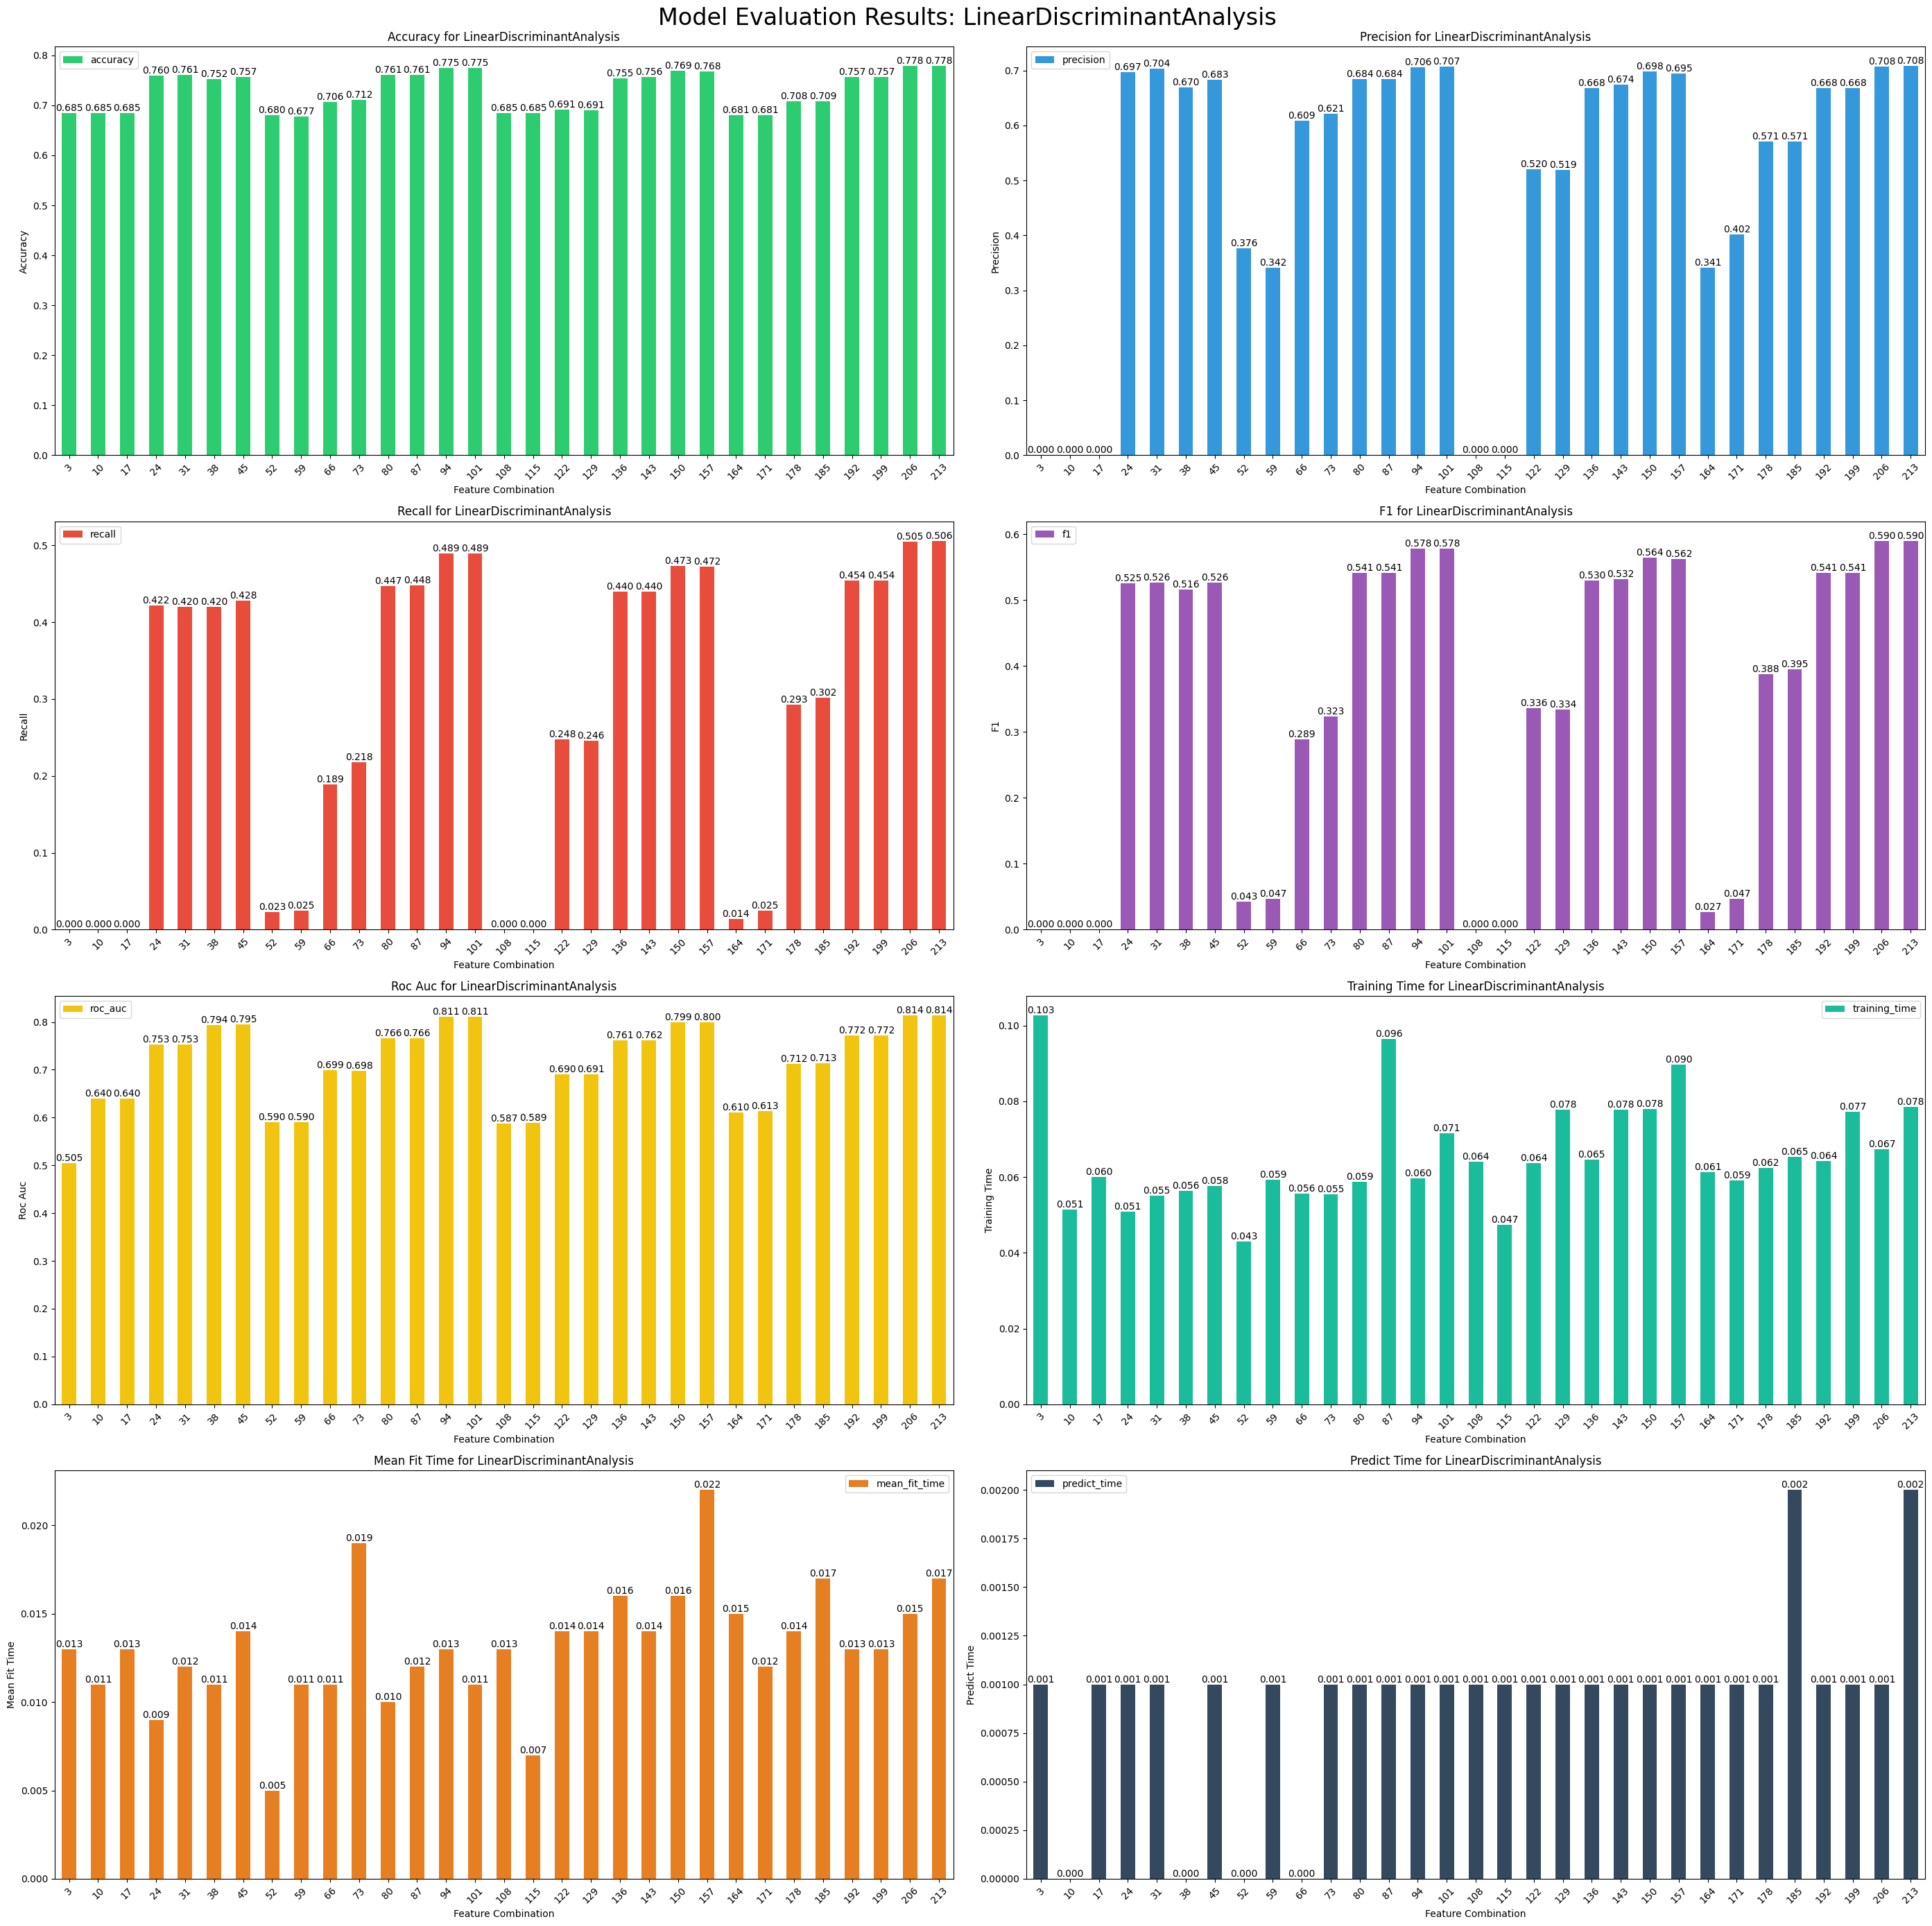

/var/folders/zd/7ryz379j2dz9shhk8m8k4zx40000gn/T/ipykernel_6289/2597561162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index'] = filtered_df.index.astype(str)


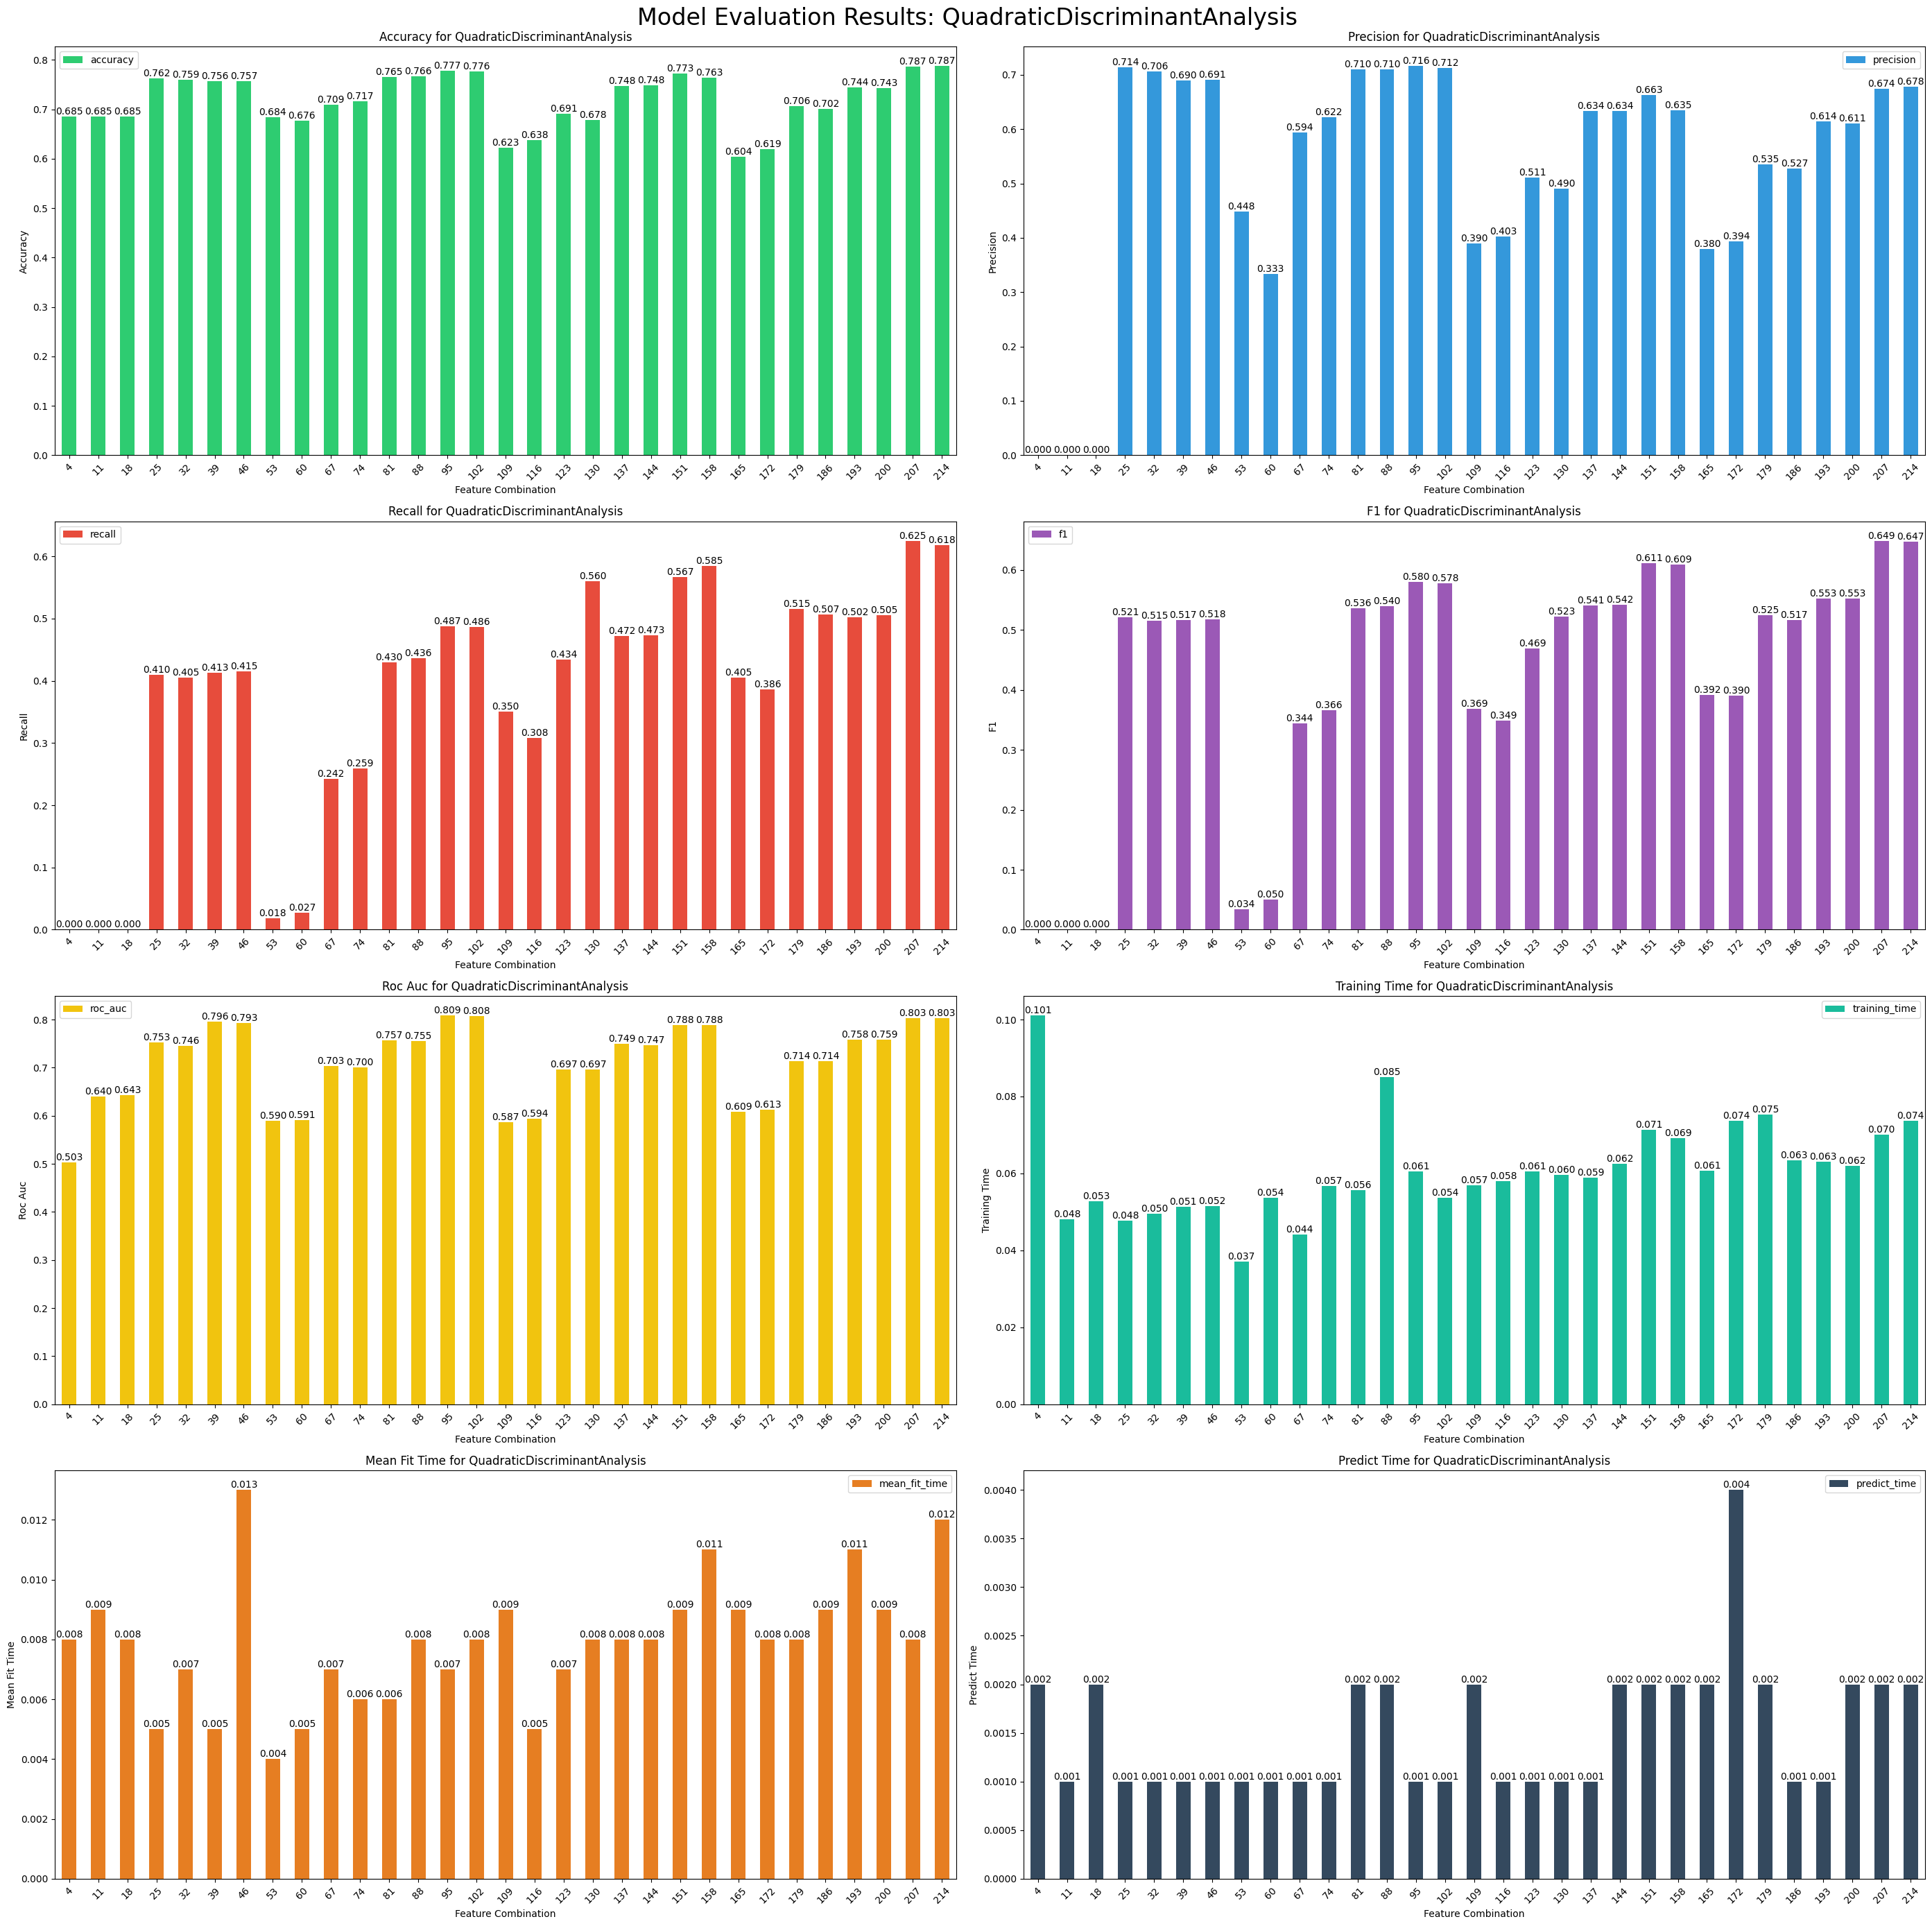

/var/folders/zd/7ryz379j2dz9shhk8m8k4zx40000gn/T/ipykernel_6289/2597561162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index'] = filtered_df.index.astype(str)


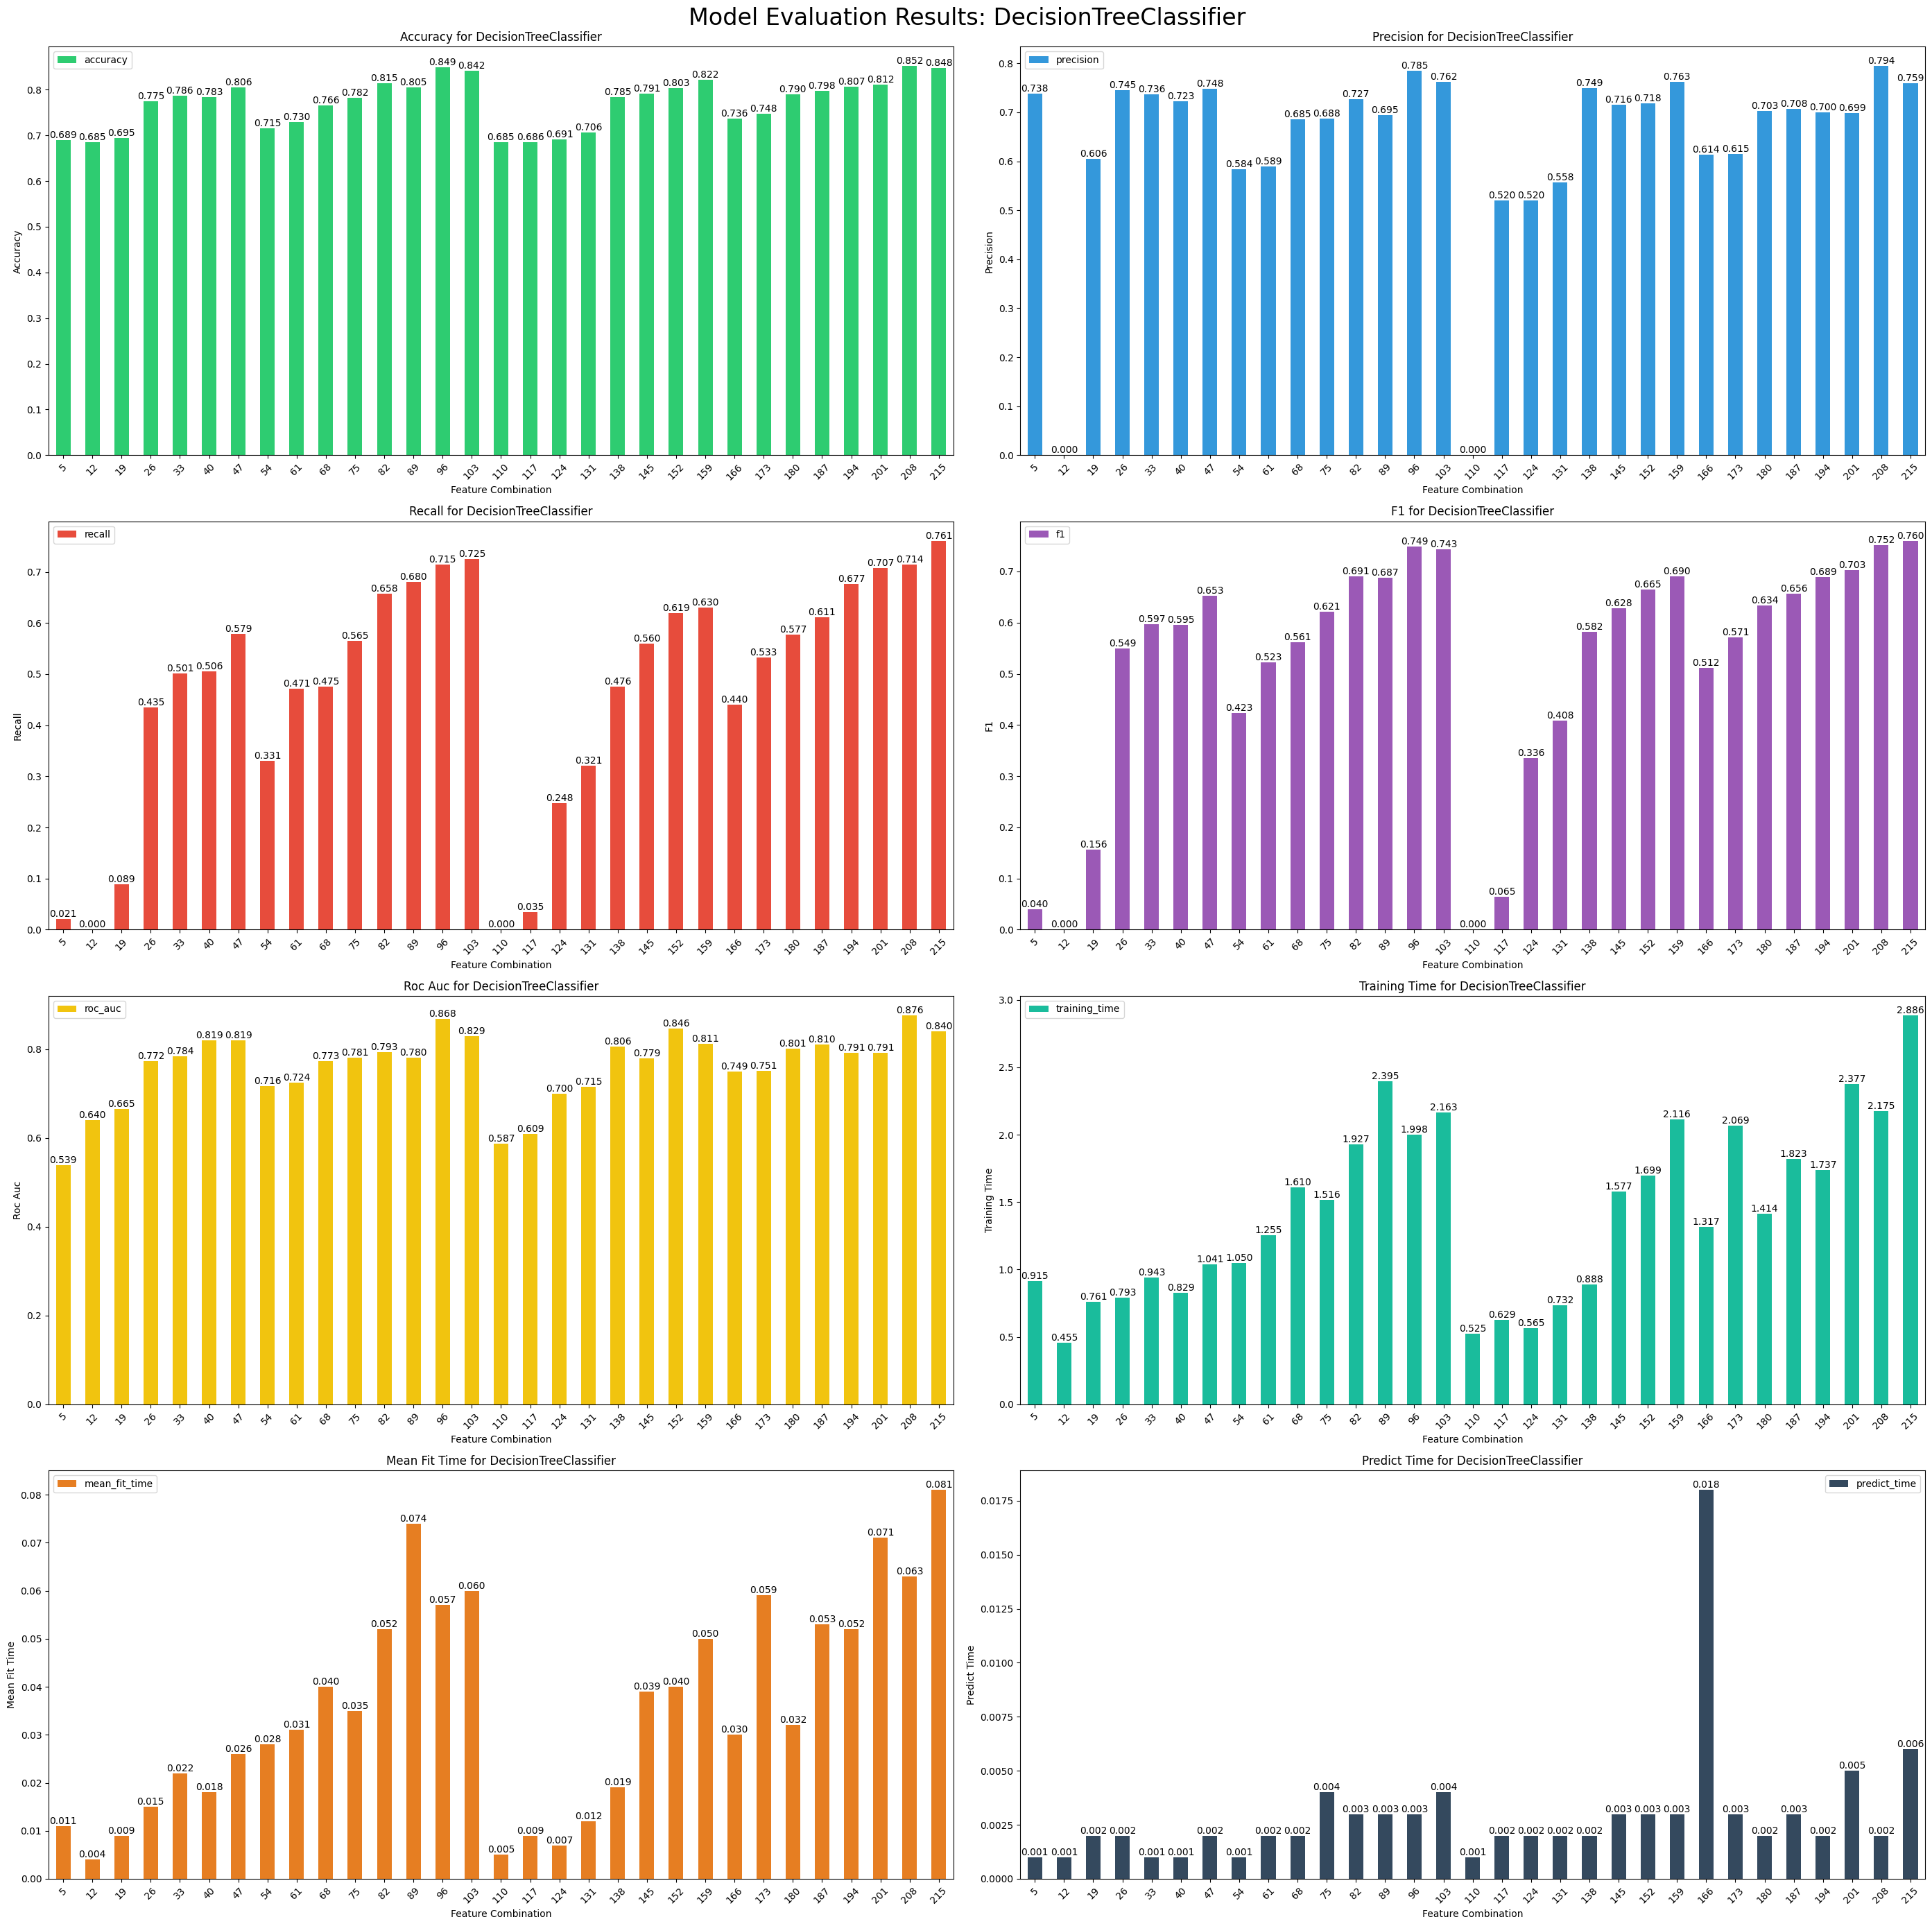

/var/folders/zd/7ryz379j2dz9shhk8m8k4zx40000gn/T/ipykernel_6289/2597561162.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['index'] = filtered_df.index.astype(str)


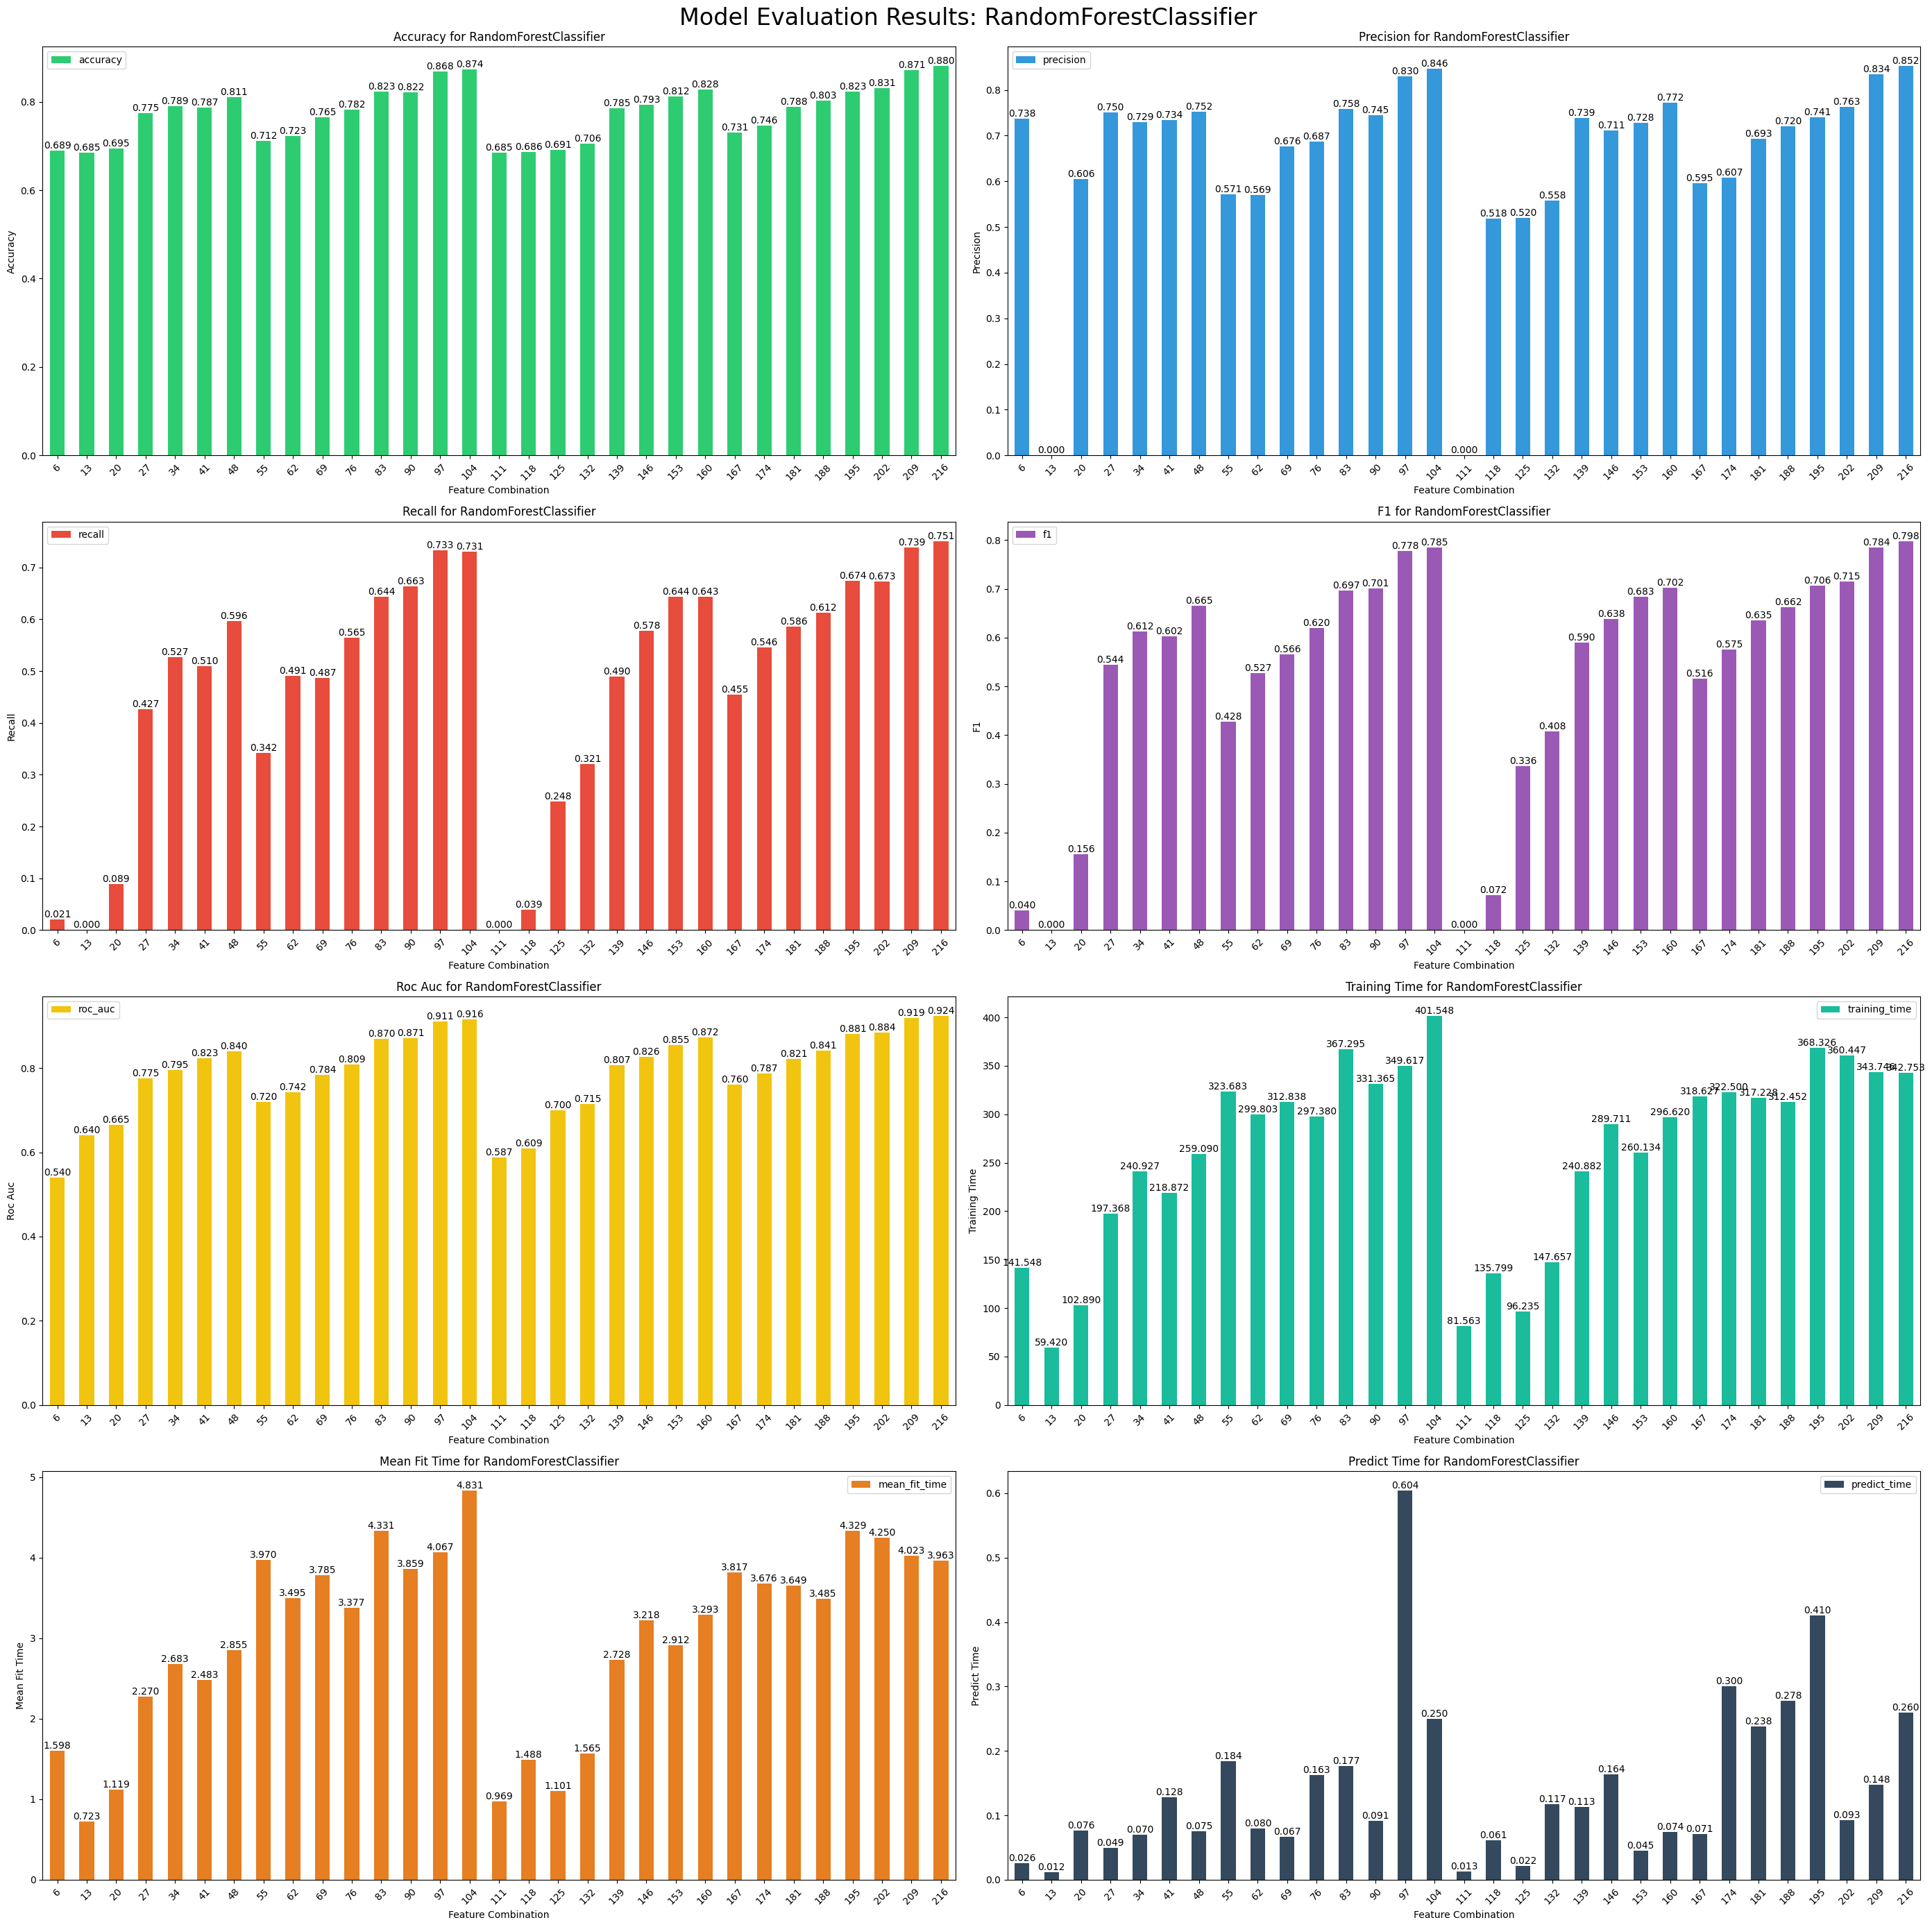

In [93]:
for model in ['GaussianNB', 'KNeighborsClassifier', 'LogisticRegression', 'LinearDiscriminantAnalysis', 'QuadraticDiscriminantAnalysis', 'DecisionTreeClassifier', 'RandomForestClassifier']:
    evaluate_model(df_results, model)

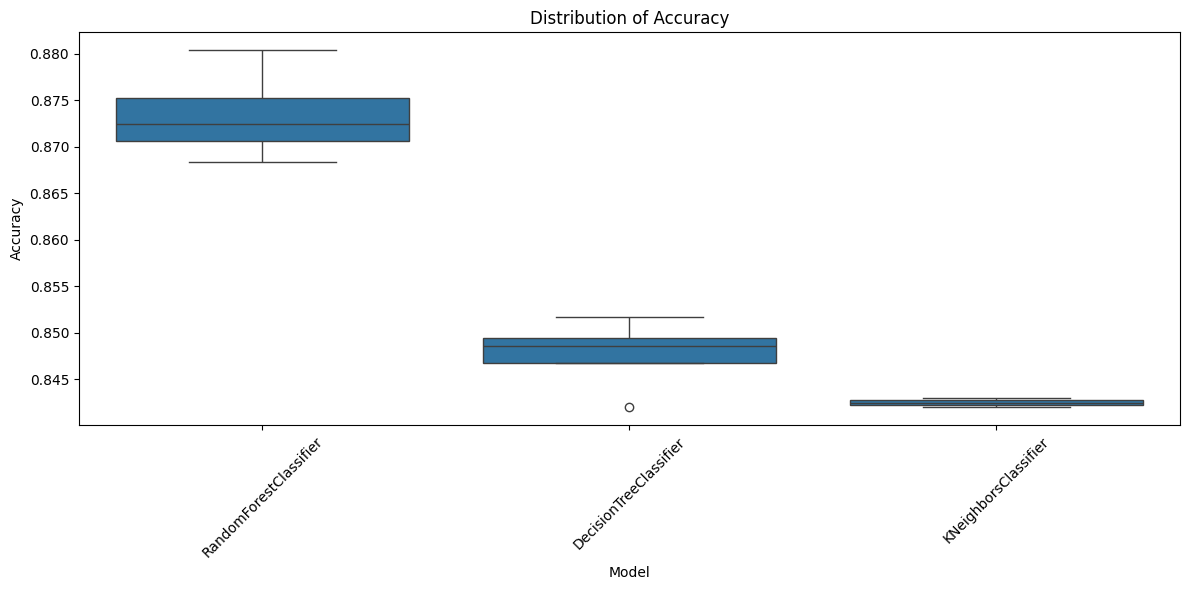

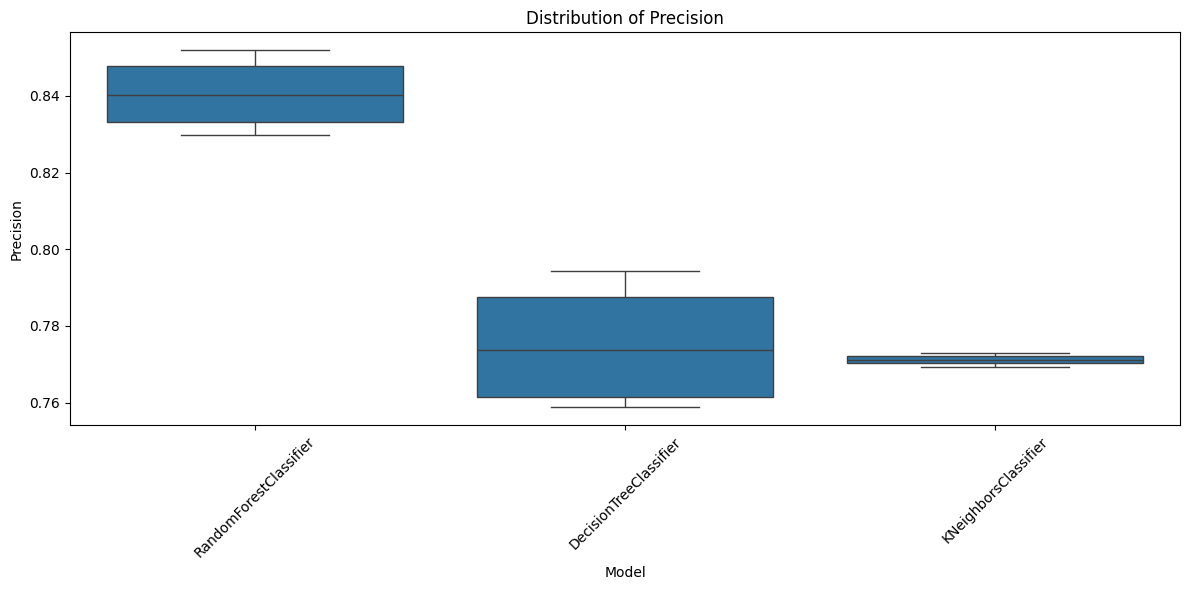

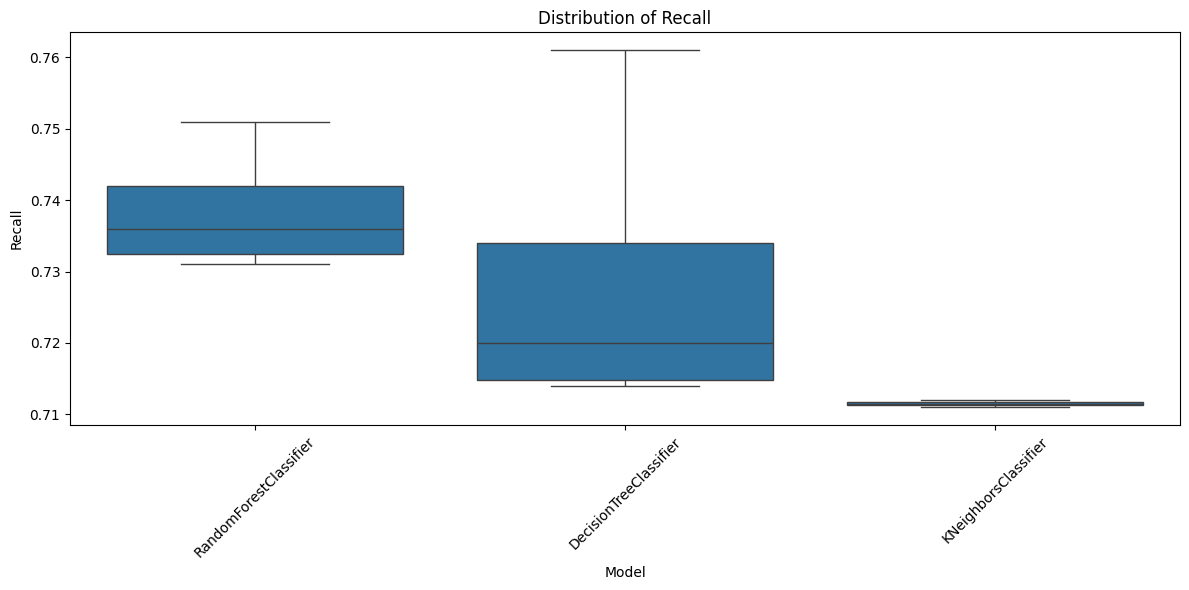

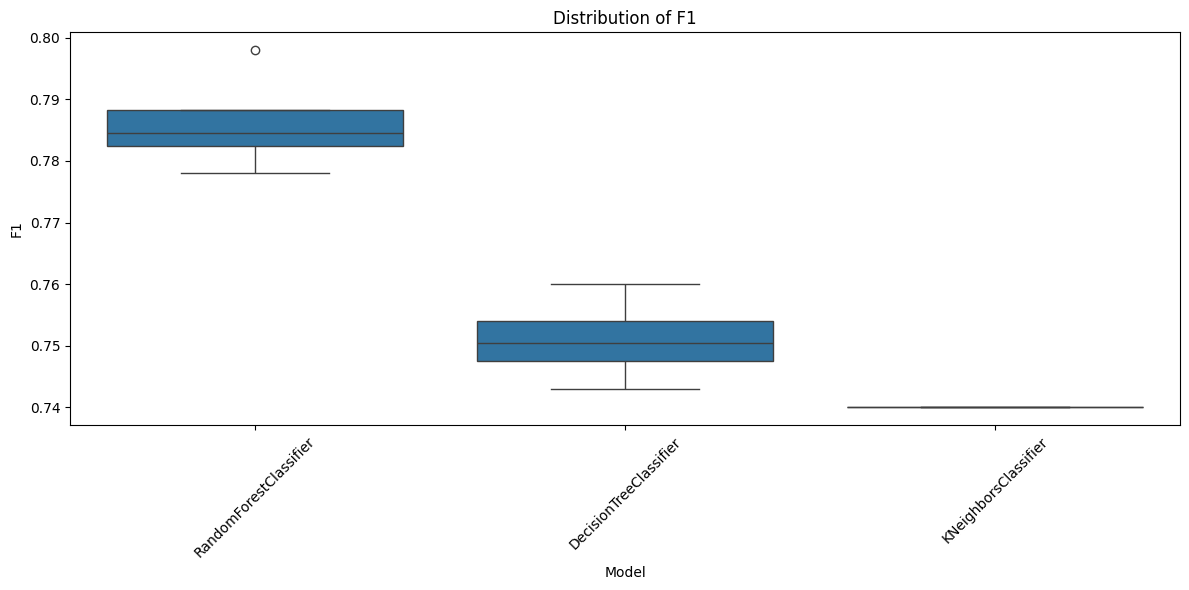

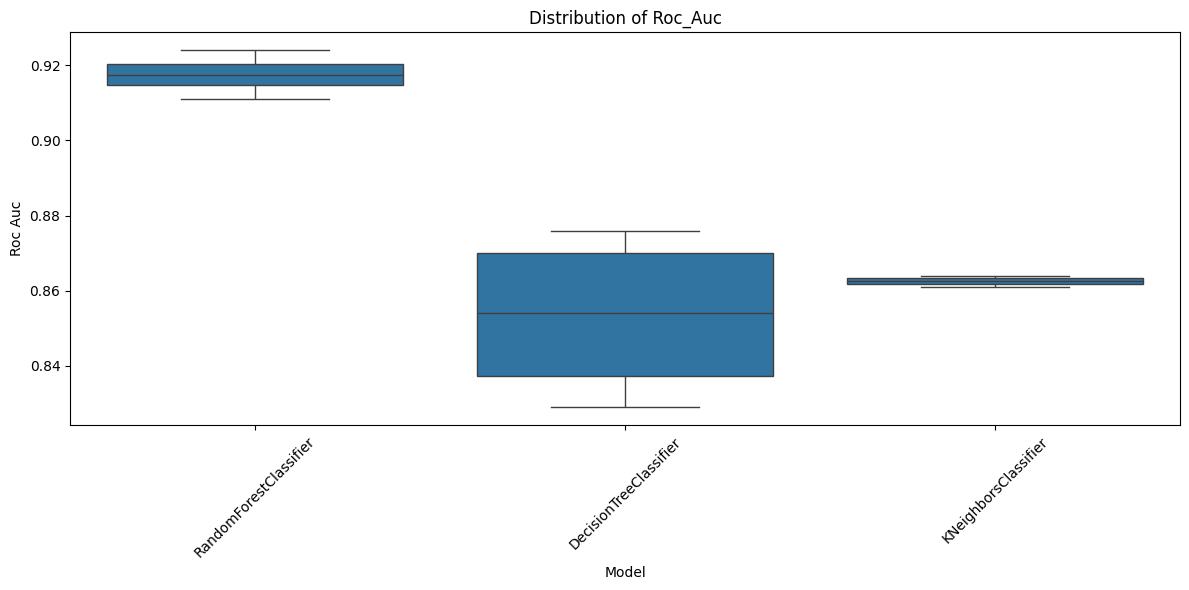

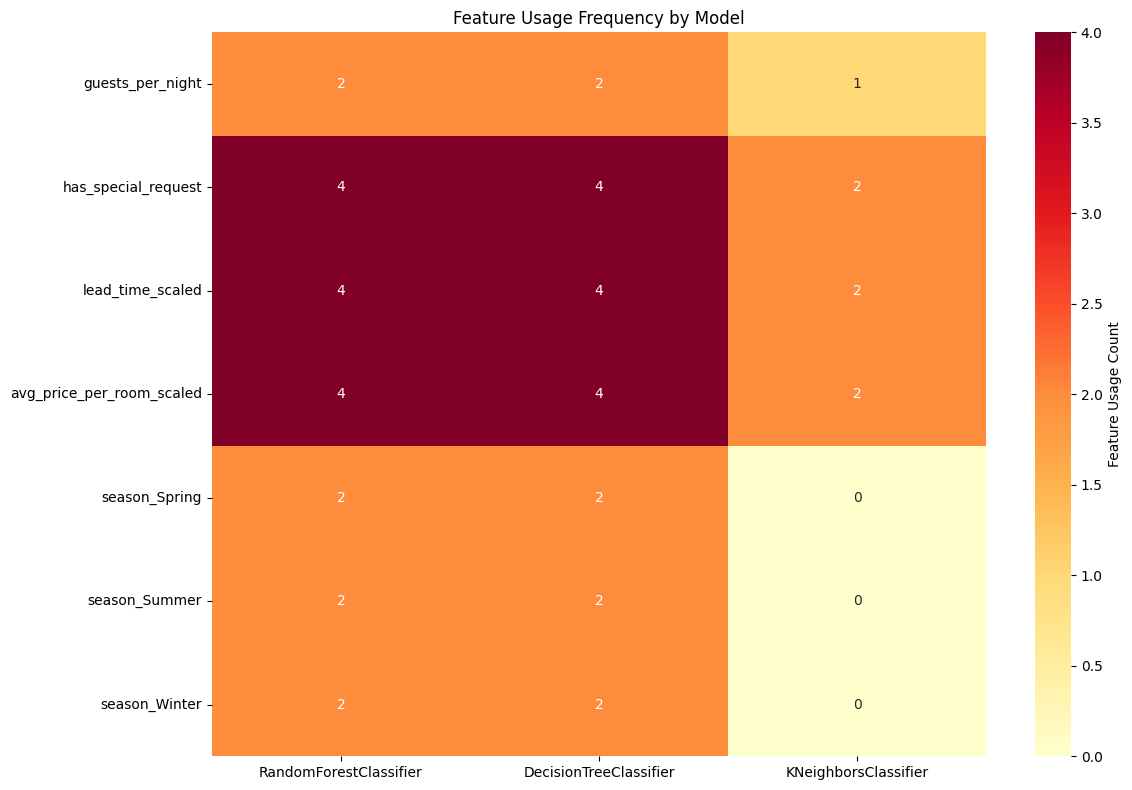

Model                                           Features  \
0  RandomForestClassifier  ['guests_per_night', 'has_special_request', 'l...   
1  DecisionTreeClassifier  ['guests_per_night', 'has_special_request', 'l...   
2    KNeighborsClassifier  ['has_special_request', 'lead_time_scaled', 'a...   

  Accuracy Precision Recall     F1 ROC AUC  
0   0.8804    0.8519  0.751  0.798   0.924  
1   0.8484    0.7588  0.761   0.76    0.84  
2    0.842    0.7694  0.712   0.74   0.864

In [94]:
evaluate_models(df_results)

In [96]:
df_results[(df_results['recall'] >= 0.7) & (df_results['precision'] >= 0.7)].sort_values(by=['precision', 'recall'], ascending=False).head(10)

model  \
216  RandomForestClassifier   
104  RandomForestClassifier   
209  RandomForestClassifier   
97   RandomForestClassifier   
208  DecisionTreeClassifier   
96   DecisionTreeClassifier   
99     KNeighborsClassifier   
92     KNeighborsClassifier   
103  DecisionTreeClassifier   
215  DecisionTreeClassifier   

                                               columns  \
216  ['guests_per_night', 'has_special_request', 'l...   
104  ['guests_per_night', 'has_special_request', 'l...   
209  ['has_special_request', 'lead_time_scaled', 'a...   
97   ['has_special_request', 'lead_time_scaled', 'a...   
208  ['has_special_request', 'lead_time_scaled', 'a...   
96   ['has_special_request', 'lead_time_scaled', 'a...   
99   ['guests_per_night', 'has_special_request', 'l...   
92   ['has_special_request', 'lead_time_scaled', 'a...   
103  ['guests_per_night', 'has_special_request', 'l...   
215  ['guests_per_night', 'has_special_request', 'l...   

                                           best_params  training_time  \
216  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     342.752785   
104  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     401.547803   
209  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     343.745859   
97   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     349.617282   
208  {'max_depth': 20, 'min_samples_leaf': 2, 'min_...       2.175205   
96   {'max_depth': 20, 'min_samples_leaf': 1, 'min_...       1.998306   
99                                  {'n_neighbors': 3}       4.297462   
92                                  {'n_neighbors': 3}       4.008391   
103  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...       2.162842   
215  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...       2.886487   

     accuracy  precision  recall     f1  roc_auc  mean_fit_time  predict_time  
216    0.8804     0.8519   0.751  0.798    0.924          3.963         0.260  
104    0.8735     0.8463   0.731  0.785    0.916          4.831         0.250  
209    0.8714     0.8341   0.739  0.784    0.919          4.023         0.148  
97     0.8684     0.8299   0.733  0.778    0.911          4.067         0.604  
208    0.8517     0.7943   0.714  0.752    0.876          0.063         0.002  
96     0.8487     0.7853   0.715  0.749    0.868          0.057         0.003  
99     0.8430     0.7729   0.711  0.740    0.861          0.014         0.127  
92     0.8420     0.7694   0.712  0.740    0.864          0.013         0.101  
103    0.8420     0.7622   0.725  0.743    0.829          0.060         0.004  
215    0.8484     0.7588   0.761  0.760    0.840          0.081         0.006

In [97]:
df_results[
    (df_results['recall'] >= 0.7) & 
    (df_results['precision'] >= 0.7) &
    (df_results['columns'] == "['has_special_request', 'lead_time_scaled', 'avg_price_per_room_scaled']")
].sort_values(by=['precision', 'recall'], ascending=False).head(10)

model                                            columns  \
97  RandomForestClassifier  ['has_special_request', 'lead_time_scaled', 'a...   
96  DecisionTreeClassifier  ['has_special_request', 'lead_time_scaled', 'a...   
92    KNeighborsClassifier  ['has_special_request', 'lead_time_scaled', 'a...   

                                          best_params  training_time  \
97  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...     349.617282   
96  {'max_depth': 20, 'min_samples_leaf': 1, 'min_...       1.998306   
92                                 {'n_neighbors': 3}       4.008391   

    accuracy  precision  recall     f1  roc_auc  mean_fit_time  predict_time  
97    0.8684     0.8299   0.733  0.778    0.911          4.067         0.604  
96    0.8487     0.7853   0.715  0.749    0.868          0.057         0.003  
92    0.8420     0.7694   0.712  0.740    0.864          0.013         0.101

In [100]:
from sklearn.model_selection import train_test_split

hotels = pd.read_csv('data/Hotel Reservations clean.csv', index_col=[0])

X = hotels[['has_special_request', 'lead_time_scaled', 'avg_price_per_room_scaled']]
y = hotels['is_canceled']

_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [
    RandomForestClassifier(n_estimators=300, max_depth=20, min_samples_split=5, min_samples_leaf=1),
    DecisionTreeClassifier(max_depth=20, min_samples_split=10, min_samples_leaf=1),
    KNeighborsClassifier(n_neighbors=3),
]

In [107]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for model in models:
    model.fit(X, y)
    predictions = model.predict(X_test)
    
    accuracy = np.round(accuracy_score(y_test, predictions), 3)
    precision = np.round(precision_score(y_test, predictions), 3)
    recall = np.round(recall_score(y_test, predictions), 3)
    f1 = np.round(f1_score(y_test, predictions), 3)
    
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("-" * 50)
    print()

Model: RandomForestClassifier
Accuracy: 0.937
Precision: 0.948
Recall: 0.846
F1 Score: 0.894
--------------------------------------------------

Model: DecisionTreeClassifier
Accuracy: 0.92
Precision: 0.912
Recall: 0.824
F1 Score: 0.866
--------------------------------------------------

Model: KNeighborsClassifier
Accuracy: 0.91
Precision: 0.88
Recall: 0.827
F1 Score: 0.853
--------------------------------------------------

